<p align="center">
  <img width="460" height="300" src="house.PNG">
</p>

### Problem Statement
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Business Objective
- Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
    - A regression model using regularization in order to predict the actual value of the prospective properties and 
      decide  whether to invest in them or not
    - Which variables are significant in predicting the price of a house
    - How well those variables describe the price of a house!

### Importing the libraries

In [1]:
import pandas as pd                                                                                     #Reading the data
import numpy as np                                                                                      #numeric operations
import matplotlib.pyplot as plt                                                                         #plotting
import seaborn as sns                                                           
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV                                     #Regression model
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler                                          #Scaling
from sklearn.model_selection import train_test_split, cross_val_score                                   #Splitting the data
from sklearn.feature_selection import RFE                                                               #Improtant features
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error              #Error Metrics
import warnings                                                                                         #Ignoring warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew                                                                            # Skewness check

pd.set_option('display.max_columns', 81)

### Font Modifications

In [2]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### Importing the data & Checking duplicate ID's

In [3]:
df = pd.read_csv("train.csv")
print("The Surprise Housing dataset having    ",color.GREEN,color.BOLD,df.shape[0],"rows and",df.shape[1],"features", color.END)

df.drop_duplicates("Id",inplace=True)
print("Records having post removing duplicates",color.GREEN,color.BOLD,df.shape[0],"rows and",df.shape[1],"features", color.END)

The Surprise Housing dataset having       1460 rows and 81 features 
Records having post removing duplicates   1460 rows and 81 features 


### Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Observations based on Info()
- The data contains 81 features of which, float64(3), int64(35) and object(43) variables
- The data not contains missing values

In [5]:
print("\033[1mOut of 81 variables, python detected",len(df.isnull().sum()[df.isnull().sum()>0]),"variables are having missing information")

Out of 81 variables, python detected 19 variables are having missing information


In [6]:
df[df.isnull().sum()[df.isnull().sum()>0].index].head(2)

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0         65.0   NaN    BrkFace       196.0       Gd       TA           No   
1         80.0   NaN       None         0.0       Gd       TA           Gd   

  BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0          GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1          ALQ          Unf      SBrkr          TA     Attchd       1976.0   

  GarageFinish GarageQual GarageCond PoolQC Fence MiscFeature  
0          RFn         TA         TA    NaN   NaN         NaN  
1          RFn         TA         TA    NaN   NaN         NaN

In [7]:
var_with_missing = list(df.isnull().sum()[df.isnull().sum()>0].index)
numeric_var_with_missing = ["LotFrontage","MasVnrArea","GarageYrBlt"]
cat_var_with_missing = list(set(var_with_missing) - set(numeric_var_with_missing))

In [8]:
print("Total Missing Variables      ",len(var_with_missing),"\nNumeric Missing Variables    ", len(numeric_var_with_missing),"\nCategorical Missing Variables", len(cat_var_with_missing))

Total Missing Variables       19 
Numeric Missing Variables     3 
Categorical Missing Variables 16


In [9]:
missing_info = pd.DataFrame()
missing_info['% Missing'] = pd.DataFrame(round(df.isnull().sum()/len(df)*100, 2)).rename(columns={0:"% Missing"})
missing_info["Data types"] = pd.DataFrame(df.dtypes)
missing_info.sort_values(by = "% Missing", ascending=False).T

PoolQC MiscFeature   Alley   Fence FireplaceQu LotFrontage  \
% Missing    99.52        96.3   93.77   80.75       47.26       17.74   
Data types  object      object  object  object      object     float64   

           GarageYrBlt GarageCond GarageType GarageFinish GarageQual  \
% Missing         5.55       5.55       5.55         5.55       5.55   
Data types     float64     object     object       object     object   

           BsmtFinType2 BsmtExposure BsmtQual BsmtCond BsmtFinType1  \
% Missing           2.6          2.6     2.53     2.53         2.53   
Data types       object       object   object   object       object   

           MasVnrArea MasVnrType Electrical     Id Functional Fireplaces  \
% Missing        0.55       0.55       0.07    0.0        0.0        0.0   
Data types    float64     object     object  int64     object      int64   

           KitchenQual KitchenAbvGr BedroomAbvGr HalfBath FullBath  \
% Missing          0.0          0.0          0.0      0.0      0.0   
Data types      object        int64        int64    int64    int64   

           BsmtHalfBath TotRmsAbvGrd GarageCars GrLivArea GarageArea  \
% Missing           0.0          0.0        0.0       0.0        0.0   
Data types        int64        int64      int64     int64      int64   

           PavedDrive WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch  \
% Missing         0.0        0.0         0.0           0.0       0.0   
Data types     object      int64       int64         int64     int64   

           ScreenPorch PoolArea MiscVal MoSold YrSold SaleType SaleCondition  \
% Missing          0.0      0.0     0.0    0.0    0.0      0.0           0.0   
Data types       int64    int64   int64  int64  int64   object        object   

           BsmtFullBath HeatingQC LowQualFinSF LandSlope OverallQual  \
% Missing           0.0       0.0          0.0       0.0         0.0   
Data types        int64    object        int64    object       int64   

           HouseStyle BldgType Condition2 Condition1 Neighborhood LotConfig  \
% Missing         0.0      0.0        0.0        0.0          0.0       0.0   
Data types     object   object     object     object       object    object   

           YearBuilt Utilities LandContour LotShape  Street LotArea MSZoning  \
% Missing        0.0       0.0         0.0      0.0     0.0     0.0      0.0   
Data types     int64    object      object   object  object   int64   object   

           OverallCond YearRemodAdd 2ndFlrSF BsmtFinSF2 1stFlrSF CentralAir  \
% Missing          0.0          0.0      0.0        0.0      0.0        0.0   
Data types       int64        int64    int64      int64    int64     object   

           MSSubClass Heating TotalBsmtSF BsmtUnfSF BsmtFinSF1 RoofStyle  \
% Missing         0.0     0.0         0.0       0.0        0.0       0.0   
Data types      int64  object       int64     int64      int64    object   

           Foundation ExterCond ExterQual Exterior2nd Exterior1st RoofMatl  \
% Missing         0.0       0.0       0.0         0.0         0.0      0.0   
Data types     object    object    object      object      object   object   

           SalePrice  
% Missing        0.0  
Data types     int64

### Important Note:
- After carefull consideration python threating NA as missing in the data, whereas from data dictionary NA have it's own 
  replresentation. For Ex:
  - Variable: PoolQC: NA means No pool
  - Variable: Fence : NA means No Fence
  - e.t.c
- Let's try to map these categories to missing variables 

### Replacing missing information with appropriate values
 - Replaced all the NA's with respective categories in categorical variables
 - Median replacement for LotFrontage and MasVnrArea
 - Replaced the missing values in GarageYrBlt with YearRemodAdd

In [10]:
df[['Alley']] = df[['Alley']].fillna("No_alley")
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna("No_Basement")
df[['FireplaceQu']] = df[['FireplaceQu']].fillna("No_Fireplace")
df[['GarageType','GarageFinish','GarageQual','GarageCond']] = df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna("No_Garage")
df[['PoolQC']] = df[['PoolQC']].fillna("No_Pool")
df[['Fence']] = df[['Fence']].fillna("No_Fence")
df[['MiscFeature']] = df[['MiscFeature']].fillna("None")

# Less than 1 % misssing info
df[['MasVnrType']] = df[['MasVnrType']].fillna(df['MasVnrType'].mode()[0])
df[['Electrical']] = df[['Electrical']].fillna(df['Electrical'].mode()[0])

# As we are not treated the variables with outliers, lets replace LotFrontage and MasVnrAre with median
df[['LotFrontage']] = df[['LotFrontage']].fillna(df['LotFrontage'].median())
df[['MasVnrArea']] = df[['MasVnrArea']].fillna(df['MasVnrArea'].median())

# Replace the missing values in GarageYrBlt with YearRemodAdd. Instead of replacing with median, I feel its appropriate approach
df['GarageYrBlt'] = np.where(df['GarageYrBlt'].isna(), df['YearRemodAdd'], df['GarageYrBlt'])

#### Cross checking the  missing imputation

In [11]:
print("Number of missing values in the data\033[1m",df.isna().sum().sum())

Number of missing values in the data 0


### Checking unique records and data types for variable clustering

In [12]:
df_basic_ststs = pd.DataFrame()
df_basic_ststs["Data types"] = pd.DataFrame(df.dtypes)
df_basic_ststs["Unique Count"] = pd.DataFrame(df.nunique()).rename(columns={0:"Unique Count"})
df_basic_ststs = df_basic_ststs.sort_values(by="Unique Count").T
df_basic_ststs

CentralAir  Street Utilities HalfBath PavedDrive   Alley  \
Data types       object  object    object    int64     object  object   
Unique Count          2       2         2        3          3       3   

             BsmtHalfBath LandSlope MasVnrType  PoolQC BsmtFullBath FullBath  \
Data types          int64    object     object  object        int64    int64   
Unique Count            3         3          4       4            4        4   

             ExterQual KitchenQual LandContour LotShape Fireplaces  \
Data types      object      object      object   object      int64   
Unique Count         4           4           4        4          4   

             GarageFinish KitchenAbvGr ExterCond MiscFeature Electrical  \
Data types         object        int64    object      object     object   
Unique Count            4            4         5           5          5   

             YrSold BsmtExposure BsmtCond BsmtQual GarageCars HeatingQC  \
Data types    int64       object   object   object      int64    object   
Unique Count      5            5        5        5          5         5   

               Fence LotConfig MSZoning BldgType Foundation GarageCond  \
Data types    object    object   object   object     object     object   
Unique Count       5         5        5        5          6          6   

             GarageQual SaleCondition RoofStyle FireplaceQu Heating  \
Data types       object        object    object      object  object   
Unique Count          6             6         6           6       6   

             Functional GarageType BsmtFinType1 BsmtFinType2 PoolArea  \
Data types       object     object       object       object    int64   
Unique Count          7          7            7            7        8   

             Condition2 HouseStyle BedroomAbvGr RoofMatl Condition1  \
Data types       object     object        int64   object     object   
Unique Count          8          8            8        8          9   

             OverallCond SaleType OverallQual MoSold TotRmsAbvGrd MSSubClass  \
Data types         int64   object       int64  int64        int64      int64   
Unique Count           9        9          10     12           12         15   

             Exterior1st Exterior2nd 3SsnPorch MiscVal LowQualFinSF  \
Data types        object      object     int64   int64        int64   
Unique Count          15          16        20      21           24   

             Neighborhood YearRemodAdd ScreenPorch GarageYrBlt LotFrontage  \
Data types         object        int64       int64     float64     float64   
Unique Count           25           61          76          97         110   

             YearBuilt EnclosedPorch BsmtFinSF2 OpenPorchSF WoodDeckSF  \
Data types       int64         int64      int64       int64      int64   
Unique Count       112           120        144         202        274   

             MasVnrArea 2ndFlrSF GarageArea BsmtFinSF1 SalePrice TotalBsmtSF  \
Data types      float64    int64      int64      int64     int64       int64   
Unique Count        327      417        441        637       663         721   

             1stFlrSF BsmtUnfSF GrLivArea LotArea     Id  
Data types      int64     int64     int64   int64  int64  
Unique Count      753       780       861    1073   1460

In [13]:
df[df_basic_ststs.columns].head()

CentralAir Street Utilities  HalfBath PavedDrive     Alley  BsmtHalfBath  \
0          Y   Pave    AllPub         1          Y  No_alley             0   
1          Y   Pave    AllPub         0          Y  No_alley             1   
2          Y   Pave    AllPub         1          Y  No_alley             0   
3          Y   Pave    AllPub         0          Y  No_alley             0   
4          Y   Pave    AllPub         1          Y  No_alley             0   

  LandSlope MasVnrType   PoolQC  BsmtFullBath  FullBath ExterQual KitchenQual  \
0       Gtl    BrkFace  No_Pool             1         2        Gd          Gd   
1       Gtl       None  No_Pool             0         2        TA          TA   
2       Gtl    BrkFace  No_Pool             1         2        Gd          Gd   
3       Gtl       None  No_Pool             1         1        TA          Gd   
4       Gtl    BrkFace  No_Pool             1         2        Gd          Gd   

  LandContour LotShape  Fireplaces GarageFinish  KitchenAbvGr ExterCond  \
0         Lvl      Reg           0          RFn             1        TA   
1         Lvl      Reg           1          RFn             1        TA   
2         Lvl      IR1           1          RFn             1        TA   
3         Lvl      IR1           1          Unf             1        TA   
4         Lvl      IR1           1          RFn             1        TA   

  MiscFeature Electrical  YrSold BsmtExposure BsmtCond BsmtQual  GarageCars  \
0        None      SBrkr    2008           No       TA       Gd           2   
1        None      SBrkr    2007           Gd       TA       Gd           2   
2        None      SBrkr    2008           Mn       TA       Gd           2   
3        None      SBrkr    2006           No       Gd       TA           3   
4        None      SBrkr    2008           Av       TA       Gd           3   

  HeatingQC     Fence LotConfig MSZoning BldgType Foundation GarageCond  \
0        Ex  No_Fence    Inside       RL     1Fam      PConc         TA   
1        Ex  No_Fence       FR2       RL     1Fam     CBlock         TA   
2        Ex  No_Fence    Inside       RL     1Fam      PConc         TA   
3        Gd  No_Fence    Corner       RL     1Fam     BrkTil         TA   
4        Ex  No_Fence       FR2       RL     1Fam      PConc         TA   

  GarageQual SaleCondition RoofStyle   FireplaceQu Heating Functional  \
0         TA        Normal     Gable  No_Fireplace    GasA        Typ   
1         TA        Normal     Gable            TA    GasA        Typ   
2         TA        Normal     Gable            TA    GasA        Typ   
3         TA       Abnorml     Gable            Gd    GasA        Typ   
4         TA        Normal     Gable            TA    GasA        Typ   

  GarageType BsmtFinType1 BsmtFinType2  PoolArea Condition2 HouseStyle  \
0     Attchd          GLQ          Unf         0       Norm     2Story   
1     Attchd          ALQ          Unf         0       Norm     1Story   
2     Attchd          GLQ          Unf         0       Norm     2Story   
3     Detchd          ALQ          Unf         0       Norm     2Story   
4     Attchd          GLQ          Unf         0       Norm     2Story   

   BedroomAbvGr RoofMatl Condition1  OverallCond SaleType  OverallQual  \
0             3  CompShg       Norm            5       WD            7   
1             3  CompShg      Feedr            8       WD            6   
2             3  CompShg       Norm            5       WD            7   
3             3  CompShg       Norm            5       WD            7   
4             4  CompShg       Norm            5       WD            8   

   MoSold  TotRmsAbvGrd  MSSubClass Exterior1st Exterior2nd  3SsnPorch  \
0       2             8          60     VinylSd     VinylSd          0   
1       5             6          20     MetalSd     MetalSd          0   
2       9             6          60     VinylSd     VinylSd          0   
3       2             7          70     Wd S

### Variable categorization

In [14]:
categorical_variables = ['CentralAir', 'Street', 'Utilities', 'HalfBath', 'PavedDrive', 'Alley', 'BsmtHalfBath', 'LandSlope', 'MasVnrType', 'PoolQC', 'BsmtFullBath', 'FullBath', 'ExterQual', 'KitchenQual', 'LandContour', 'LotShape', 'Fireplaces', 'GarageFinish', 'KitchenAbvGr', 'ExterCond', 'MiscFeature', 'Electrical', 'YrSold', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'GarageCars', 'HeatingQC', 'Fence', 'LotConfig', 'MSZoning', 'BldgType', 'Foundation', 'GarageCond', 'GarageQual', 'SaleCondition', 'RoofStyle', 'FireplaceQu', 'Heating', 'Functional', 'GarageType', 'BsmtFinType1', 'BsmtFinType2', 'Condition2', 'HouseStyle', 'RoofMatl', 'Condition1', 'SaleType', 'BedroomAbvGr', 'OverallCond', 'OverallQual', 'MoSold', 'TotRmsAbvGrd', 'MSSubClass', 'Exterior1st', 'Exterior2nd', 'Neighborhood']
numeric_variables = ['PoolArea', '3SsnPorch', 'MiscVal', 'LowQualFinSF', 'YearRemodAdd', 'ScreenPorch', 'GarageYrBlt', 'LotFrontage', 'YearBuilt', 'EnclosedPorch', 'BsmtFinSF2', 'OpenPorchSF', 'WoodDeckSF', 'MasVnrArea', '2ndFlrSF', 'GarageArea', 'BsmtFinSF1', 'SalePrice', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea']
variables_to_drop = ['Id']
print("Total variables to cross check after categorization",len(categorical_variables)+ len(numeric_variables)+ len(variables_to_drop))

Total variables to cross check after categorization 81


In [15]:
for i in df_basic_ststs:
    print("\033[1m Variable: ",i)
    print(df[i].value_counts())
    print("\n")

 Variable:  CentralAir
Y    1365
N      95
Name: CentralAir, dtype: int64


 Variable:  Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


 Variable:  Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


 Variable:  HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: int64


 Variable:  PavedDrive
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


 Variable:  Alley
No_alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64


 Variable:  BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


 Variable:  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


 Variable:  MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


 Variable:  PoolQC
No_Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64


 Variable:  BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64




0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64


 Variable:  1stFlrSF
864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64


 Variable:  BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64


 Variable:  GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64


 Variable:  LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64


 Variable:  Id
1       1
982     1
980     1
979     1
978     

### Converting some numeric variables to categoricals

In [16]:
# df['MSSubClass'].value_counts().sort_index()
# df['MoSold'].value_counts().sort_index()

In [17]:
df = df.replace(
    {"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"},
    
     "MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
                     50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                     80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                     160 : "SC160", 180 : "SC180", 190 : "SC190"}
     })

### Ordered Categories

In [18]:
df = df.replace(
    {"Alley" : {"No_alley":0, "Grvl" : 1, "Pave" : 2},
     "BsmtCond" : {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4},
     "BsmtExposure" : {"No_Basement" : 0,"No":0, "Mn" : 1, "Av": 2, "Gd" : 3},
     "BsmtFinType1" : {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
     "BsmtFinType2" : {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
     "BsmtQual" : {"No_Basement" : 0, "Fa" : 1, "TA": 2, "Gd" : 3, "Ex" : 4},
     "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
     "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
     "FireplaceQu" : {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8},
     "GarageCond" : {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     "GarageQual" : {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
     "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
     "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
     "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
     "PoolQC" : {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
     "Street" : {"Grvl" : 1, "Pave" : 2},
     "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
   )

### Feature Creation
- Grouping larger categories into smaller

In [19]:
df["FeatureGarageCond"] = df.GarageCond.replace({1 : 1,              # bad
                                                     2 : 1, 3 : 1,   # average
                                                     4 : 2, 5 : 2    # good
                                                    })
df["FeatureGarageQual"] = df.GarageQual.replace({1 : 1,              # bad
                                                     2 : 1, 3 : 1,   # average
                                                     4 : 2, 5 : 2    # good
                                                    })
df["FeatureFireplaceQu"] = df.FireplaceQu.replace({1 : 1,              # bad
                                                       2 : 1, 3 : 1,   # average
                                                       4 : 2, 5 : 2    # good
                                                      })
df["FeatureFireplaceQu"] = df.FireplaceQu.replace({1 : 1,              # bad
                                                       2 : 1, 3 : 1,   # average
                                                       4 : 2, 5 : 2    # good
                                                      })
df["FeatureOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1,               # bad
                                                       4 : 2, 5 : 2, 6 : 2,           # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3    # good
                                                      })
df["FeatureOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1,               # bad
                                                       4 : 2, 5 : 2, 6 : 2,           # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3    # good
                                                      })
df["FeaturePoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1,       # average
                                             3 : 2, 4 : 2    # good
                                            })
df["FeatureFunctional"] = df.Functional.replace({1 : 1, 2 : 1,            # bad
                                                     3 : 2, 4 : 2,        # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4                # typical
                                                    })
df["FeatureKitchenQual"] = df.KitchenQual.replace({1 : 1,              # bad
                                                       2 : 1, 3 : 1,   # average
                                                       4 : 2, 5 : 2    # good
                                                      })
df["FeatureHeatingQC"] = df.HeatingQC.replace({1 : 1,              # bad
                                                   2 : 1, 3 : 1,   # average
                                                   4 : 2, 5 : 2    # good
                                                  })
df["FeatureBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1,                    # unfinished
                                                         2 : 1, 3 : 1,         # rec room
                                                         4 : 2, 5 : 2, 6 : 2   # living quarters
                                                        })

df["FeatureExterCond"] = df.ExterCond.replace({1 : 1,              # bad
                                                   2 : 1, 3 : 1,   # average
                                                   4 : 2, 5 : 2    # good
                                                  })
df["FeatureExterQual"] = df.ExterQual.replace({1 : 1,              # bad
                                                   2 : 1, 3 : 1,   # average
                                                   4 : 2, 5 : 2    # good
                                                  })
df["FeatureBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1,                    # unfinished
                                                         2 : 1, 3 : 1,         # rec room
                                                         4 : 2, 5 : 2, 6 : 2   # living quarters
                                                        })
df["FeatureBsmtCond"] = df.BsmtCond.replace({1 : 1,              # bad
                                                 2 : 1, 3 : 1,   # average
                                                 4 : 2, 5 : 2    # good
                                                })
df["FeatureBsmtQual"] = df.BsmtQual.replace({1 : 1,              # bad
                                                 2 : 1, 3 : 1,   # average
                                                 4 : 2, 5 : 2    # good
                                                })

 - Combined Features

In [20]:
# Overall quality of the exterior
df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
# Overall kitchen score
df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
# Overall fireplace score
df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
# Overall quality of the house
df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
# Overall quality of the garage
df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
# Overall garage score
df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
# Total SF for house (incl. basement)
df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
df["AllFlrsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
# Total SF for porch
df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
# Has masonry veneer or not
df["HasMasVnr"] = df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
# House completed before sale or not
df["BoughtOffPlan"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
# Overall pool score
df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
# Simplified overall quality of the house
df["FeatureOverallGrade"] = df["FeatureOverallQual"] * df["FeatureOverallCond"]
# Simplified overall kitchen score
df["FeatureKitchenScore"] = df["KitchenAbvGr"] * df["FeatureKitchenQual"]
# Total number of bathrooms
df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + df["FullBath"] + (0.5 * df["HalfBath"])
# Simplified overall quality of the exterior
df["FeatureExterGrade"] = df["FeatureExterQual"] * df["FeatureExterCond"]
# Simplified overall pool score
df["FeaturePoolScore"] = df["PoolArea"] * df["FeaturePoolQC"]
# Simplified overall garage score
df["FeatureGarageScore"] = df["GarageArea"] * df["FeatureGarageQual"]
# Simplified overall fireplace score
df["FeatureFireplaceScore"] = df["Fireplaces"] * df["FeatureFireplaceQu"]

In [21]:
# Find most important features relative to target
print("Strong correlation with Sales Price")
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr["SalePrice"][:11]

Strong correlation with Sales Price


SalePrice             1.000000
OverallQual           0.790982
AllSF                 0.778959
AllFlrsSF             0.716883
GrLivArea             0.708624
ExterQual             0.682639
FeatureOverallQual    0.662653
KitchenQual           0.659600
GarageCars            0.640409
TotalBath             0.631731
GarageScore           0.624572
Name: SalePrice, dtype: float64

In [22]:
# Polynomials on the top 10 features
df["OverallQual-s2"] = df["OverallQual"] ** 2
df["OverallQual-s3"] = df["OverallQual"] ** 3
df["OverallQual-Sq"] = np.sqrt(df["OverallQual"])
df["AllSF-2"] = df["AllSF"] ** 2
df["AllSF-3"] = df["AllSF"] ** 3
df["AllSF-Sq"] = np.sqrt(df["AllSF"])
df["AllFlrsSF-2"] = df["AllFlrsSF"] ** 2
df["AllFlrsSF-3"] = df["AllFlrsSF"] ** 3
df["AllFlrsSF-Sq"] = np.sqrt(df["AllFlrsSF"])
df["GrLivArea-2"] = df["GrLivArea"] ** 2
df["GrLivArea-3"] = df["GrLivArea"] ** 3
df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
df["ExterQual-2"] = df["ExterQual"] ** 2
df["ExterQual-3"] = df["ExterQual"] ** 3
df["ExterQual-Sq"] = np.sqrt(df["ExterQual"])
df["FeatureOverallQual-2"] = df["FeatureOverallQual"] ** 2
df["FeatureOverallQual-3"] = df["FeatureOverallQual"] ** 3
df["FeatureOverallQual-Sq"] = np.sqrt(df["FeatureOverallQual"])
df["KitchenQual-2"] = df["KitchenQual"] ** 2
df["KitchenQual-3"] = df["KitchenQual"] ** 3
df["KitchenQual-Sq"] = np.sqrt(df["KitchenQual"])
df["TotalBath-2"] = df["TotalBath"] ** 2
df["TotalBath-3"] = df["TotalBath"] ** 3
df["TotalBath-Sq"] = np.sqrt(df["TotalBath"])
df["GarageScore-2"] = df["GarageScore"] ** 2
df["GarageScore-3"] = df["GarageScore"] ** 3
df["GarageScore-Sq"] = np.sqrt(df["GarageScore"])

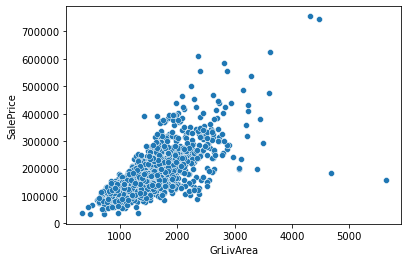

In [23]:
sns.scatterplot(data = df,
               x = "GrLivArea",
               y = "SalePrice");

- Living area greater than 4000 Sq Ft, seems to be outliers in this data.
- Let's consider the records which are below 4000 SqFt

In [24]:
df = df[df["GrLivArea"] < 4000]
df.shape

(1456, 142)

### Variable clustering

In [25]:
categorical_variable = df.select_dtypes(include = ["O"]).columns
numerical_variable   = df.select_dtypes(exclude = ["O"]).columns
print("Numerical Variables   : " + str(len(numerical_variable)))
print("Categorical Variables : " + str(len(categorical_variable)))
df_numeric     = df[numerical_variable]
df_numeric.drop("Id", axis=1, inplace=True)
df_categorical = df[categorical_variable]

Numerical Variables   : 117
Categorical Variables : 25


### Categorical Variables - SalePrice

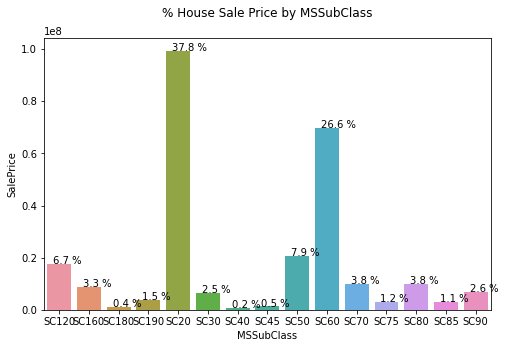

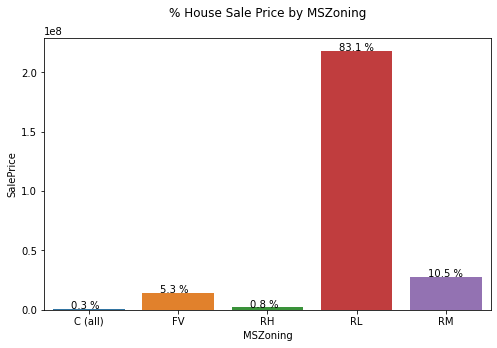

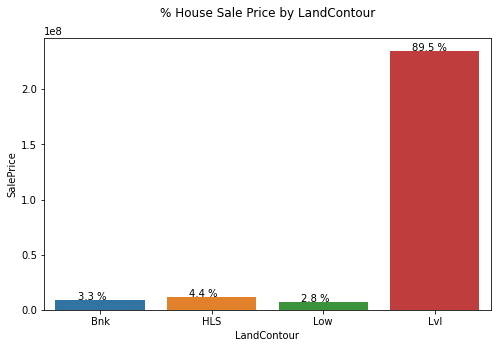

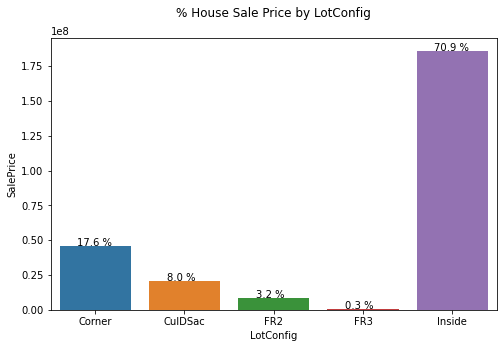

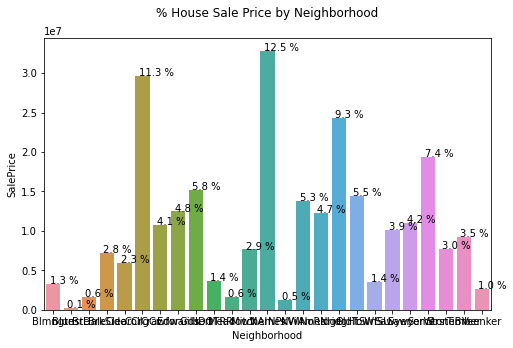

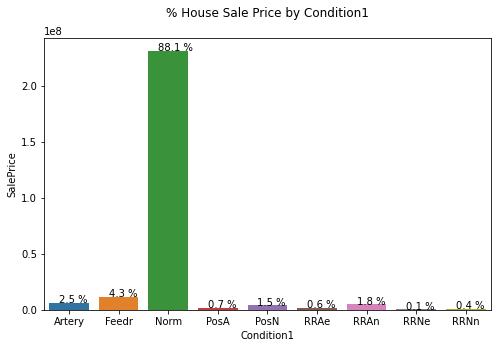

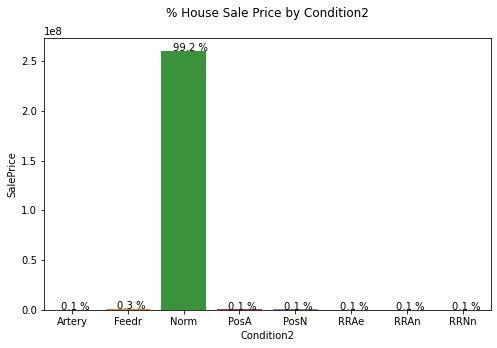

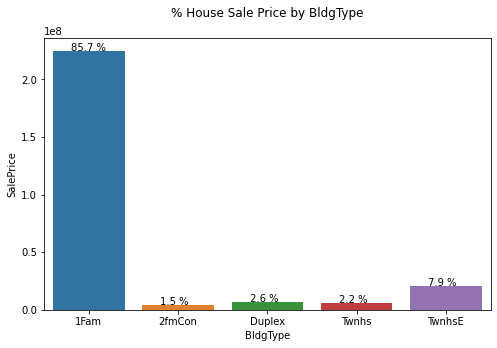

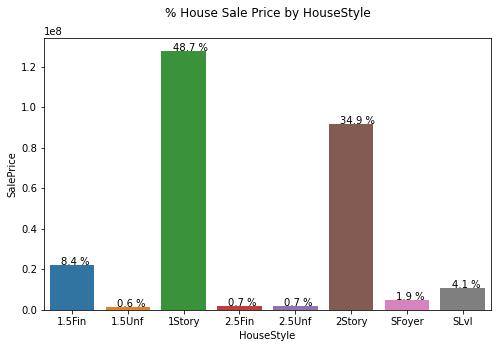

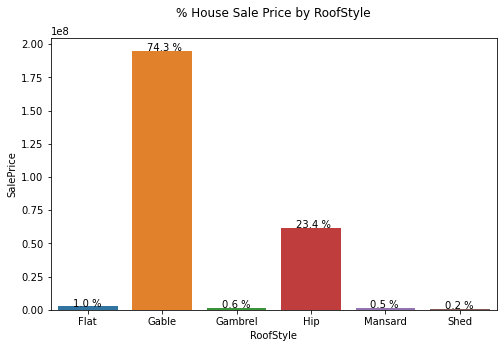

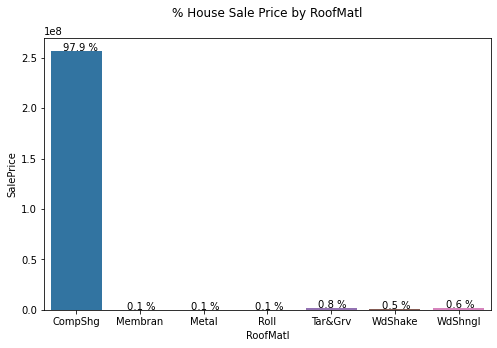

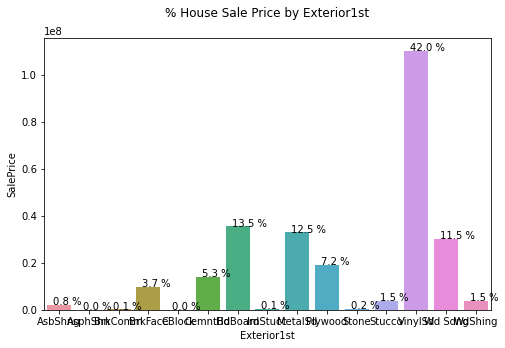

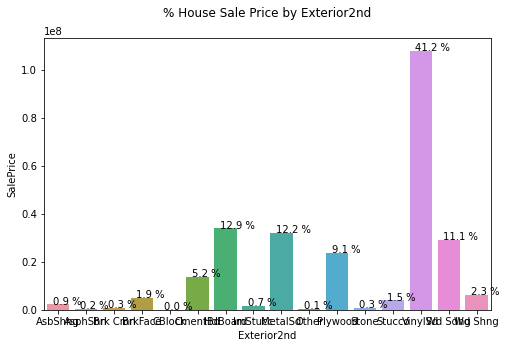

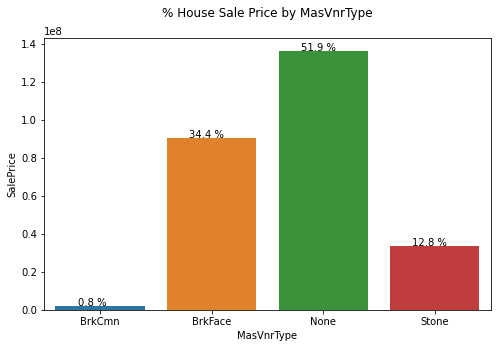

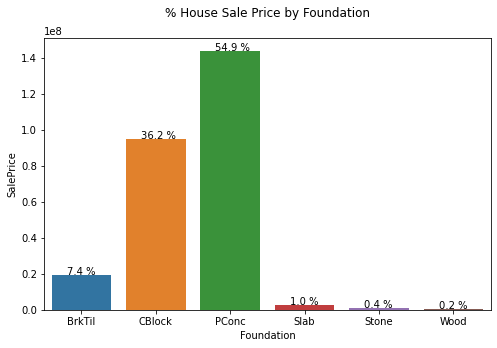

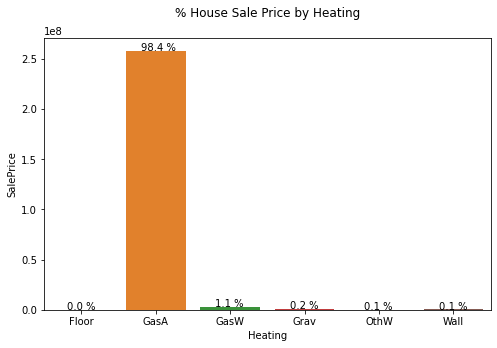

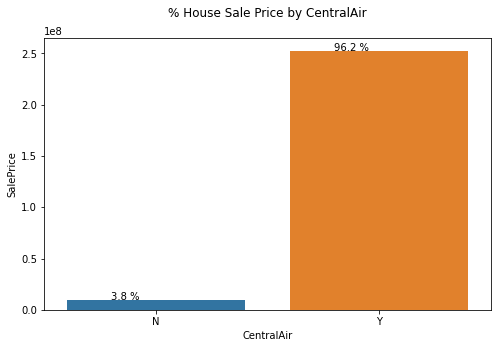

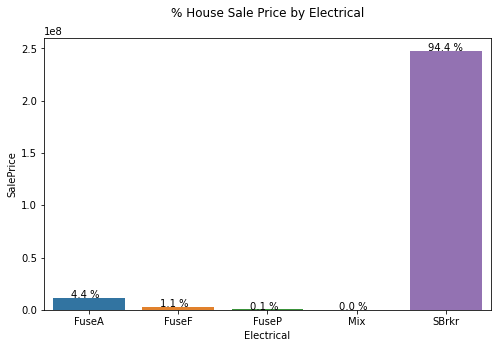

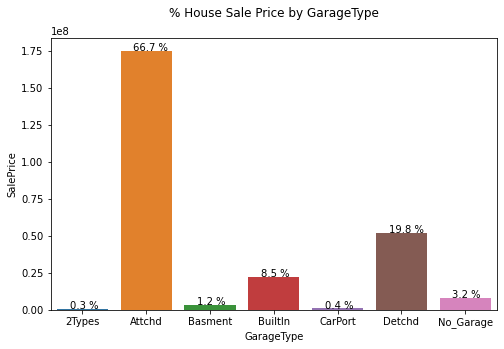

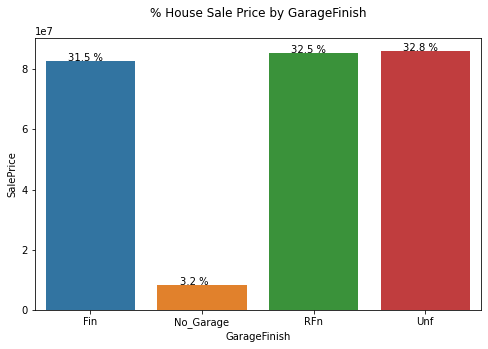

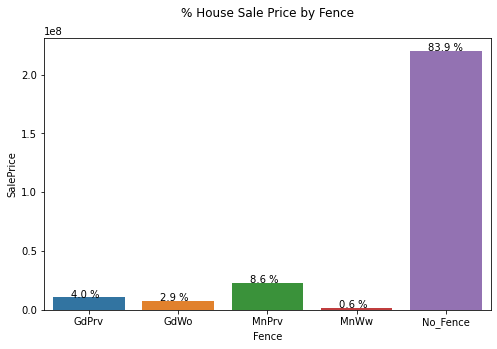

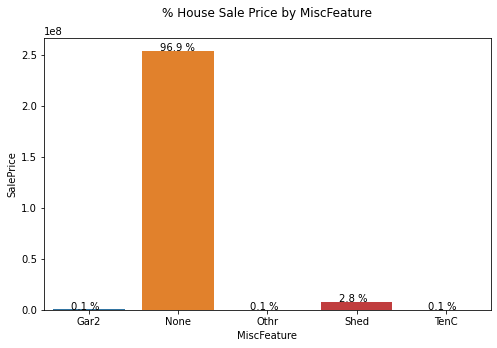

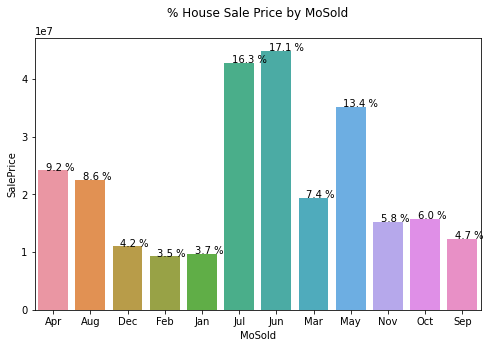

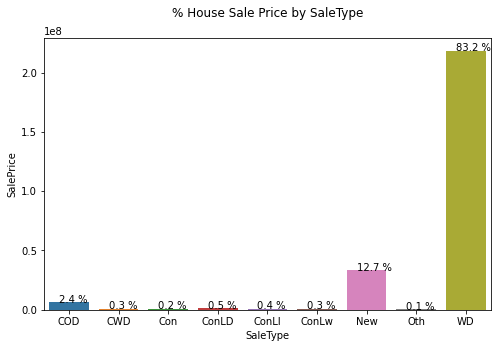

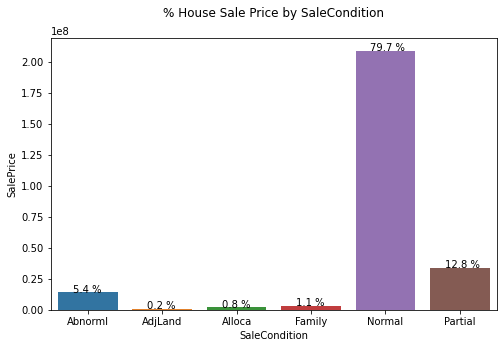

In [26]:
for i in df_categorical.columns:
    plt.figure(figsize=(8,5))
    plt.title("% House Sale Price by "+i+"\n")
    plt.xticks(rotation=0)
    x = df[[i,'SalePrice']].groupby(i).sum().reset_index()
    ax = sns.barplot(x[i], x['SalePrice'])
    for p in ax.patches:
        ax.annotate('{:,.1f} %'.format(p.get_height()/sum(df['SalePrice'])*100), (p.get_x()+0.2, p.get_height()+0.1))
    plt.show()

### Observations
#### Categorical Variables - SalesPrice
- MSSubClass: (Identifies the type of dwelling involved in the sale)
    - 20 & 60: (1-STORY 1946 & NEWER ALL STYLES) & (2-STORY 1946 & NEWER) captures __65 %__
- MSZoning: (Identifies the general zoning classification of the sale)
    - RL (Residential Low Density): __83 %__ of residents prefer low density residencial area
- LandContour: (Flatness of the property)
    - Lvl (Near Flat/Level): __90 %__ of residents prefer flat area
- LotConfig: (Lot configuration)
    -  Inside (Inside lot): __70 %__ of residents prefer Inside lots followed by Corner (__18 %__)
- Neighborhood: (Physical locations within Ames city limits)
    -  NAmes & CollgCr (North Ames & College Creek): __1/4 th__ of residents prefer these 2 segments    
- Condition1 & Condition2: (Proximity to various conditions)
    -  Norm (Normal): __88 %__ in condition 1 and __99 %__ residents in condition 2 prefers normal proximities     
- Condition1 & Condition2: (Proximity to various conditions)
    -  Norm (Normal): __88 %__ in condition 1 and __99 %__ residents in condition 2 prefers normal proximities   
- SaleType: (Type of sale)
    -  WD (Warranty Deed - Conventional): __83 %__ of residents prefer Warranty Deed - Conventional
- SaleCondition: (Condition of sale)
    -  Normal (Normal Sale): __80 %__ of residents prefer Normal Sale    
- SaleCondition: (Condition of sale)
    -  Normal (Normal Sale): __80 %__ of residents prefer Normal Sale
- GarageType: (Garage location)
    -  Attchd (Attached to home): __70 %__ of residents prefer garages attached to home 
- GarageFinish: (Interior finish of the garage)
    -  No_Garage (No Garage): Residents not prefer homes without garages  
- e.t.c

### Numeric Variables - SalePrice

                                                    Variable :  LotFrontage
----------------------------------------------------------------------------------------------------------------


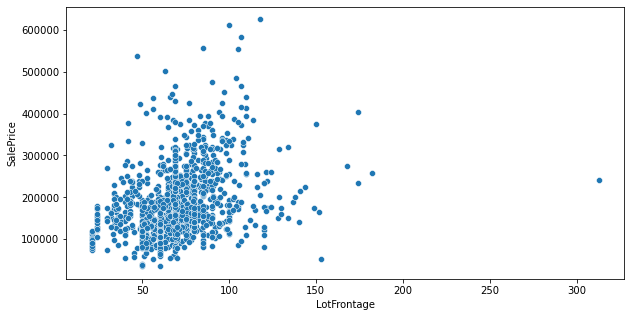

                                                    Variable :  LotArea
----------------------------------------------------------------------------------------------------------------


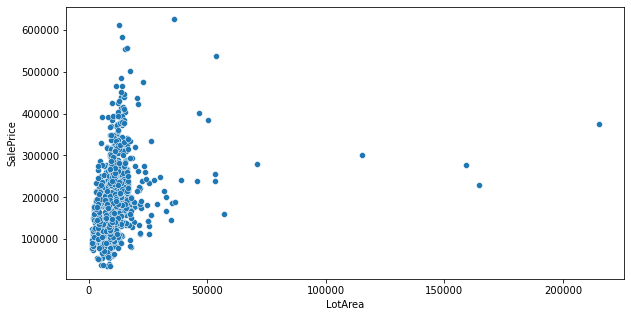

                                                    Variable :  Street
----------------------------------------------------------------------------------------------------------------


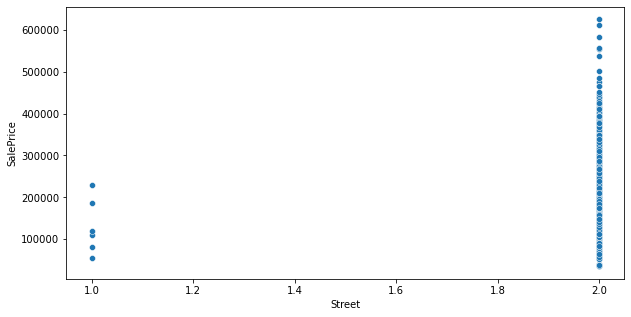

                                                    Variable :  Alley
----------------------------------------------------------------------------------------------------------------


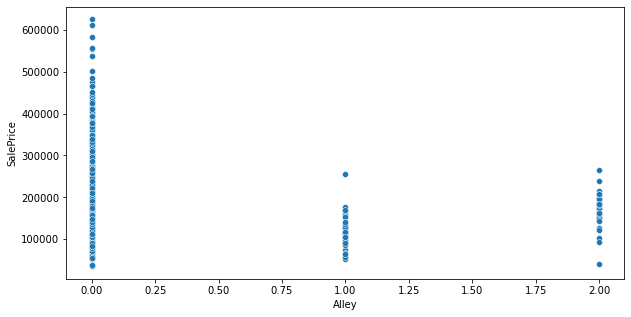

                                                    Variable :  LotShape
----------------------------------------------------------------------------------------------------------------


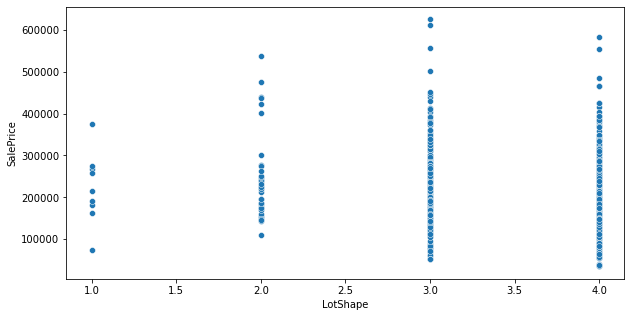

                                                    Variable :  Utilities
----------------------------------------------------------------------------------------------------------------


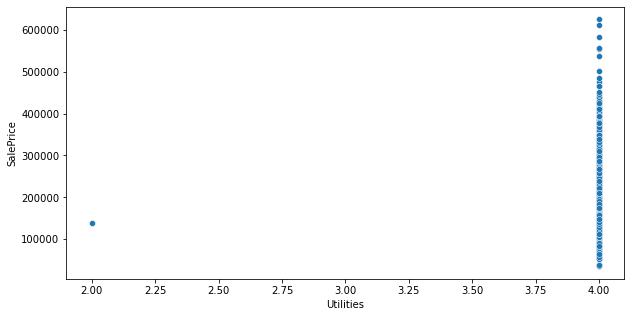

                                                    Variable :  LandSlope
----------------------------------------------------------------------------------------------------------------


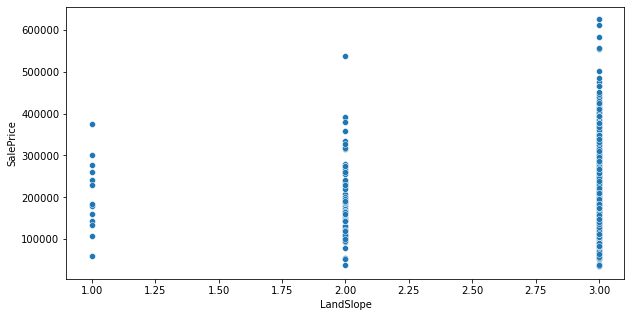

                                                    Variable :  OverallQual
----------------------------------------------------------------------------------------------------------------


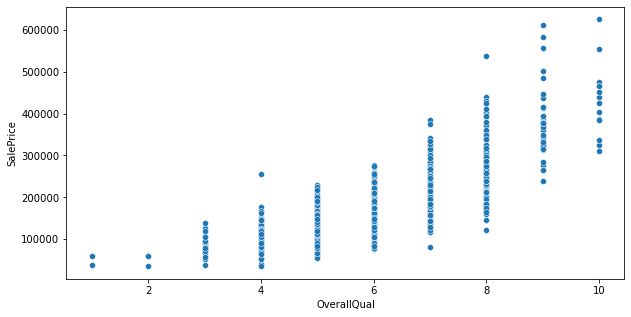

                                                    Variable :  OverallCond
----------------------------------------------------------------------------------------------------------------


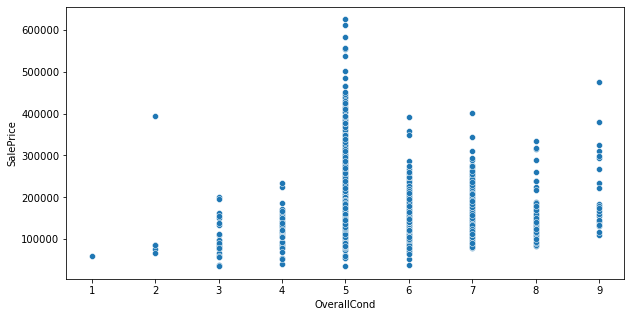

                                                    Variable :  YearBuilt
----------------------------------------------------------------------------------------------------------------


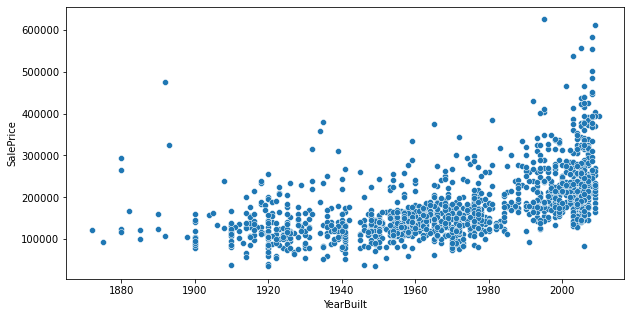

                                                    Variable :  YearRemodAdd
----------------------------------------------------------------------------------------------------------------


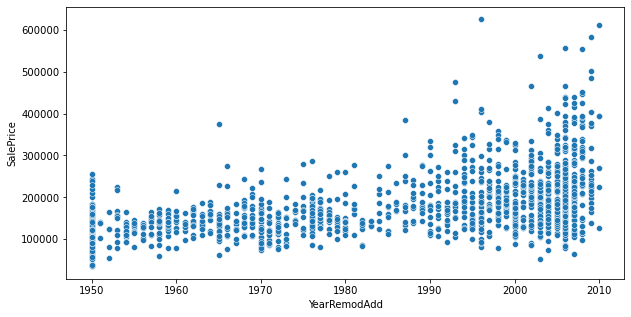

                                                    Variable :  MasVnrArea
----------------------------------------------------------------------------------------------------------------


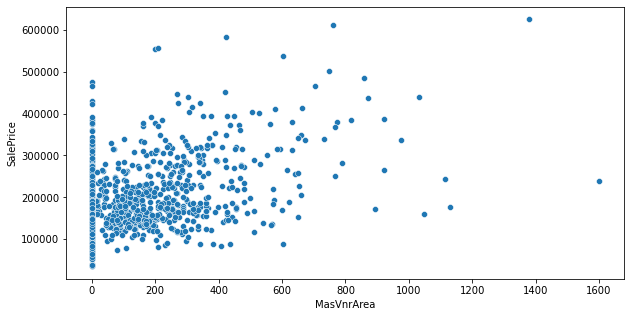

                                                    Variable :  ExterQual
----------------------------------------------------------------------------------------------------------------


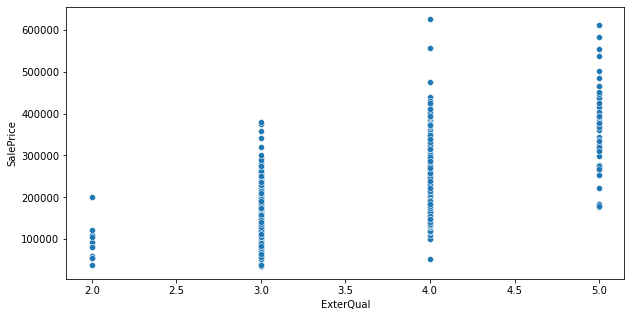

                                                    Variable :  ExterCond
----------------------------------------------------------------------------------------------------------------


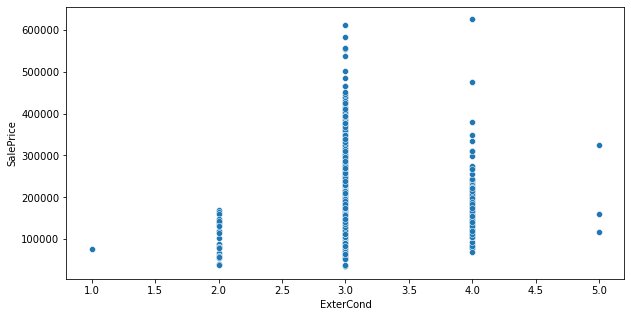

                                                    Variable :  BsmtQual
----------------------------------------------------------------------------------------------------------------


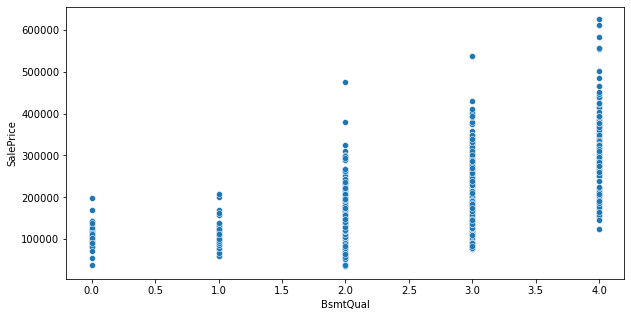

                                                    Variable :  BsmtCond
----------------------------------------------------------------------------------------------------------------


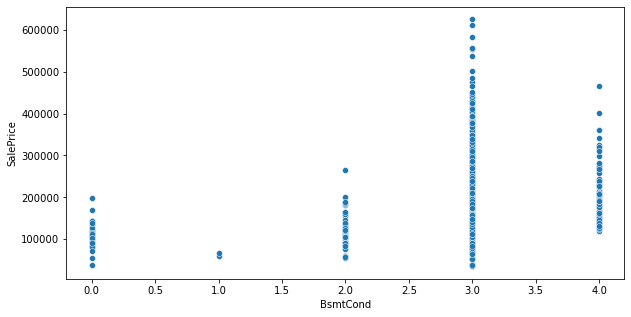

                                                    Variable :  BsmtExposure
----------------------------------------------------------------------------------------------------------------


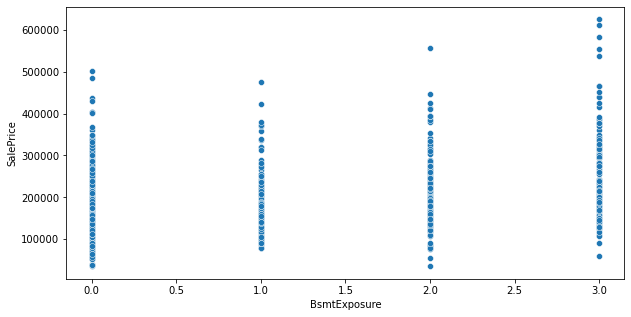

                                                    Variable :  BsmtFinType1
----------------------------------------------------------------------------------------------------------------


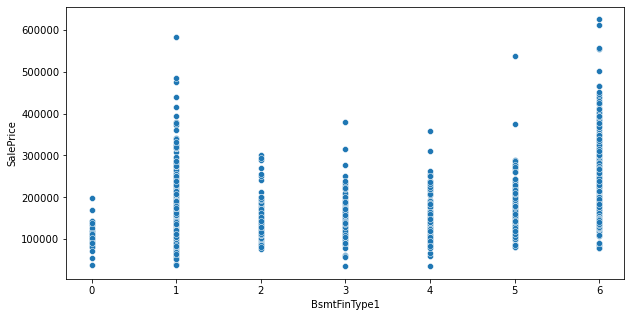

                                                    Variable :  BsmtFinSF1
----------------------------------------------------------------------------------------------------------------


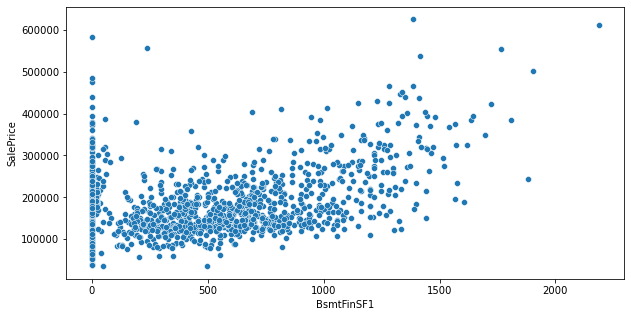

                                                    Variable :  BsmtFinType2
----------------------------------------------------------------------------------------------------------------


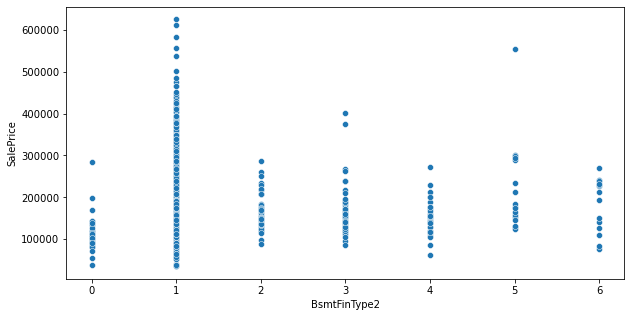

                                                    Variable :  BsmtFinSF2
----------------------------------------------------------------------------------------------------------------


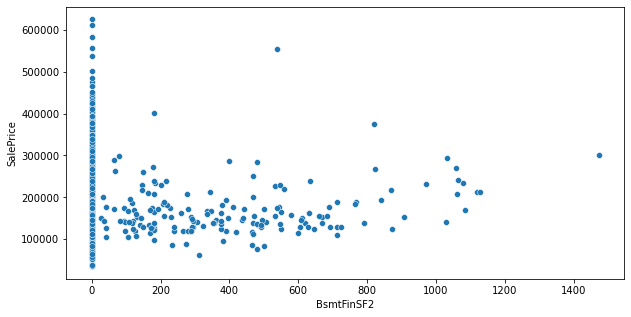

                                                    Variable :  BsmtUnfSF
----------------------------------------------------------------------------------------------------------------


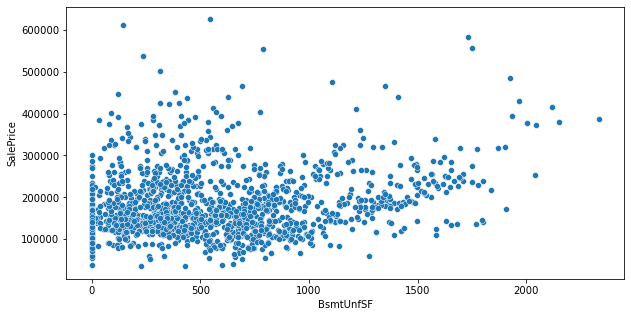

                                                    Variable :  TotalBsmtSF
----------------------------------------------------------------------------------------------------------------


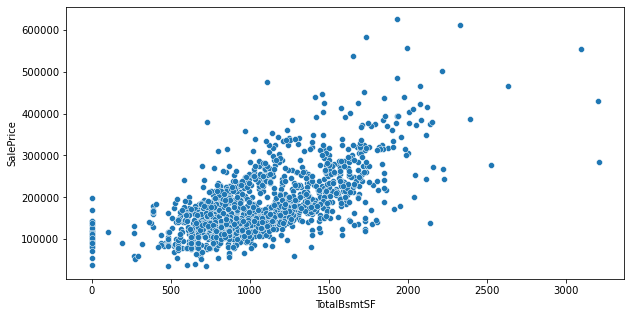

                                                    Variable :  HeatingQC
----------------------------------------------------------------------------------------------------------------


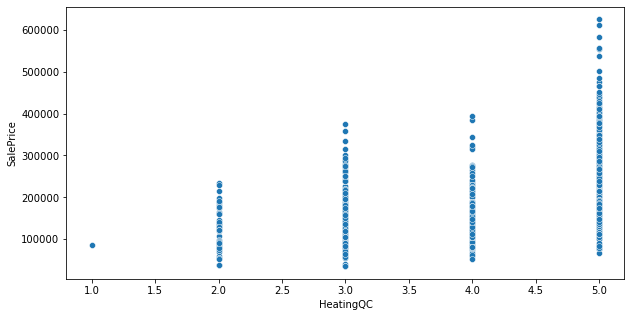

                                                    Variable :  1stFlrSF
----------------------------------------------------------------------------------------------------------------


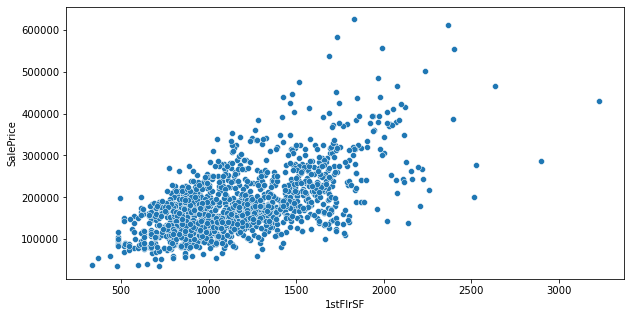

                                                    Variable :  2ndFlrSF
----------------------------------------------------------------------------------------------------------------


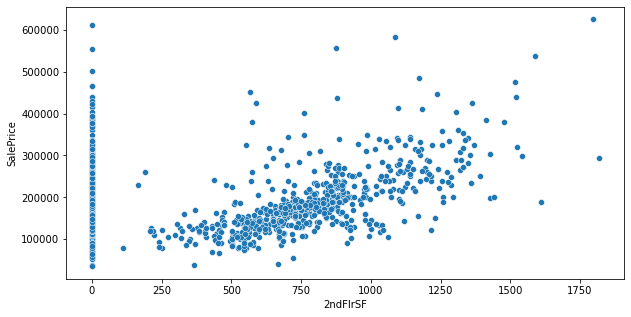

                                                    Variable :  LowQualFinSF
----------------------------------------------------------------------------------------------------------------


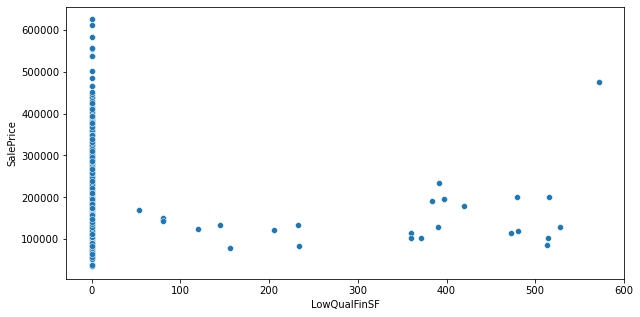

                                                    Variable :  GrLivArea
----------------------------------------------------------------------------------------------------------------


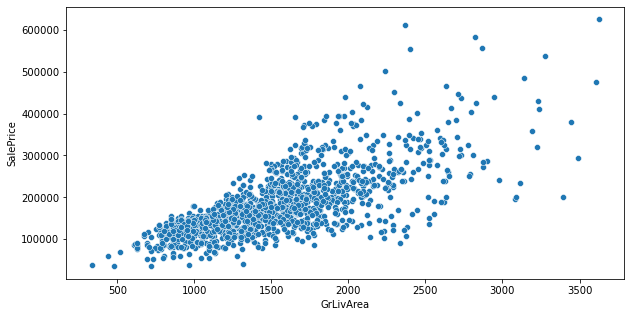

                                                    Variable :  BsmtFullBath
----------------------------------------------------------------------------------------------------------------


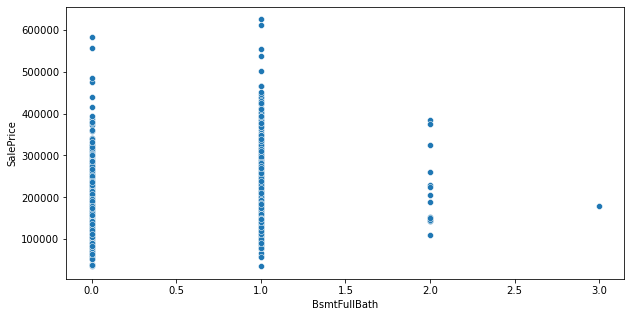

                                                    Variable :  BsmtHalfBath
----------------------------------------------------------------------------------------------------------------


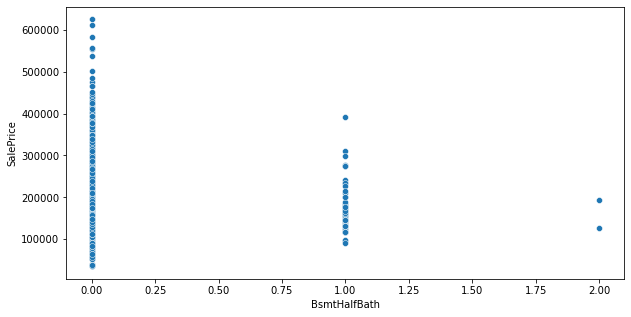

                                                    Variable :  FullBath
----------------------------------------------------------------------------------------------------------------


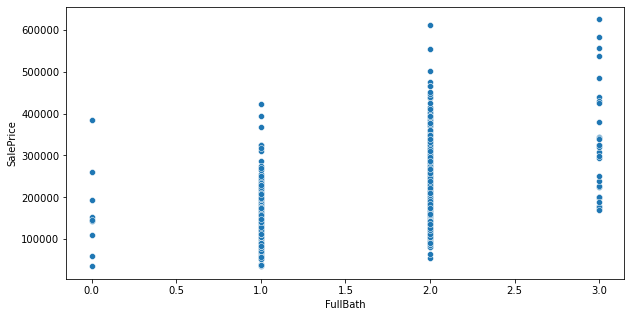

                                                    Variable :  HalfBath
----------------------------------------------------------------------------------------------------------------


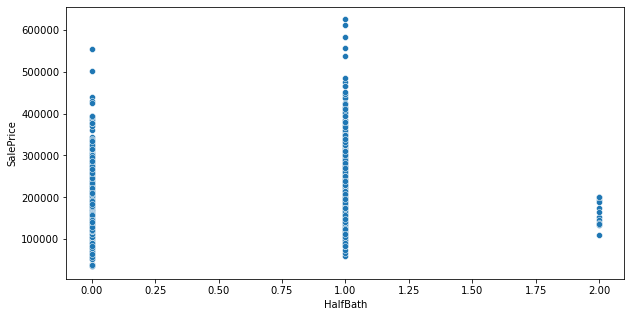

                                                    Variable :  BedroomAbvGr
----------------------------------------------------------------------------------------------------------------


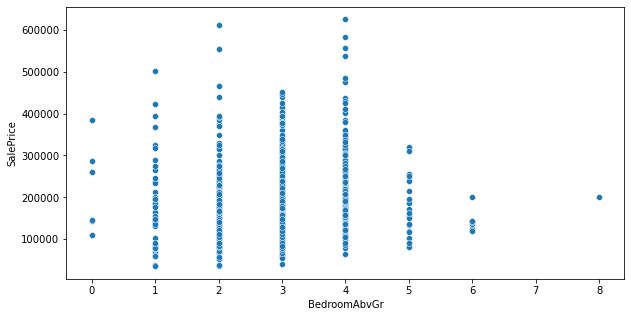

                                                    Variable :  KitchenAbvGr
----------------------------------------------------------------------------------------------------------------


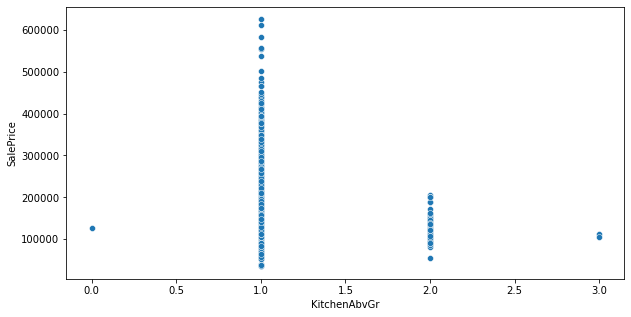

                                                    Variable :  KitchenQual
----------------------------------------------------------------------------------------------------------------


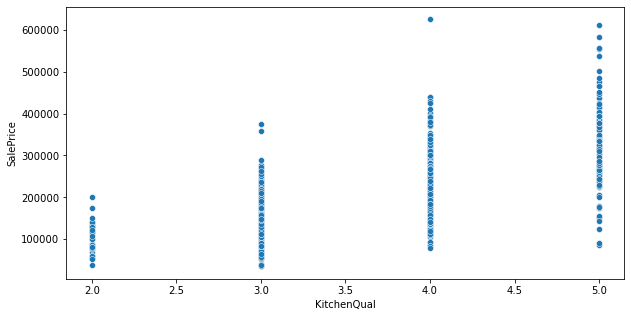

                                                    Variable :  TotRmsAbvGrd
----------------------------------------------------------------------------------------------------------------


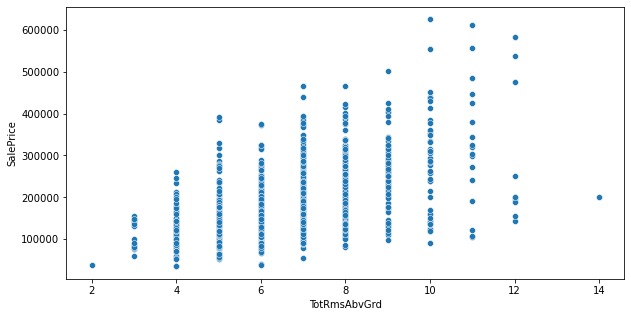

                                                    Variable :  Functional
----------------------------------------------------------------------------------------------------------------


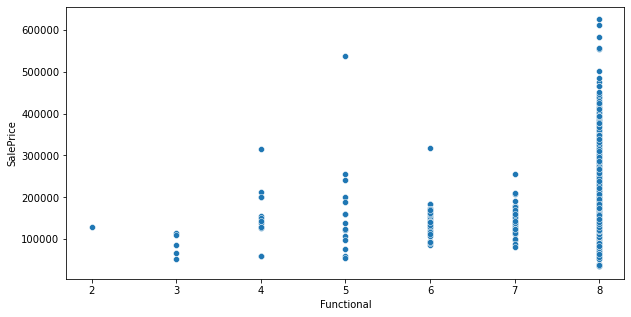

                                                    Variable :  Fireplaces
----------------------------------------------------------------------------------------------------------------


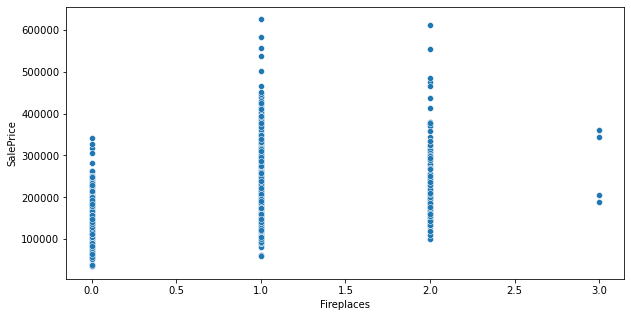

                                                    Variable :  FireplaceQu
----------------------------------------------------------------------------------------------------------------


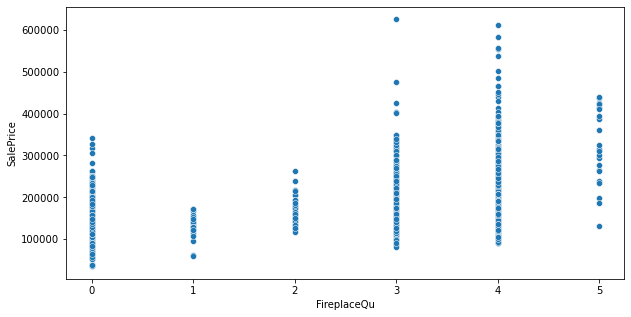

                                                    Variable :  GarageYrBlt
----------------------------------------------------------------------------------------------------------------


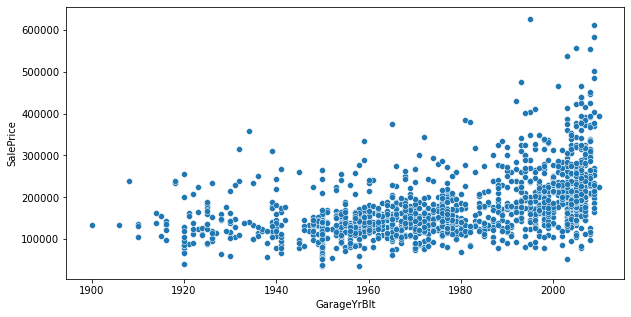

                                                    Variable :  GarageCars
----------------------------------------------------------------------------------------------------------------


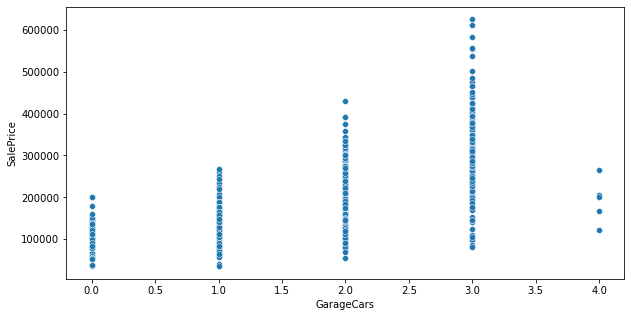

                                                    Variable :  GarageArea
----------------------------------------------------------------------------------------------------------------


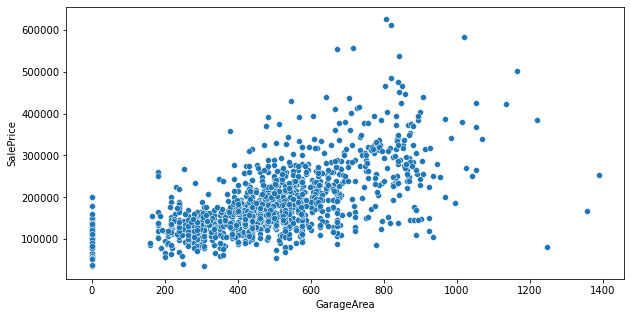

                                                    Variable :  GarageQual
----------------------------------------------------------------------------------------------------------------


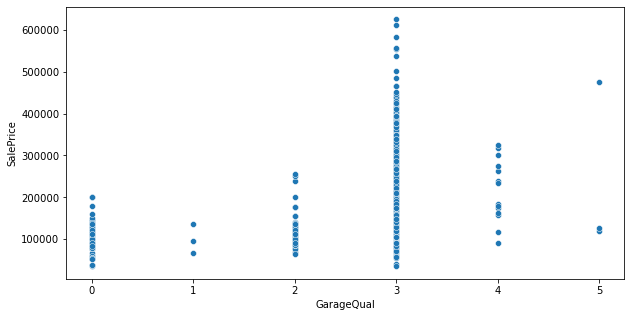

                                                    Variable :  GarageCond
----------------------------------------------------------------------------------------------------------------


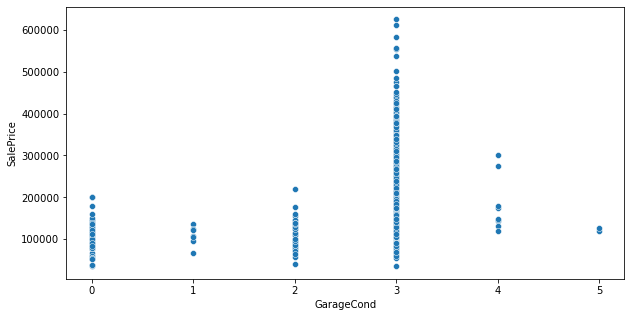

                                                    Variable :  PavedDrive
----------------------------------------------------------------------------------------------------------------


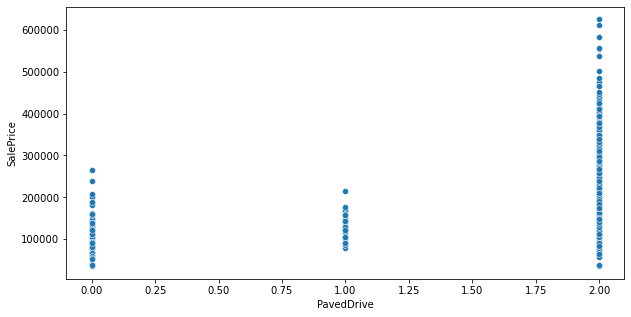

                                                    Variable :  WoodDeckSF
----------------------------------------------------------------------------------------------------------------


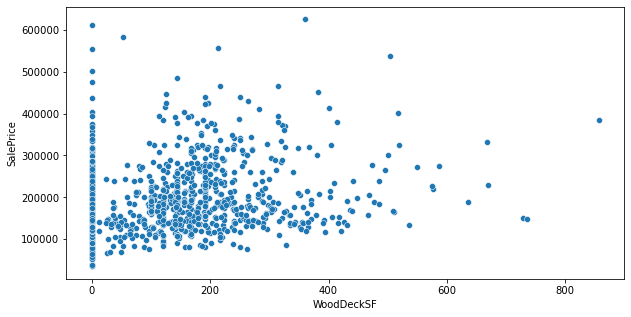

                                                    Variable :  OpenPorchSF
----------------------------------------------------------------------------------------------------------------


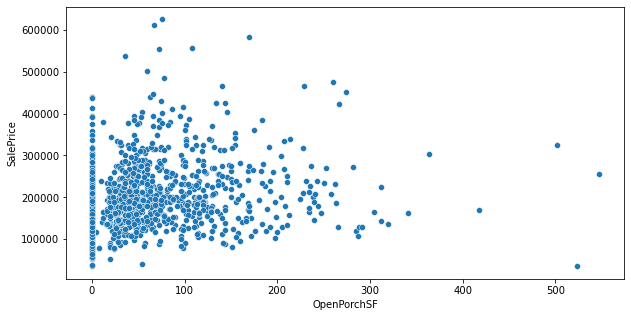

                                                    Variable :  EnclosedPorch
----------------------------------------------------------------------------------------------------------------


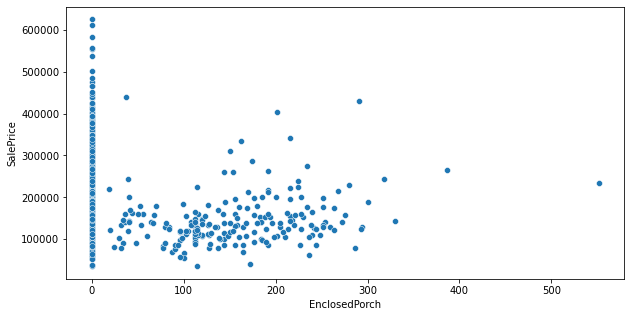

                                                    Variable :  3SsnPorch
----------------------------------------------------------------------------------------------------------------


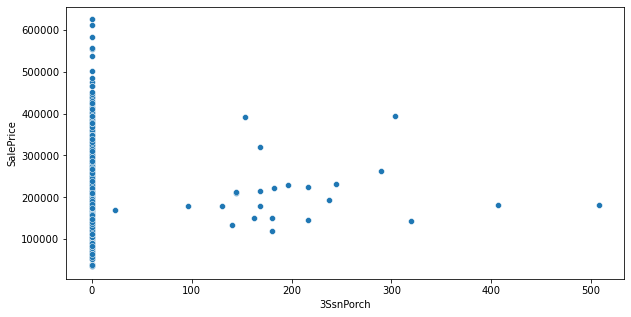

                                                    Variable :  ScreenPorch
----------------------------------------------------------------------------------------------------------------


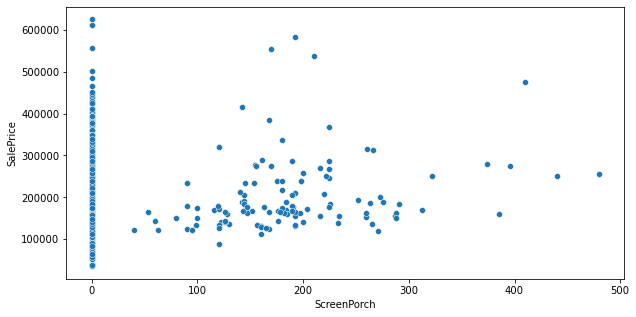

                                                    Variable :  PoolArea
----------------------------------------------------------------------------------------------------------------


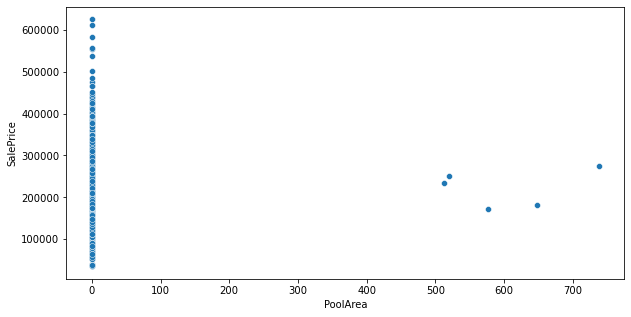

                                                    Variable :  PoolQC
----------------------------------------------------------------------------------------------------------------


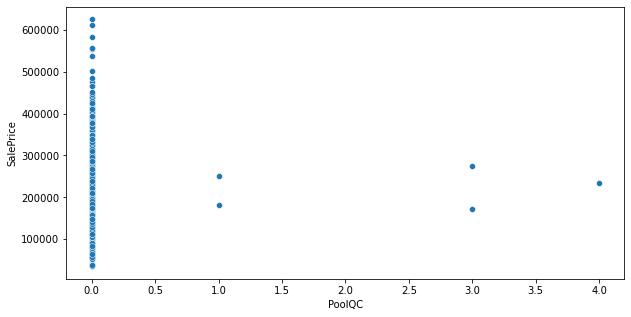

                                                    Variable :  MiscVal
----------------------------------------------------------------------------------------------------------------


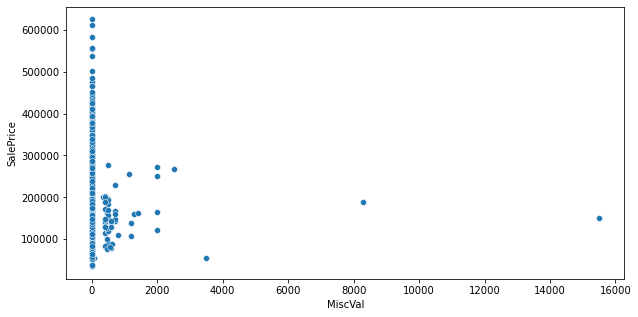

                                                    Variable :  YrSold
----------------------------------------------------------------------------------------------------------------


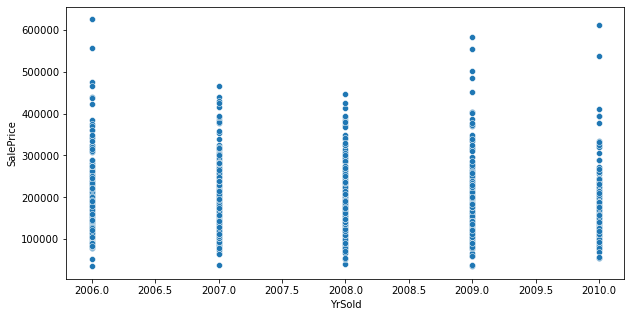

                                                    Variable :  SalePrice
----------------------------------------------------------------------------------------------------------------


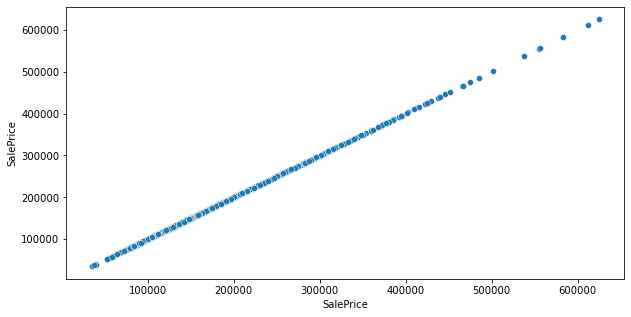

                                                    Variable :  FeatureGarageCond
----------------------------------------------------------------------------------------------------------------


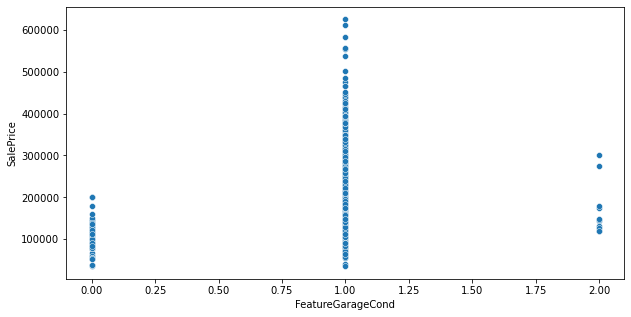

                                                    Variable :  FeatureGarageQual
----------------------------------------------------------------------------------------------------------------


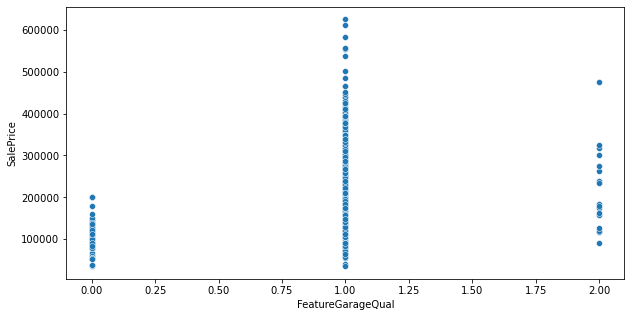

                                                    Variable :  FeatureFireplaceQu
----------------------------------------------------------------------------------------------------------------


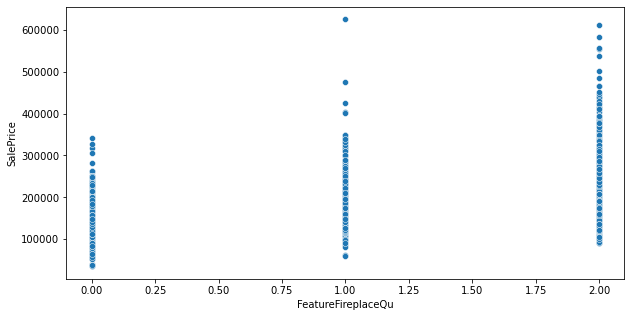

                                                    Variable :  FeatureOverallQual
----------------------------------------------------------------------------------------------------------------


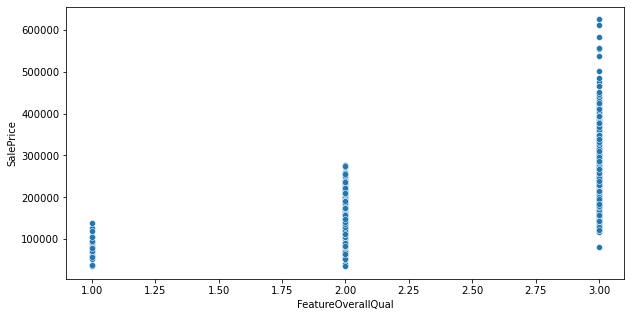

                                                    Variable :  FeatureOverallCond
----------------------------------------------------------------------------------------------------------------


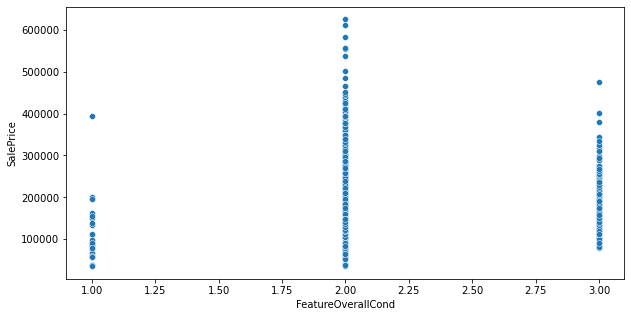

                                                    Variable :  FeaturePoolQC
----------------------------------------------------------------------------------------------------------------


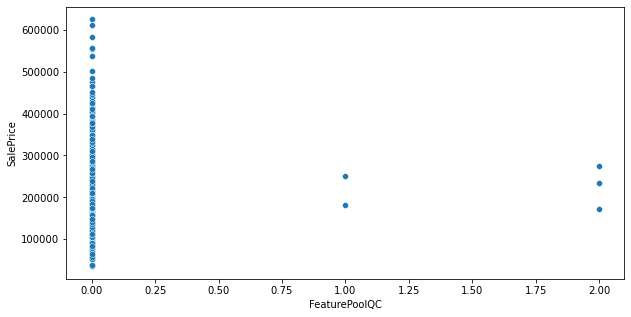

                                                    Variable :  FeatureFunctional
----------------------------------------------------------------------------------------------------------------


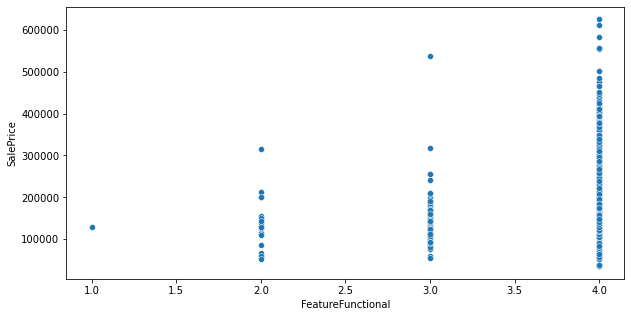

                                                    Variable :  FeatureKitchenQual
----------------------------------------------------------------------------------------------------------------


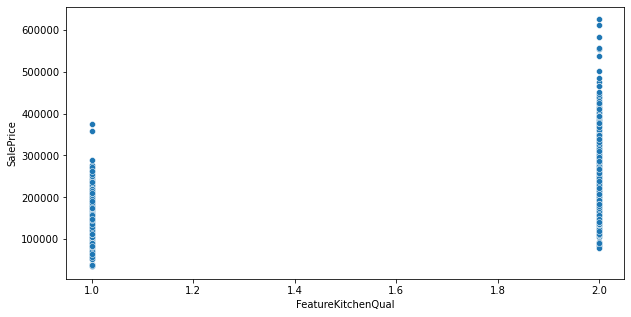

                                                    Variable :  FeatureHeatingQC
----------------------------------------------------------------------------------------------------------------


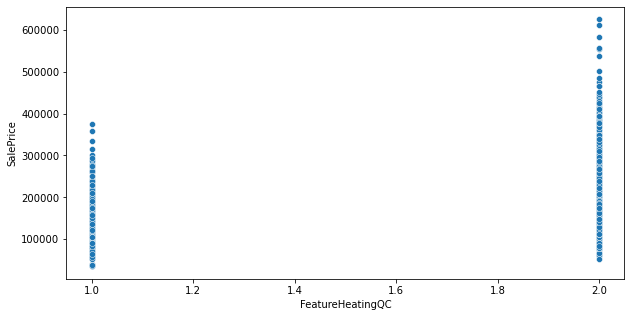

                                                    Variable :  FeatureBsmtFinType1
----------------------------------------------------------------------------------------------------------------


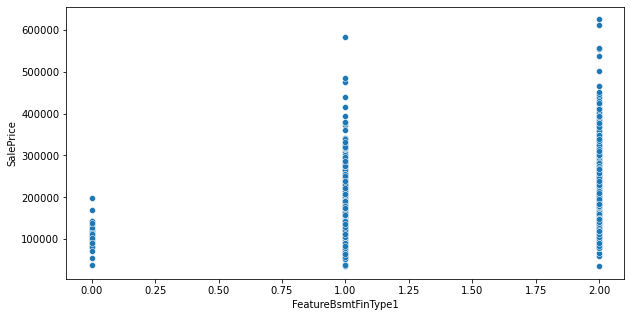

                                                    Variable :  FeatureExterCond
----------------------------------------------------------------------------------------------------------------


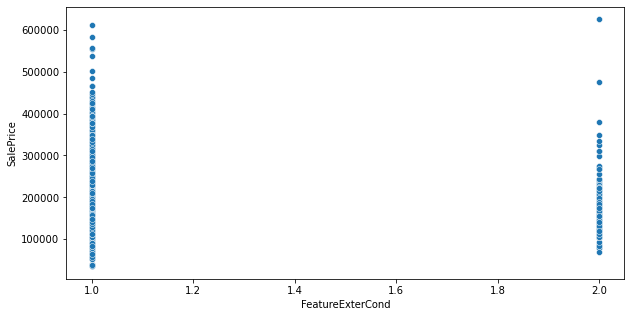

                                                    Variable :  FeatureExterQual
----------------------------------------------------------------------------------------------------------------


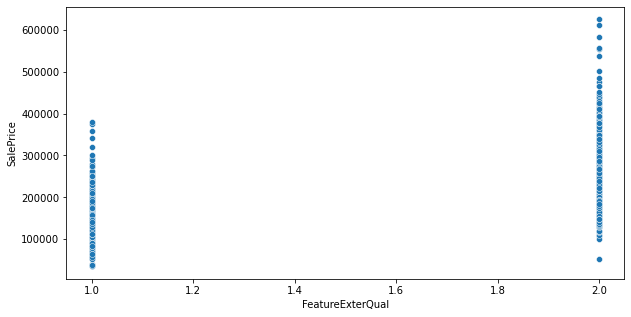

                                                    Variable :  FeatureBsmtFinType2
----------------------------------------------------------------------------------------------------------------


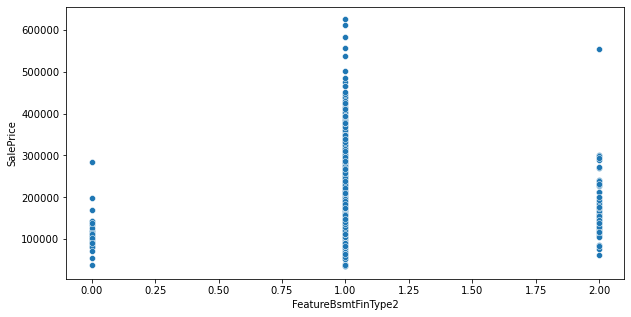

                                                    Variable :  FeatureBsmtCond
----------------------------------------------------------------------------------------------------------------


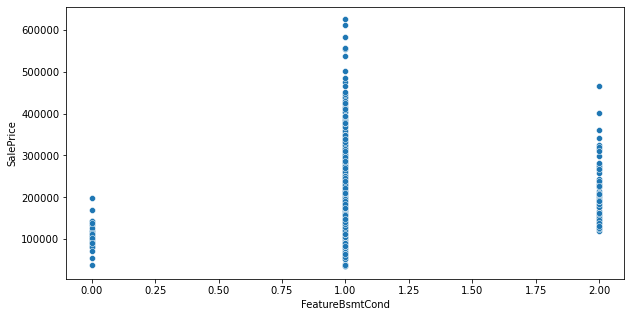

                                                    Variable :  FeatureBsmtQual
----------------------------------------------------------------------------------------------------------------


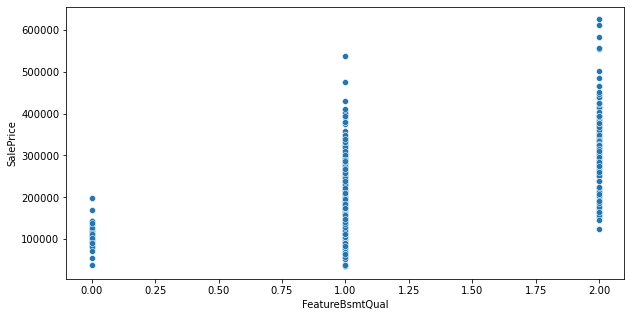

                                                    Variable :  ExterGrade
----------------------------------------------------------------------------------------------------------------


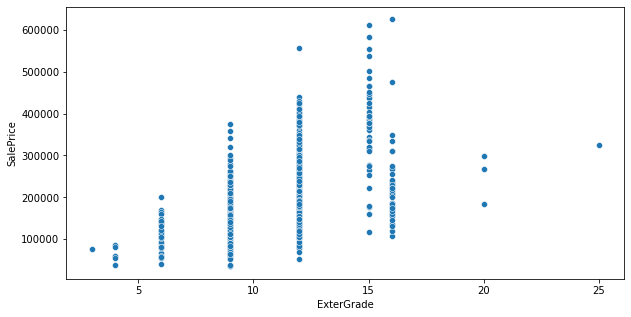

                                                    Variable :  KitchenScore
----------------------------------------------------------------------------------------------------------------


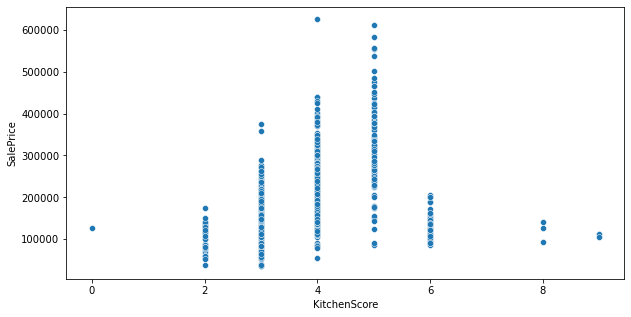

                                                    Variable :  FireplaceScore
----------------------------------------------------------------------------------------------------------------


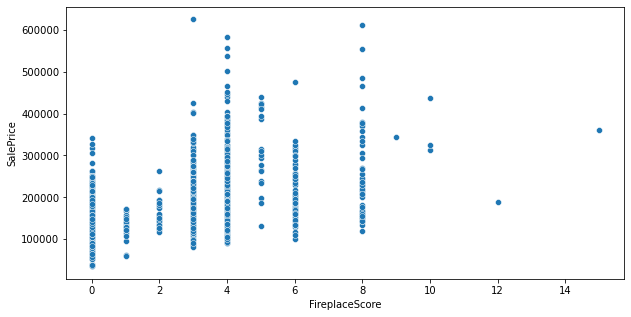

                                                    Variable :  OverallGrade
----------------------------------------------------------------------------------------------------------------


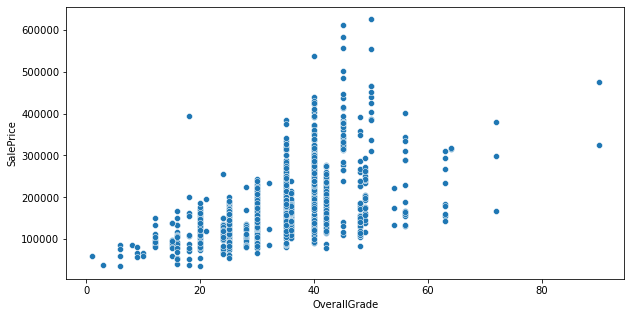

                                                    Variable :  GarageGrade
----------------------------------------------------------------------------------------------------------------


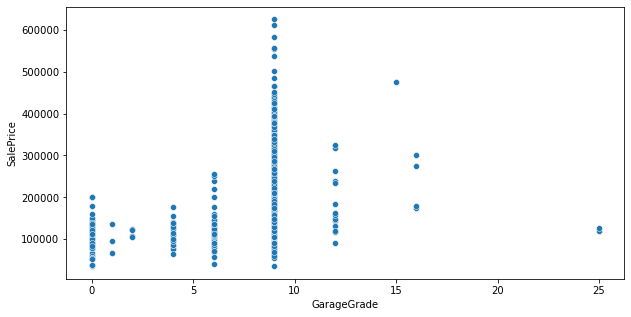

                                                    Variable :  GarageScore
----------------------------------------------------------------------------------------------------------------


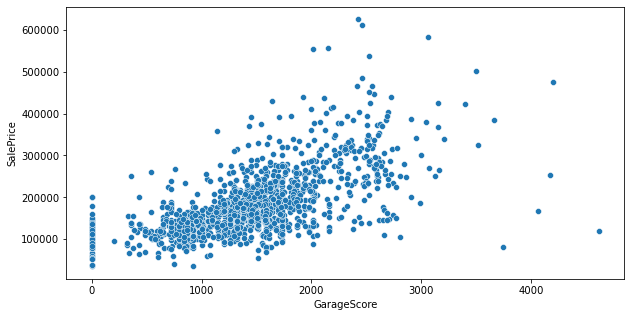

                                                    Variable :  AllSF
----------------------------------------------------------------------------------------------------------------


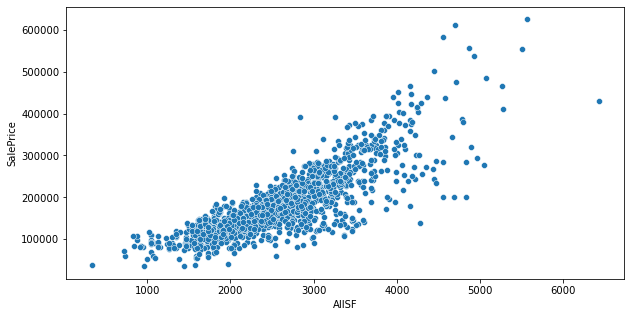

                                                    Variable :  AllFlrsSF
----------------------------------------------------------------------------------------------------------------


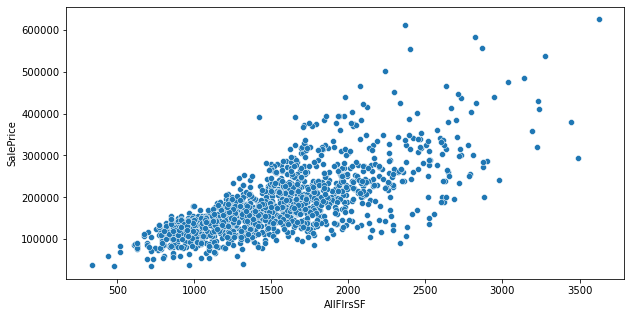

                                                    Variable :  AllPorchSF
----------------------------------------------------------------------------------------------------------------


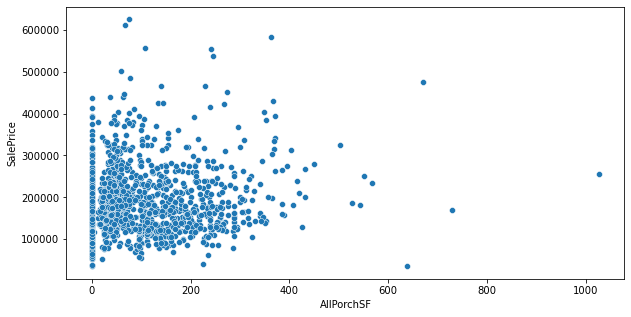

                                                    Variable :  HasMasVnr
----------------------------------------------------------------------------------------------------------------


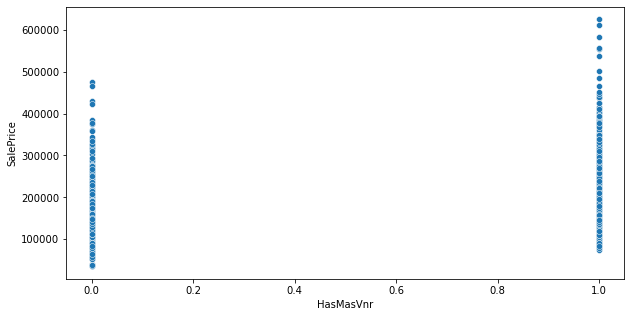

                                                    Variable :  BoughtOffPlan
----------------------------------------------------------------------------------------------------------------


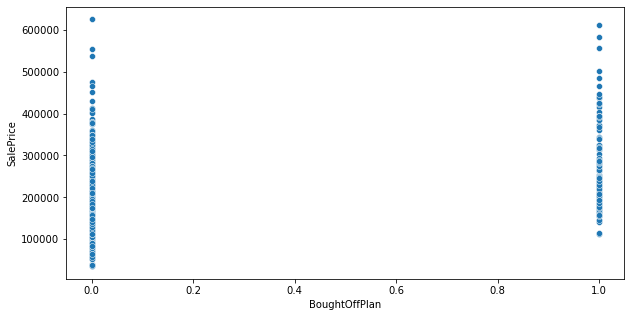

                                                    Variable :  PoolScore
----------------------------------------------------------------------------------------------------------------


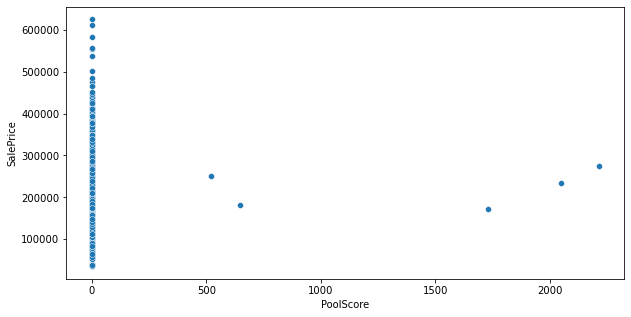

                                                    Variable :  FeatureOverallGrade
----------------------------------------------------------------------------------------------------------------


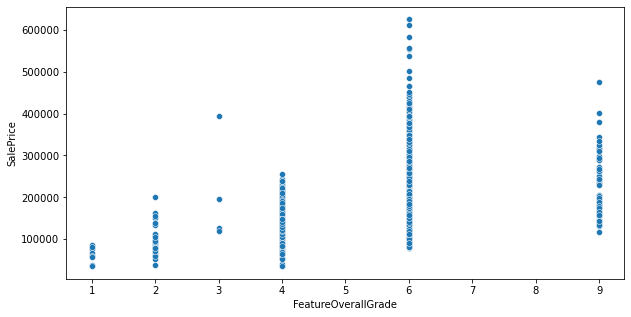

                                                    Variable :  FeatureKitchenScore
----------------------------------------------------------------------------------------------------------------


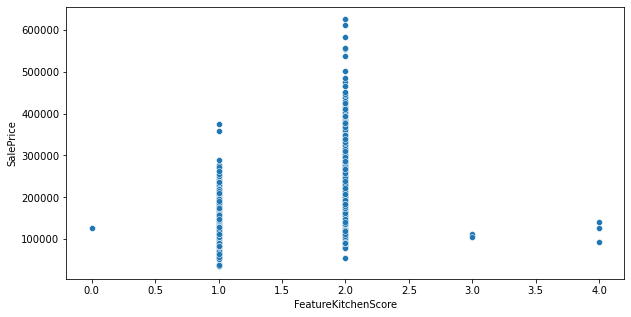

                                                    Variable :  TotalBath
----------------------------------------------------------------------------------------------------------------


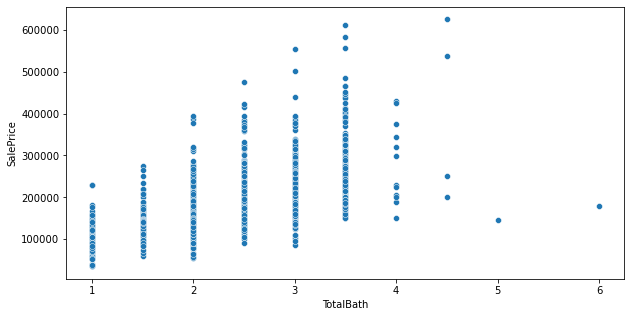

                                                    Variable :  FeatureExterGrade
----------------------------------------------------------------------------------------------------------------


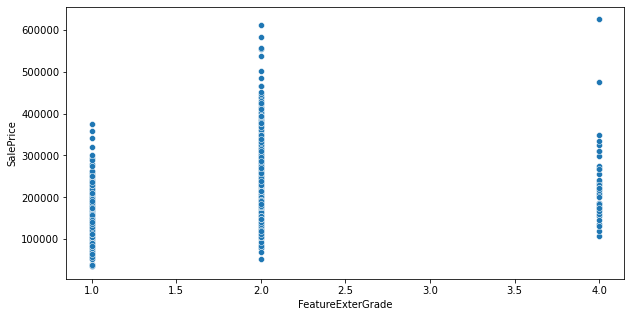

                                                    Variable :  FeaturePoolScore
----------------------------------------------------------------------------------------------------------------


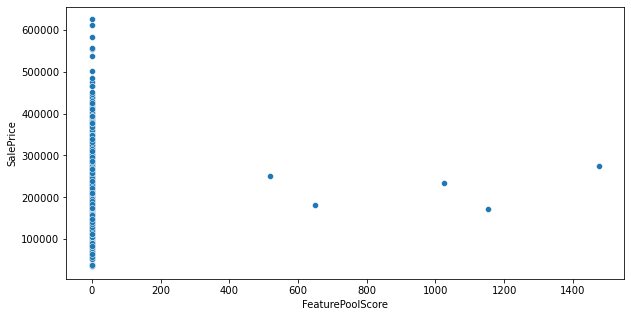

                                                    Variable :  FeatureGarageScore
----------------------------------------------------------------------------------------------------------------


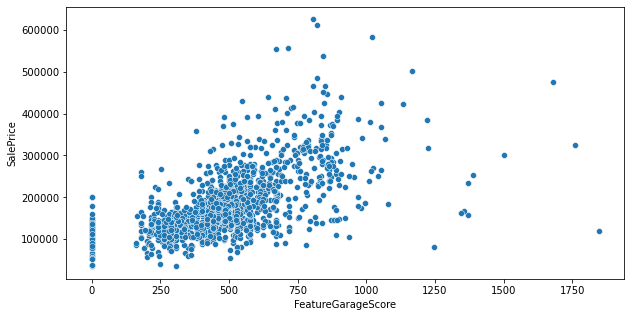

                                                    Variable :  FeatureFireplaceScore
----------------------------------------------------------------------------------------------------------------


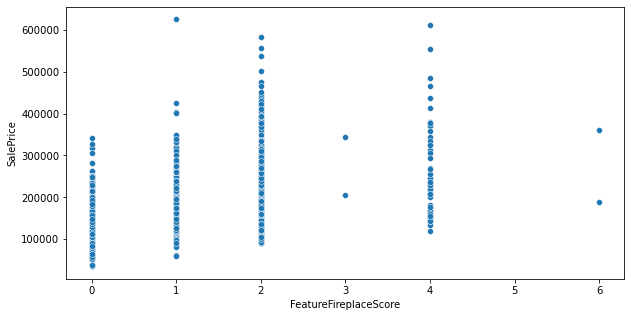

                                                    Variable :  OverallQual-s2
----------------------------------------------------------------------------------------------------------------


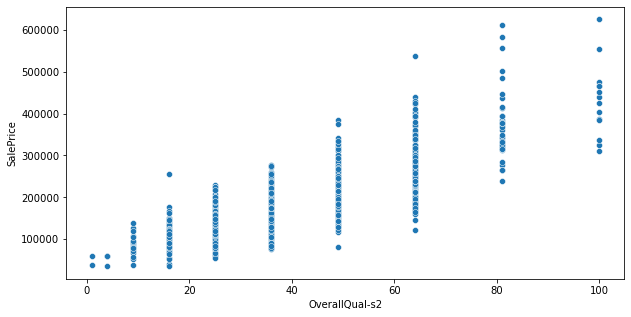

                                                    Variable :  OverallQual-s3
----------------------------------------------------------------------------------------------------------------


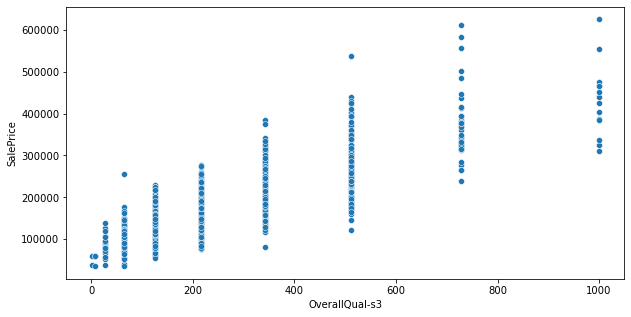

                                                    Variable :  OverallQual-Sq
----------------------------------------------------------------------------------------------------------------


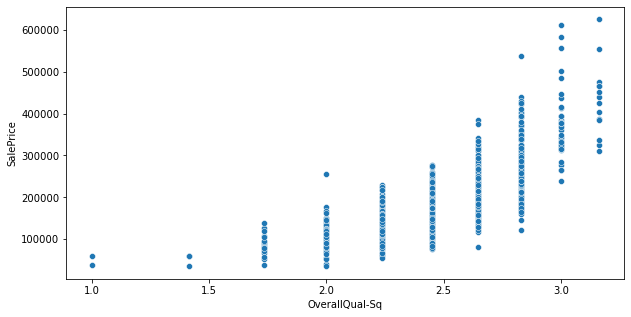

                                                    Variable :  AllSF-2
----------------------------------------------------------------------------------------------------------------


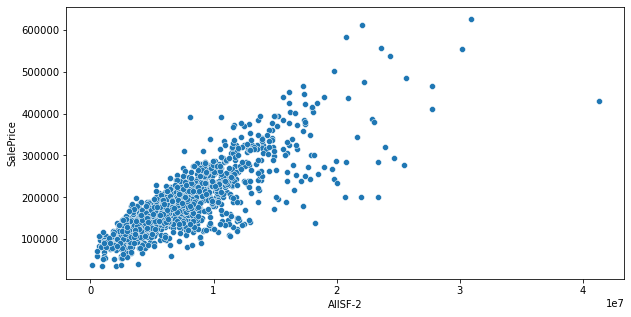

                                                    Variable :  AllSF-3
----------------------------------------------------------------------------------------------------------------


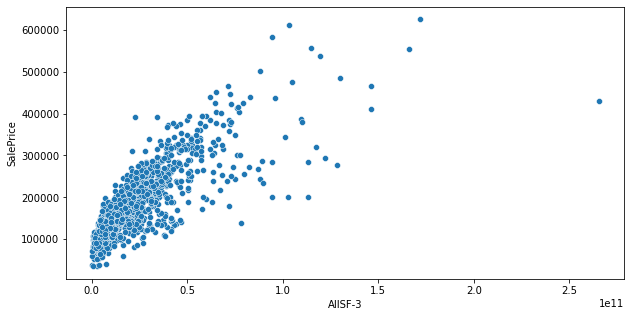

                                                    Variable :  AllSF-Sq
----------------------------------------------------------------------------------------------------------------


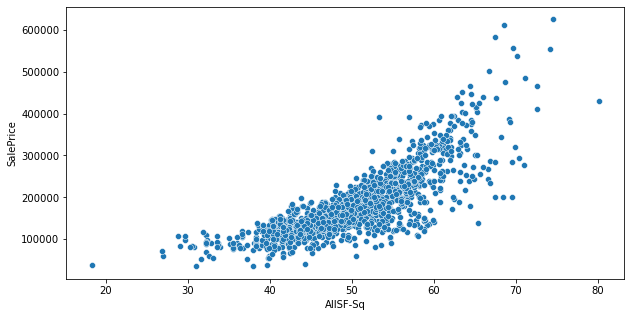

                                                    Variable :  AllFlrsSF-2
----------------------------------------------------------------------------------------------------------------


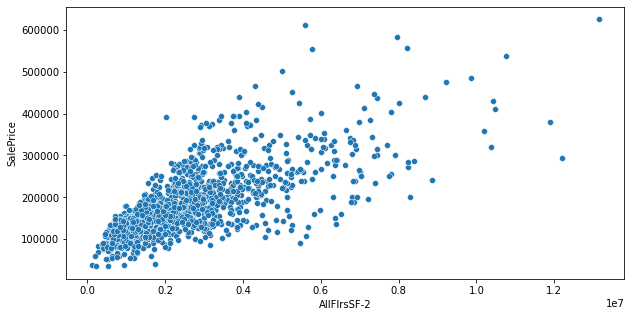

                                                    Variable :  AllFlrsSF-3
----------------------------------------------------------------------------------------------------------------


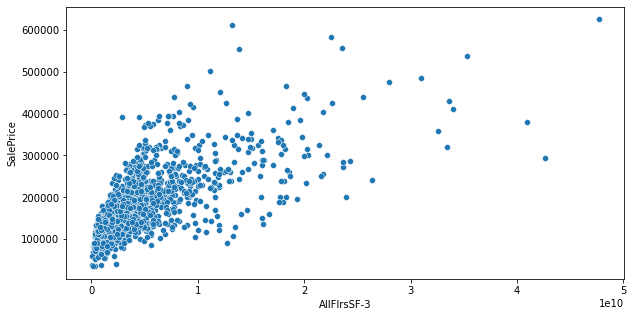

                                                    Variable :  AllFlrsSF-Sq
----------------------------------------------------------------------------------------------------------------


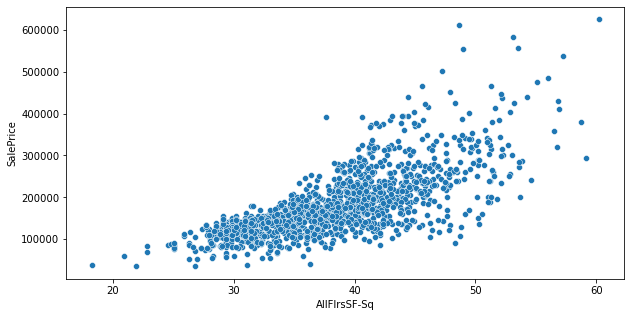

                                                    Variable :  GrLivArea-2
----------------------------------------------------------------------------------------------------------------


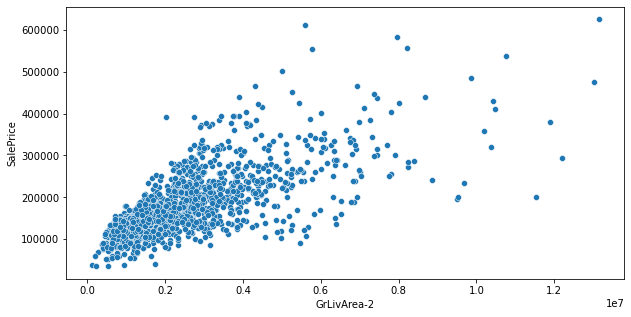

                                                    Variable :  GrLivArea-3
----------------------------------------------------------------------------------------------------------------


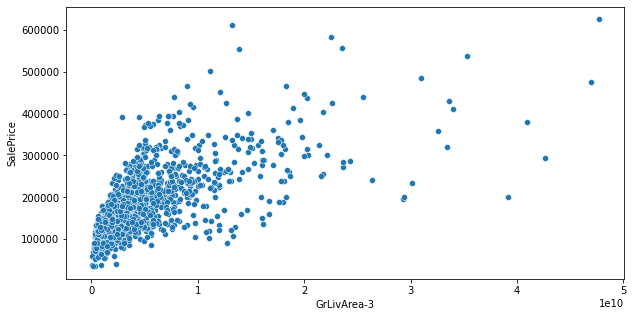

                                                    Variable :  GrLivArea-Sq
----------------------------------------------------------------------------------------------------------------


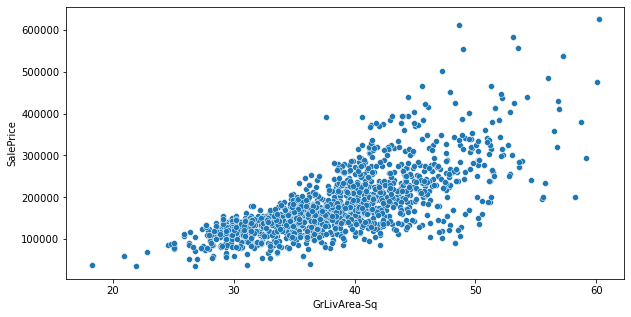

                                                    Variable :  ExterQual-2
----------------------------------------------------------------------------------------------------------------


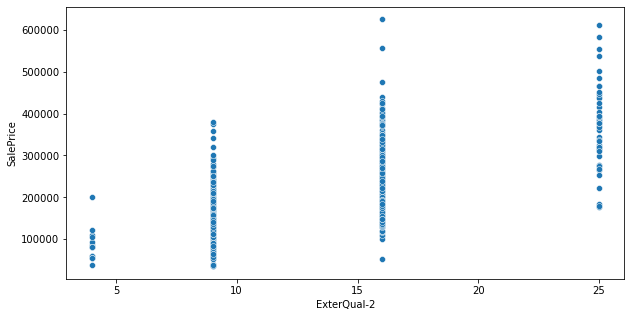

                                                    Variable :  ExterQual-3
----------------------------------------------------------------------------------------------------------------


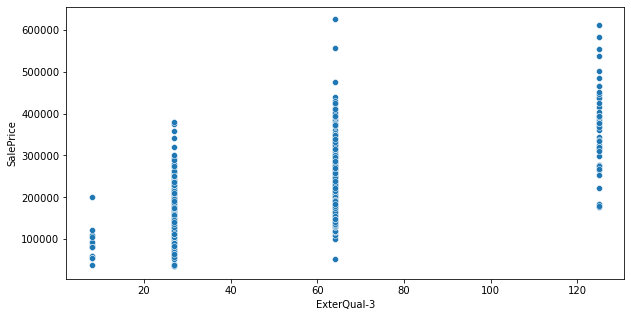

                                                    Variable :  ExterQual-Sq
----------------------------------------------------------------------------------------------------------------


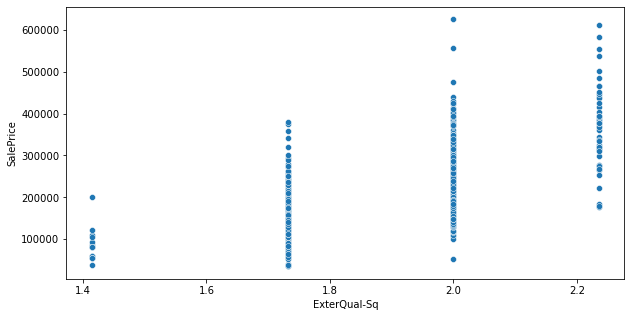

                                                    Variable :  FeatureOverallQual-2
----------------------------------------------------------------------------------------------------------------


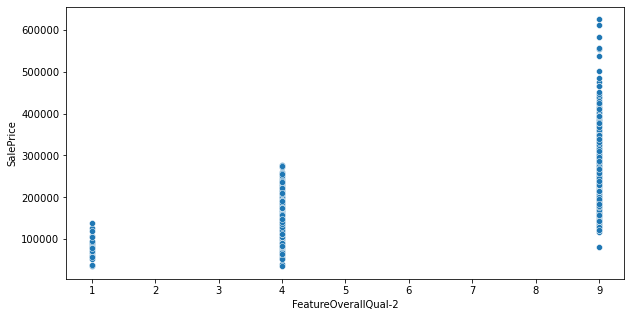

                                                    Variable :  FeatureOverallQual-3
----------------------------------------------------------------------------------------------------------------


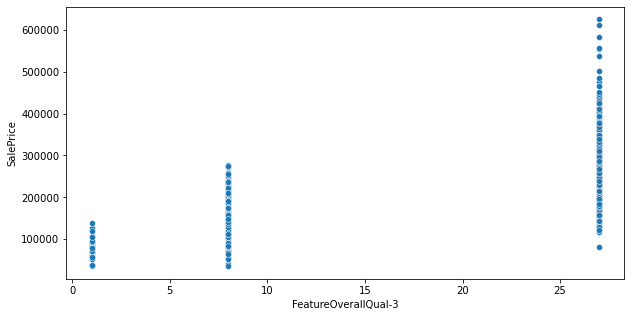

                                                    Variable :  FeatureOverallQual-Sq
----------------------------------------------------------------------------------------------------------------


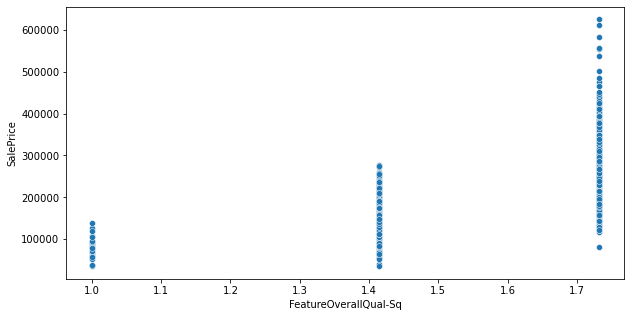

                                                    Variable :  KitchenQual-2
----------------------------------------------------------------------------------------------------------------


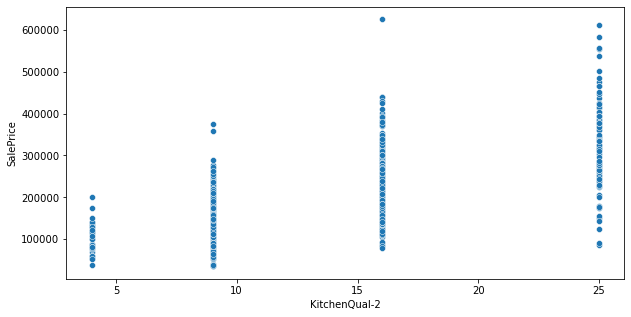

                                                    Variable :  KitchenQual-3
----------------------------------------------------------------------------------------------------------------


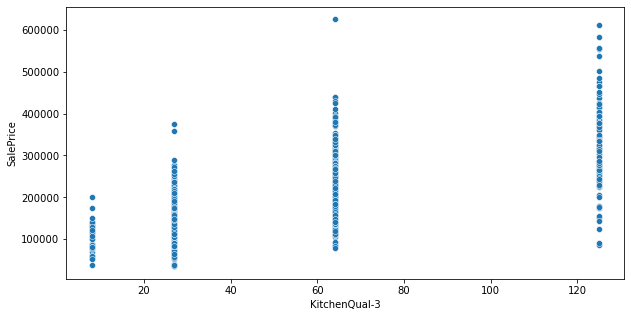

                                                    Variable :  KitchenQual-Sq
----------------------------------------------------------------------------------------------------------------


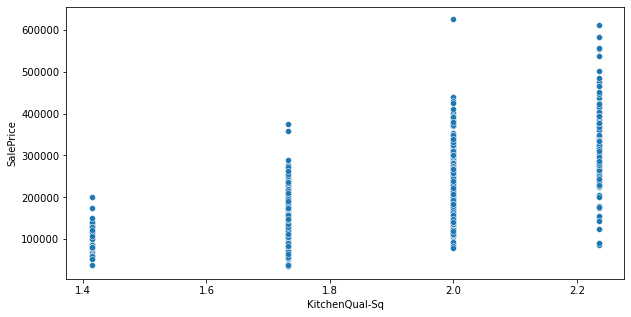

                                                    Variable :  TotalBath-2
----------------------------------------------------------------------------------------------------------------


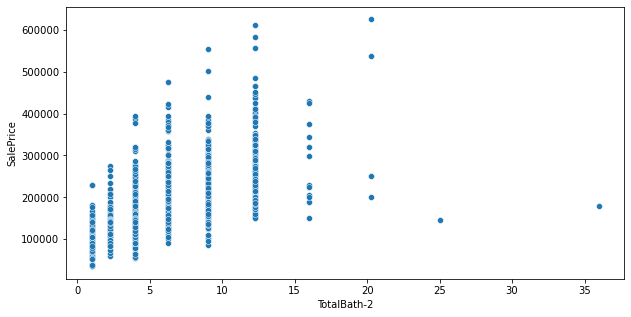

                                                    Variable :  TotalBath-3
----------------------------------------------------------------------------------------------------------------


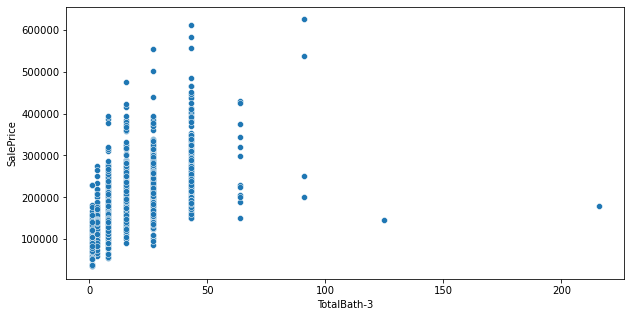

                                                    Variable :  TotalBath-Sq
----------------------------------------------------------------------------------------------------------------


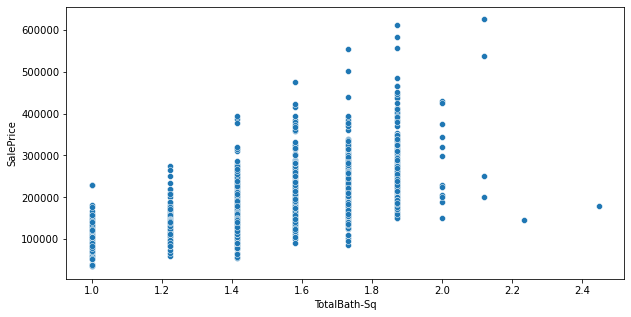

                                                    Variable :  GarageScore-2
----------------------------------------------------------------------------------------------------------------


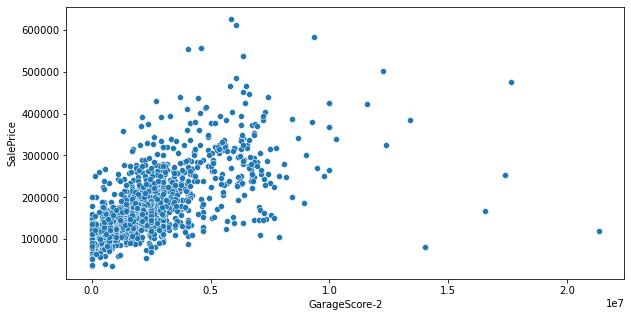

                                                    Variable :  GarageScore-3
----------------------------------------------------------------------------------------------------------------


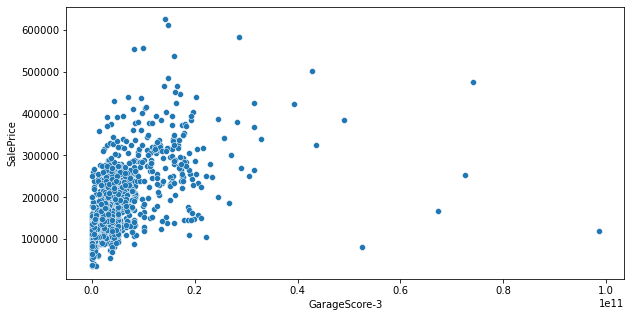

                                                    Variable :  GarageScore-Sq
----------------------------------------------------------------------------------------------------------------


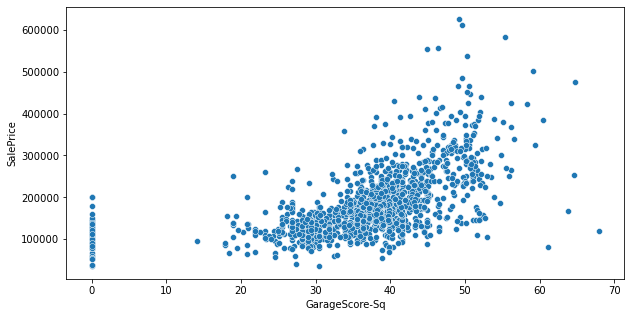

In [27]:
for i in df_numeric.columns:
    print("                                                    Variable : ",i)
    print("----------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    sns.scatterplot(df[i], df["SalePrice"])
    plt.show()
    print("================================================================================================================")

### Observations - Correlation between variables
#### numeric Variables - SalesPrice
- Strong and Moderate correlation can be observed between SalePrice and 
    - LotFrontage, LotArea, OverallQual, YearBuilt, MasVnrArea, TotalBsmtSF, HeatingQC
    - 1stFlrSF, 2ndFlrSF, GrLivArea, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF
    - EnclosedPorch, GarageScore, AllSF, AllFlrsSF, FeatureGarageScore
    - and many more
- Let's see what model will pick

### Check - Presence of Outliers

                                                    Variable :  LotFrontage
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean   std   min   25%   50%   75%    max
LotFrontage  1456.0  70.0  21.0  21.0  60.0  69.0  79.0  313.0
----------------------------------------------------------------------------------------------------------------


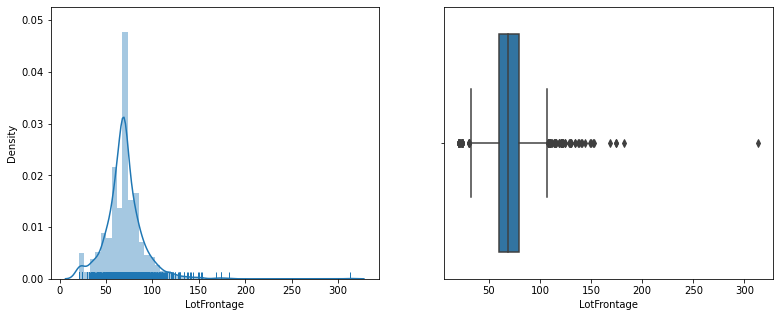

                                                    Variable :  LotArea
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
          count     mean     std     min     25%     50%      75%       max
LotArea  1456.0  10449.0  9861.0  1300.0  7539.0  9468.0  11588.0  215245.0
----------------------------------------------------------------------------------------------------------------


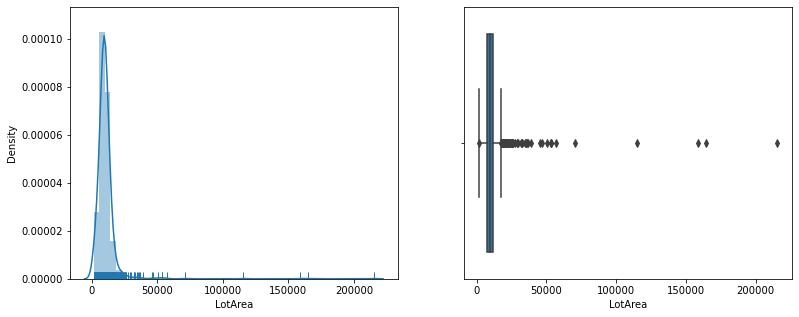

                                                    Variable :  Street
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
         count  mean  std  min  25%  50%  75%  max
Street  1456.0   2.0  0.0  1.0  2.0  2.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


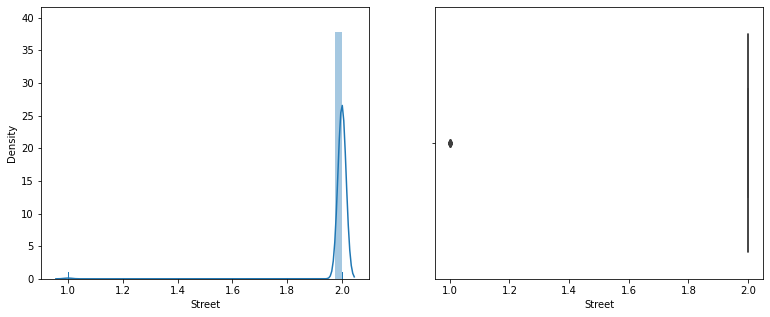

                                                    Variable :  Alley
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
        count  mean  std  min  25%  50%  75%  max
Alley  1456.0   0.0  0.0  0.0  0.0  0.0  0.0  2.0
----------------------------------------------------------------------------------------------------------------


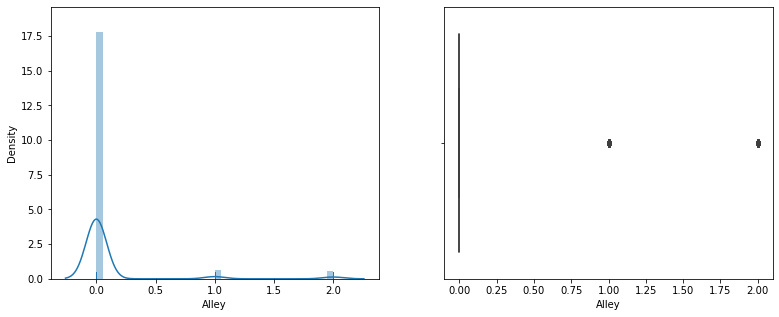

                                                    Variable :  LotShape
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean  std  min  25%  50%  75%  max
LotShape  1456.0   4.0  1.0  1.0  3.0  4.0  4.0  4.0
----------------------------------------------------------------------------------------------------------------


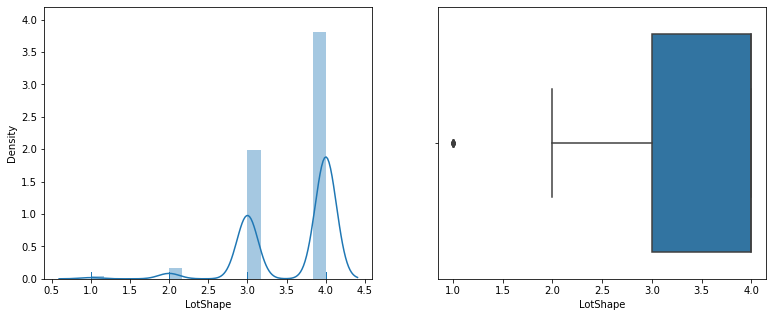

                                                    Variable :  Utilities
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
Utilities  1456.0   4.0  0.0  2.0  4.0  4.0  4.0  4.0
----------------------------------------------------------------------------------------------------------------


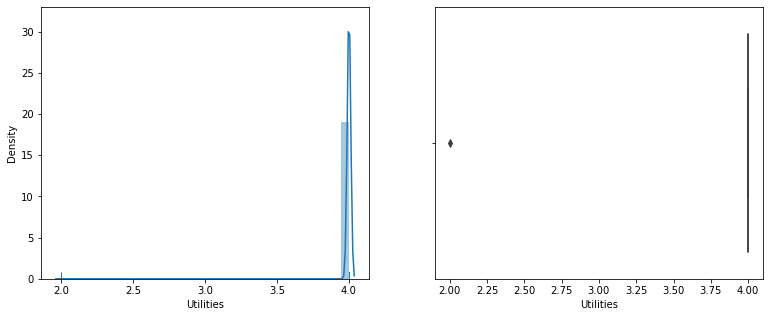

                                                    Variable :  LandSlope
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
LandSlope  1456.0   3.0  0.0  1.0  3.0  3.0  3.0  3.0
----------------------------------------------------------------------------------------------------------------


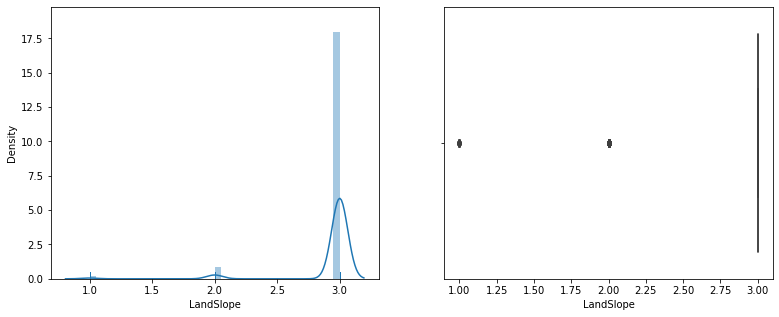

                                                    Variable :  OverallQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%  75%   max
OverallQual  1456.0   6.0  1.0  1.0  5.0  6.0  7.0  10.0
----------------------------------------------------------------------------------------------------------------


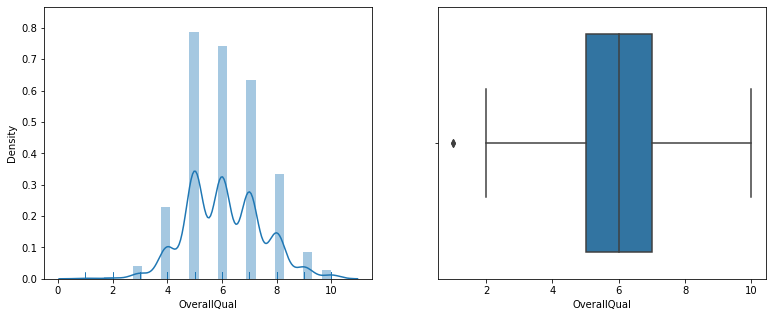

                                                    Variable :  OverallCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%  75%  max
OverallCond  1456.0   6.0  1.0  1.0  5.0  5.0  6.0  9.0
----------------------------------------------------------------------------------------------------------------


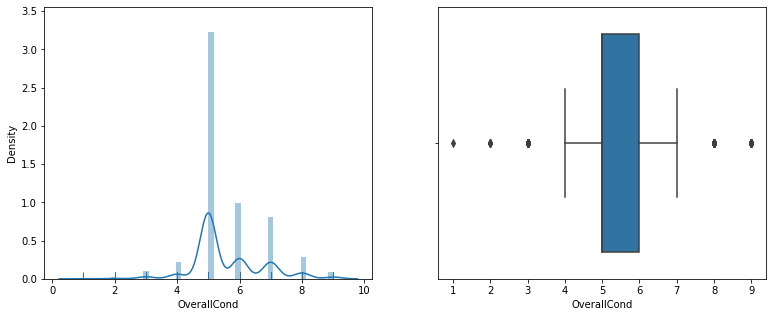

                                                    Variable :  YearBuilt
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count    mean   std     min     25%     50%     75%     max
YearBuilt  1456.0  1971.0  30.0  1872.0  1954.0  1972.0  2000.0  2010.0
----------------------------------------------------------------------------------------------------------------


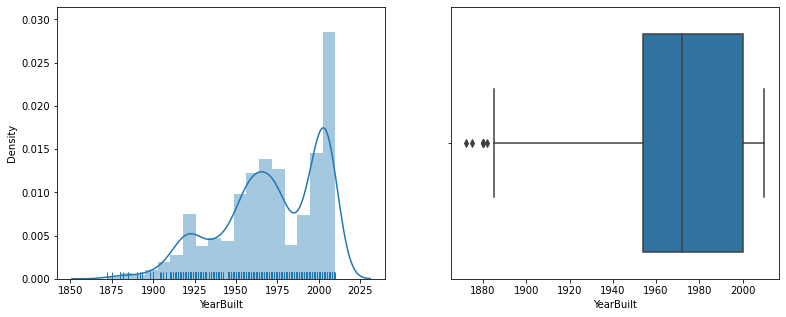

                                                    Variable :  YearRemodAdd
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count    mean   std     min     25%     50%     75%     max
YearRemodAdd  1456.0  1985.0  21.0  1950.0  1967.0  1994.0  2004.0  2010.0
----------------------------------------------------------------------------------------------------------------


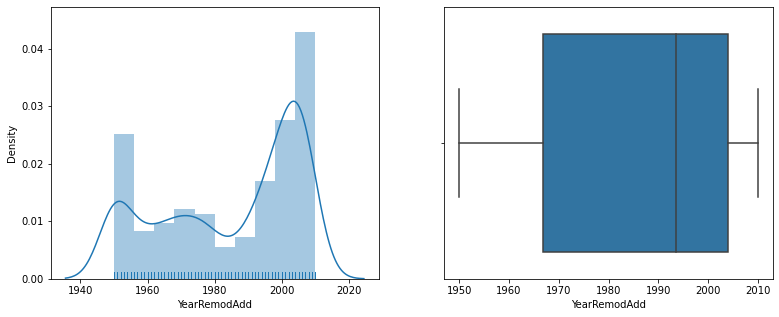

                                                    Variable :  MasVnrArea
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count   mean    std  min  25%  50%    75%     max
MasVnrArea  1456.0  102.0  177.0  0.0  0.0  0.0  163.0  1600.0
----------------------------------------------------------------------------------------------------------------


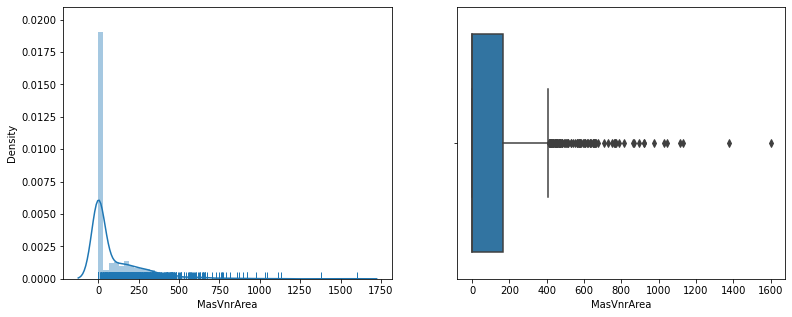

                                                    Variable :  ExterQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
ExterQual  1456.0   3.0  1.0  2.0  3.0  3.0  4.0  5.0
----------------------------------------------------------------------------------------------------------------


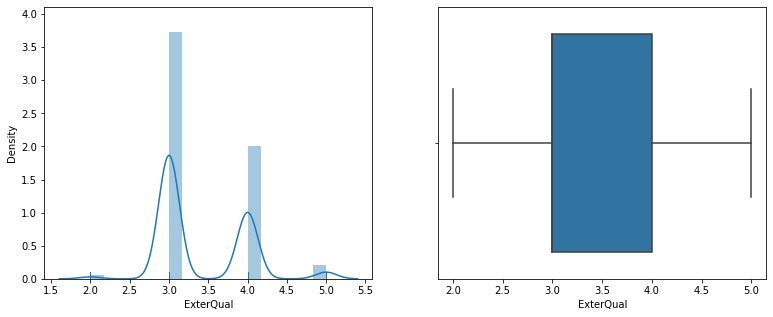

                                                    Variable :  ExterCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
ExterCond  1456.0   3.0  0.0  1.0  3.0  3.0  3.0  5.0
----------------------------------------------------------------------------------------------------------------


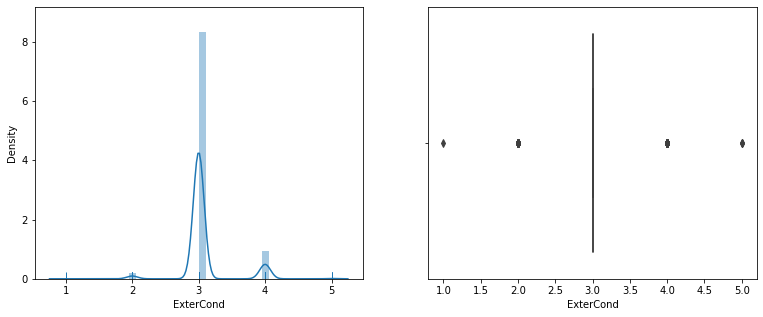

                                                    Variable :  BsmtQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean  std  min  25%  50%  75%  max
BsmtQual  1456.0   3.0  1.0  0.0  2.0  3.0  3.0  4.0
----------------------------------------------------------------------------------------------------------------


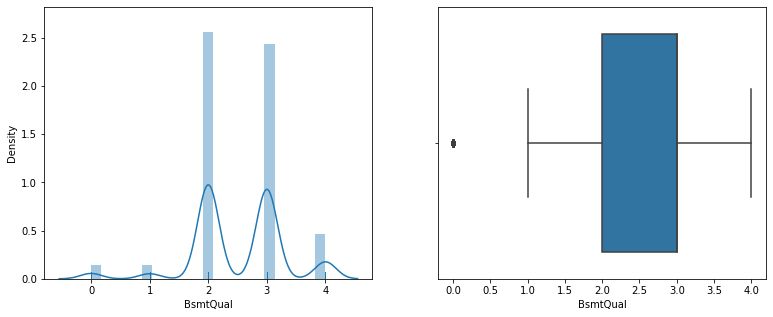

                                                    Variable :  BsmtCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean  std  min  25%  50%  75%  max
BsmtCond  1456.0   3.0  1.0  0.0  3.0  3.0  3.0  4.0
----------------------------------------------------------------------------------------------------------------


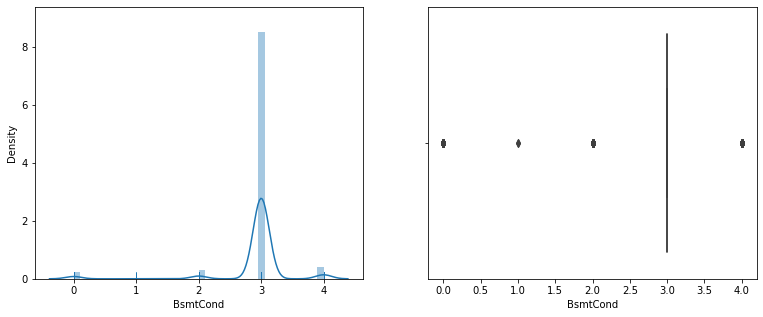

                                                    Variable :  BsmtExposure
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
BsmtExposure  1456.0   1.0  1.0  0.0  0.0  0.0  1.0  3.0
----------------------------------------------------------------------------------------------------------------


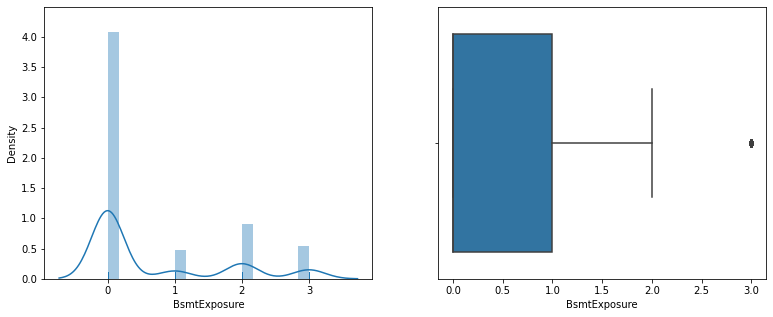

                                                    Variable :  BsmtFinType1
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
BsmtFinType1  1456.0   4.0  2.0  0.0  1.0  4.0  6.0  6.0
----------------------------------------------------------------------------------------------------------------


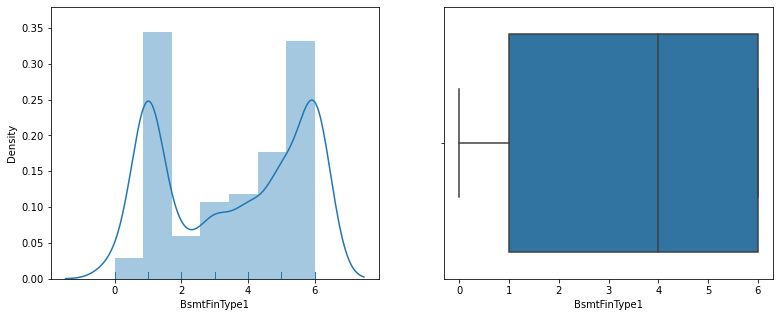

                                                    Variable :  BsmtFinSF1
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count   mean    std  min  25%    50%    75%     max
BsmtFinSF1  1456.0  437.0  430.0  0.0  0.0  381.0  706.0  2188.0
----------------------------------------------------------------------------------------------------------------


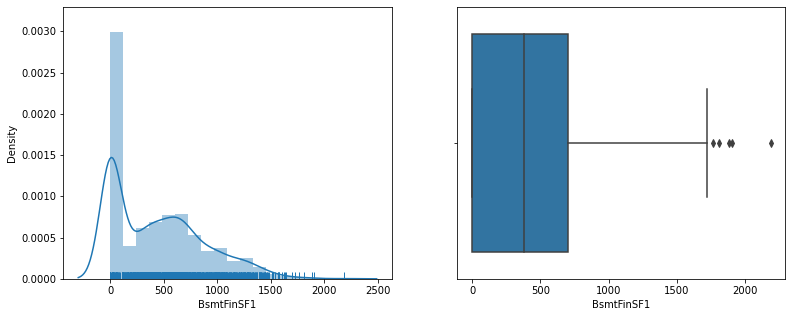

                                                    Variable :  BsmtFinType2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
BsmtFinType2  1456.0   1.0  1.0  0.0  1.0  1.0  1.0  6.0
----------------------------------------------------------------------------------------------------------------


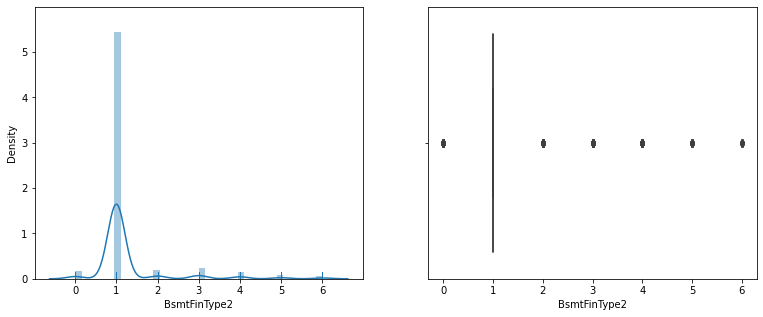

                                                    Variable :  BsmtFinSF2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean    std  min  25%  50%  75%     max
BsmtFinSF2  1456.0  47.0  162.0  0.0  0.0  0.0  0.0  1474.0
----------------------------------------------------------------------------------------------------------------


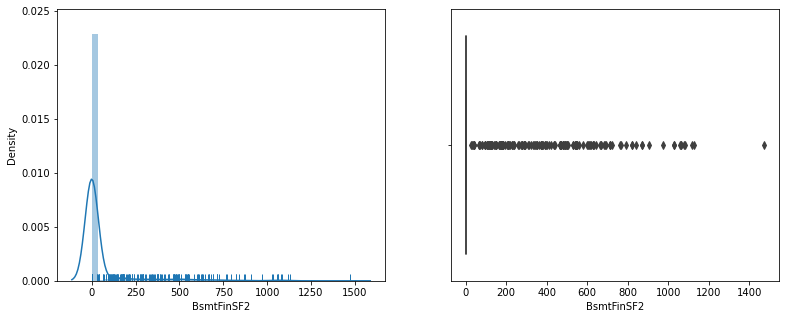

                                                    Variable :  BsmtUnfSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count   mean    std  min    25%    50%    75%     max
BsmtUnfSF  1456.0  567.0  442.0  0.0  222.0  478.0  808.0  2336.0
----------------------------------------------------------------------------------------------------------------


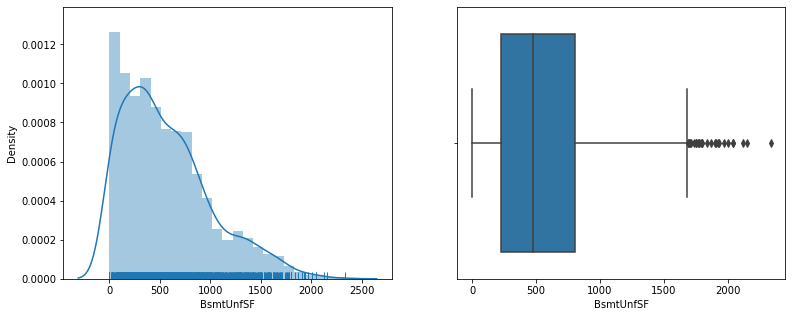

                                                    Variable :  TotalBsmtSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count    mean    std  min    25%    50%     75%     max
TotalBsmtSF  1456.0  1051.0  412.0  0.0  795.0  990.0  1294.0  3206.0
----------------------------------------------------------------------------------------------------------------


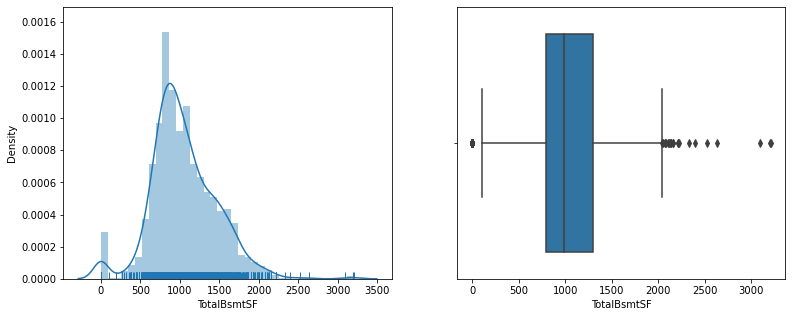

                                                    Variable :  HeatingQC
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
HeatingQC  1456.0   4.0  1.0  1.0  3.0  5.0  5.0  5.0
----------------------------------------------------------------------------------------------------------------


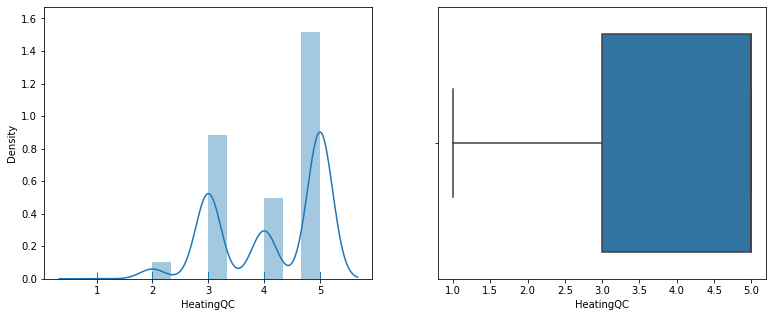

                                                    Variable :  1stFlrSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count    mean    std    min    25%     50%     75%     max
1stFlrSF  1456.0  1157.0  369.0  334.0  882.0  1086.0  1389.0  3228.0
----------------------------------------------------------------------------------------------------------------


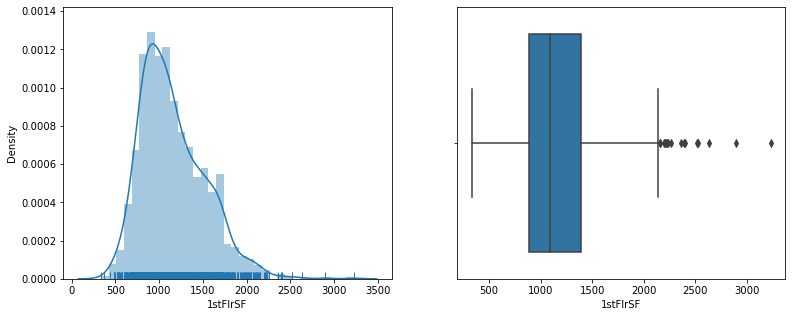

                                                    Variable :  2ndFlrSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count   mean    std  min  25%  50%    75%     max
2ndFlrSF  1456.0  344.0  432.0  0.0  0.0  0.0  728.0  1818.0
----------------------------------------------------------------------------------------------------------------


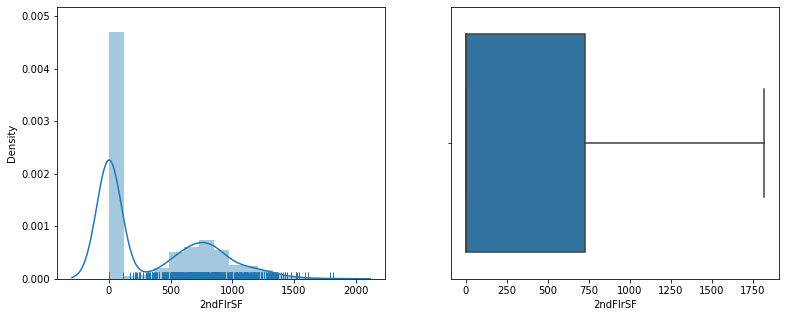

                                                    Variable :  LowQualFinSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean   std  min  25%  50%  75%    max
LowQualFinSF  1456.0   6.0  49.0  0.0  0.0  0.0  0.0  572.0
----------------------------------------------------------------------------------------------------------------


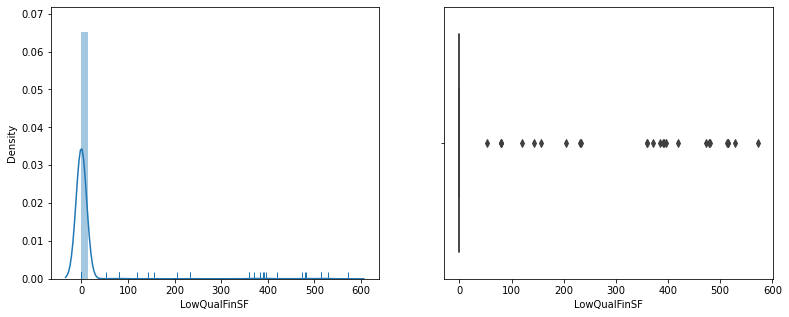

                                                    Variable :  GrLivArea
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count    mean    std    min     25%     50%     75%     max
GrLivArea  1456.0  1507.0  497.0  334.0  1128.0  1458.0  1775.0  3627.0
----------------------------------------------------------------------------------------------------------------


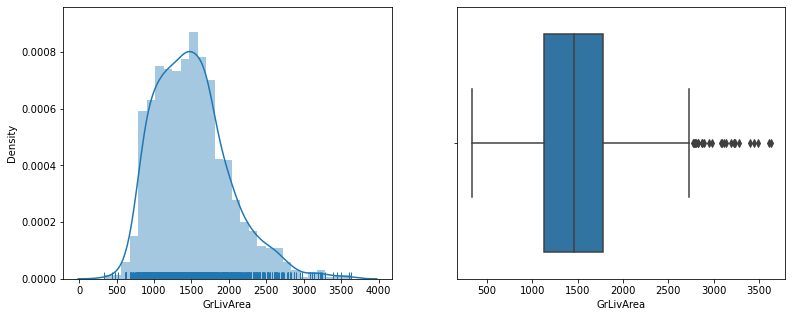

                                                    Variable :  BsmtFullBath
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
BsmtFullBath  1456.0   0.0  1.0  0.0  0.0  0.0  1.0  3.0
----------------------------------------------------------------------------------------------------------------


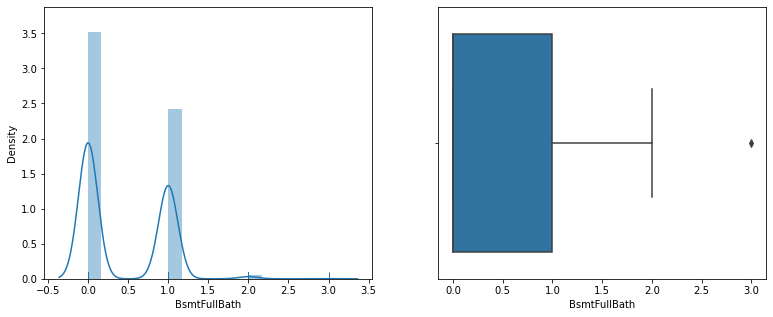

                                                    Variable :  BsmtHalfBath
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
BsmtHalfBath  1456.0   0.0  0.0  0.0  0.0  0.0  0.0  2.0
----------------------------------------------------------------------------------------------------------------


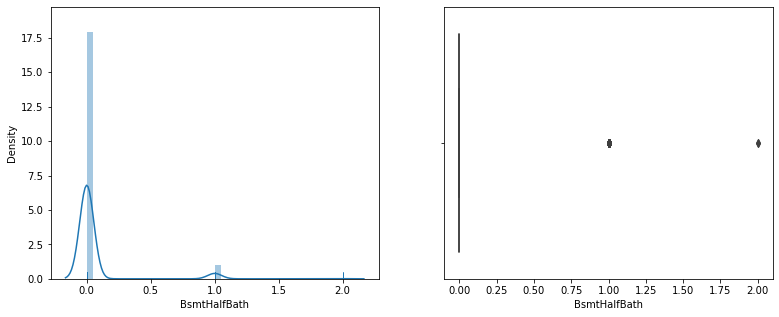

                                                    Variable :  FullBath
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean  std  min  25%  50%  75%  max
FullBath  1456.0   2.0  1.0  0.0  1.0  2.0  2.0  3.0
----------------------------------------------------------------------------------------------------------------


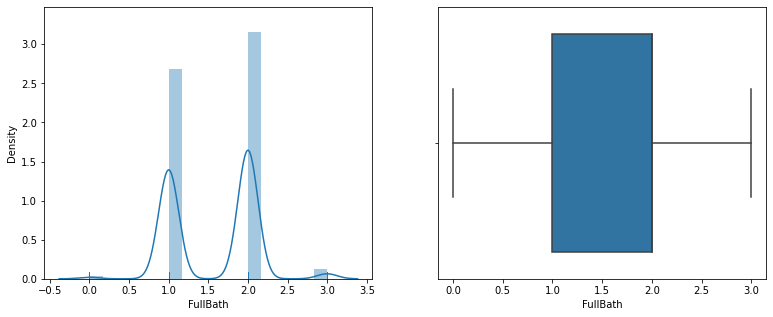

                                                    Variable :  HalfBath
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean  std  min  25%  50%  75%  max
HalfBath  1456.0   0.0  1.0  0.0  0.0  0.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


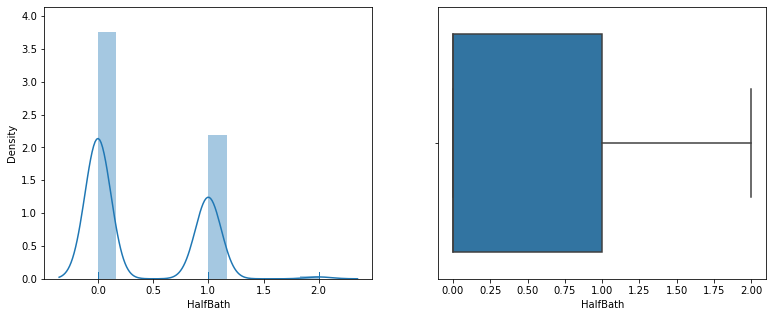

                                                    Variable :  BedroomAbvGr
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
BedroomAbvGr  1456.0   3.0  1.0  0.0  2.0  3.0  3.0  8.0
----------------------------------------------------------------------------------------------------------------


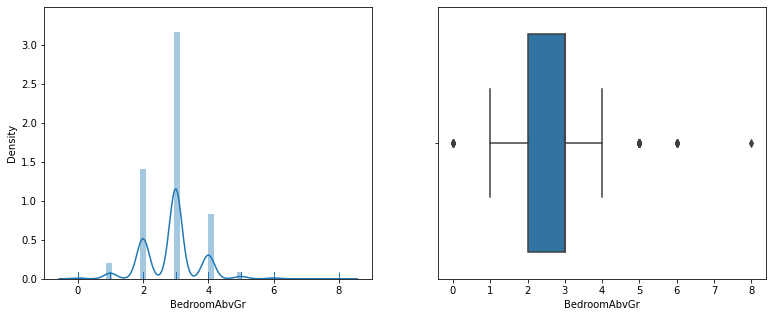

                                                    Variable :  KitchenAbvGr
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
KitchenAbvGr  1456.0   1.0  0.0  0.0  1.0  1.0  1.0  3.0
----------------------------------------------------------------------------------------------------------------


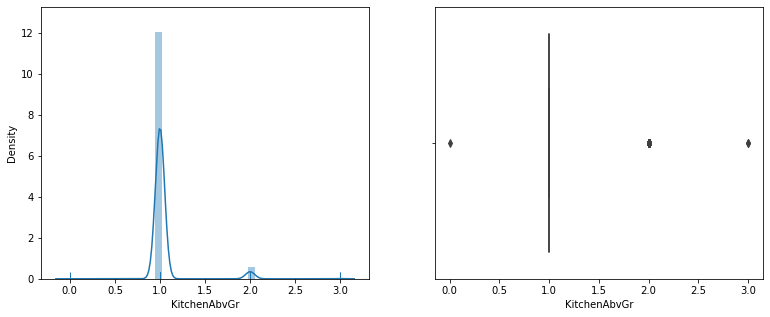

                                                    Variable :  KitchenQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%  75%  max
KitchenQual  1456.0   4.0  1.0  2.0  3.0  3.0  4.0  5.0
----------------------------------------------------------------------------------------------------------------


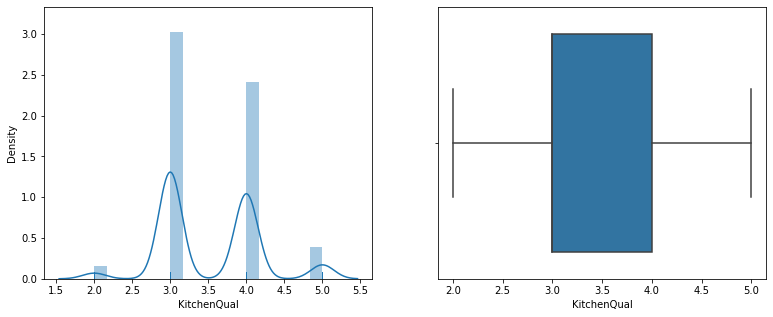

                                                    Variable :  TotRmsAbvGrd
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%   max
TotRmsAbvGrd  1456.0   7.0  2.0  2.0  5.0  6.0  7.0  14.0
----------------------------------------------------------------------------------------------------------------


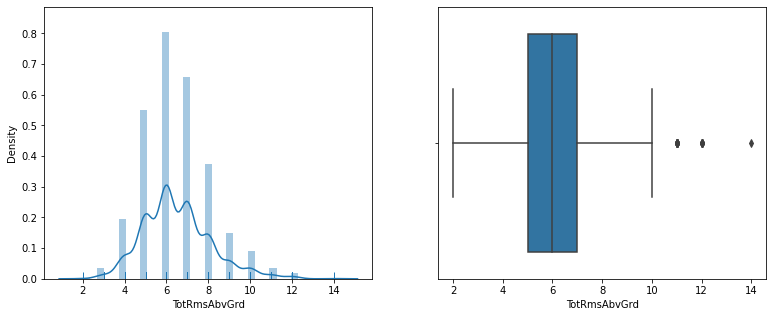

                                                    Variable :  Functional
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  max
Functional  1456.0   8.0  1.0  2.0  8.0  8.0  8.0  8.0
----------------------------------------------------------------------------------------------------------------


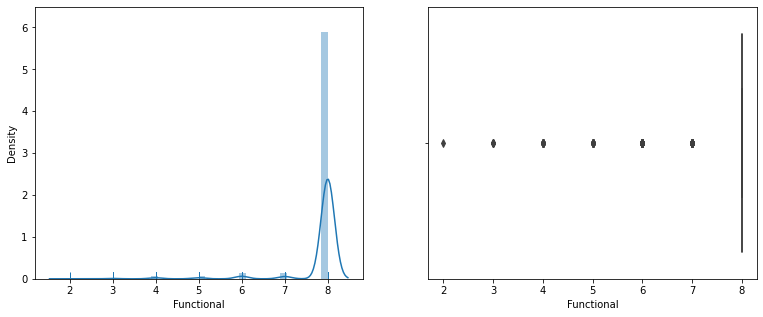

                                                    Variable :  Fireplaces
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  max
Fireplaces  1456.0   1.0  1.0  0.0  0.0  1.0  1.0  3.0
----------------------------------------------------------------------------------------------------------------


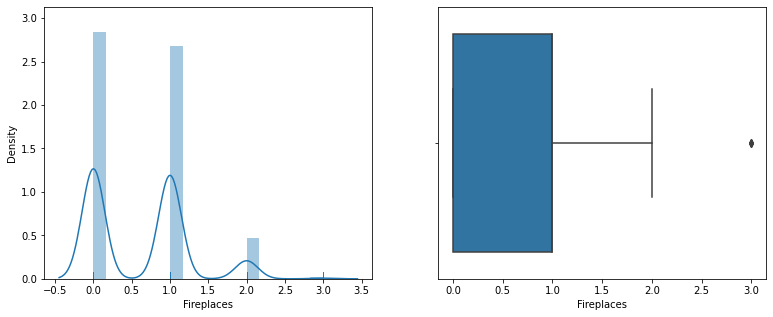

                                                    Variable :  FireplaceQu
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%  75%  max
FireplaceQu  1456.0   2.0  2.0  0.0  0.0  2.0  4.0  5.0
----------------------------------------------------------------------------------------------------------------


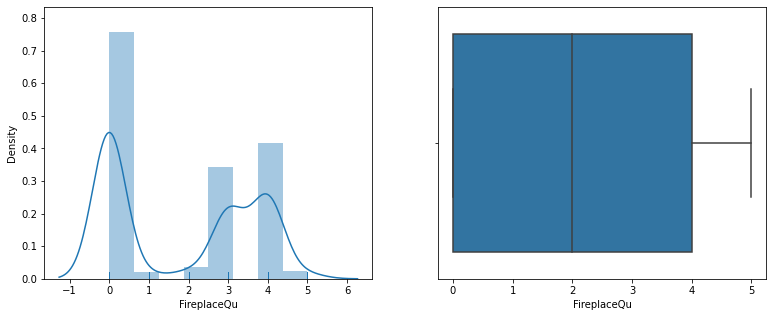

                                                    Variable :  GarageYrBlt
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count    mean   std     min     25%     50%     75%     max
GarageYrBlt  1456.0  1978.0  25.0  1900.0  1961.0  1979.0  2002.0  2010.0
----------------------------------------------------------------------------------------------------------------


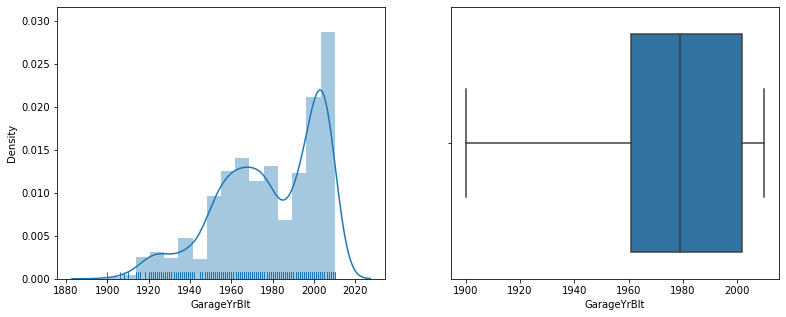

                                                    Variable :  GarageCars
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  max
GarageCars  1456.0   2.0  1.0  0.0  1.0  2.0  2.0  4.0
----------------------------------------------------------------------------------------------------------------


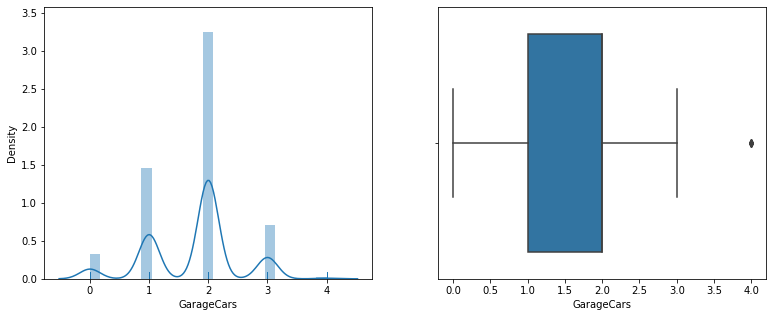

                                                    Variable :  GarageArea
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count   mean    std  min    25%    50%    75%     max
GarageArea  1456.0  472.0  212.0  0.0  330.0  478.0  576.0  1390.0
----------------------------------------------------------------------------------------------------------------


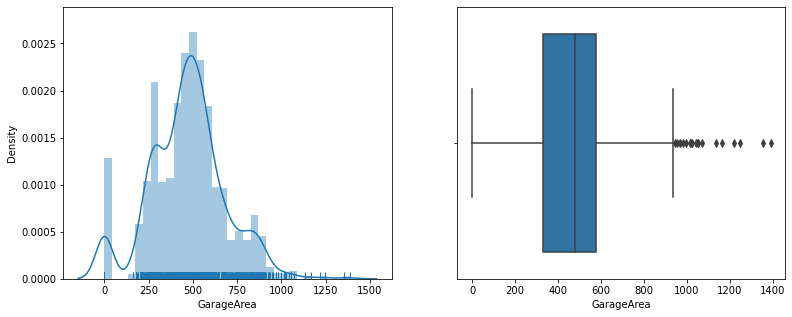

                                                    Variable :  GarageQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  max
GarageQual  1456.0   3.0  1.0  0.0  3.0  3.0  3.0  5.0
----------------------------------------------------------------------------------------------------------------


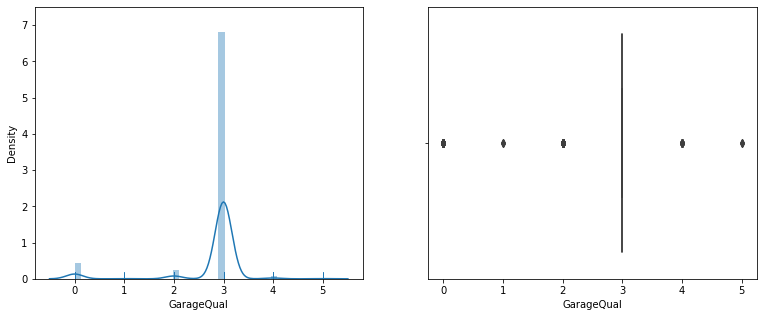

                                                    Variable :  GarageCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  max
GarageCond  1456.0   3.0  1.0  0.0  3.0  3.0  3.0  5.0
----------------------------------------------------------------------------------------------------------------


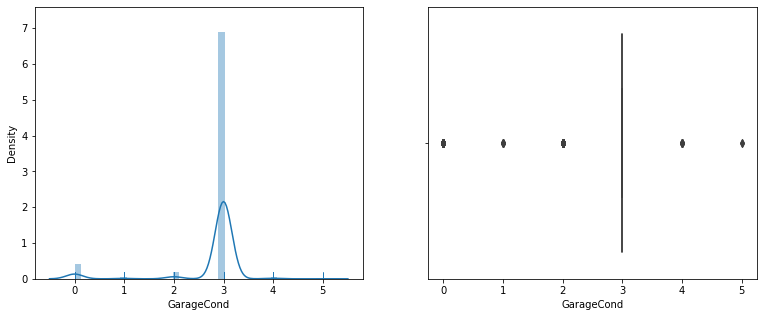

                                                    Variable :  PavedDrive
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%  75%  max
PavedDrive  1456.0   2.0  0.0  0.0  2.0  2.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


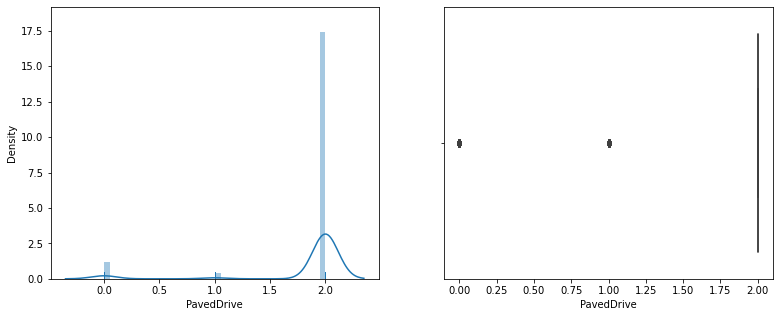

                                                    Variable :  WoodDeckSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean    std  min  25%  50%    75%    max
WoodDeckSF  1456.0  94.0  125.0  0.0  0.0  0.0  168.0  857.0
----------------------------------------------------------------------------------------------------------------


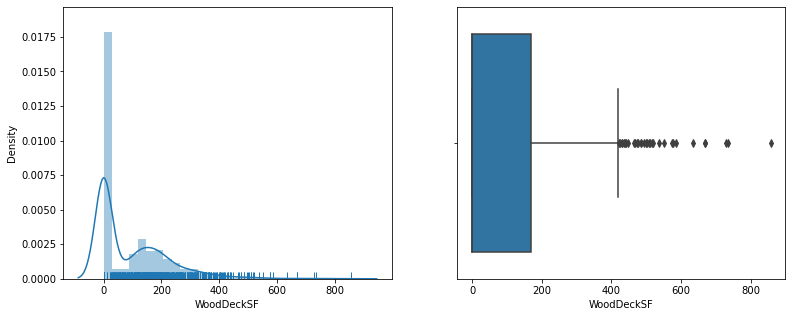

                                                    Variable :  OpenPorchSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean   std  min  25%   50%   75%    max
OpenPorchSF  1456.0  46.0  65.0  0.0  0.0  24.0  68.0  547.0
----------------------------------------------------------------------------------------------------------------


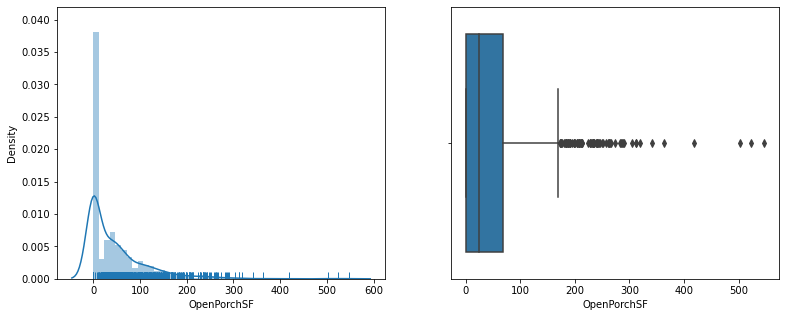

                                                    Variable :  EnclosedPorch
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count  mean   std  min  25%  50%  75%    max
EnclosedPorch  1456.0  22.0  61.0  0.0  0.0  0.0  0.0  552.0
----------------------------------------------------------------------------------------------------------------


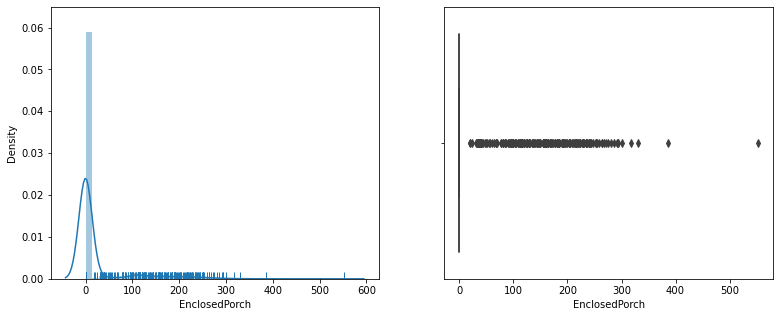

                                                    Variable :  3SsnPorch
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean   std  min  25%  50%  75%    max
3SsnPorch  1456.0   3.0  29.0  0.0  0.0  0.0  0.0  508.0
----------------------------------------------------------------------------------------------------------------


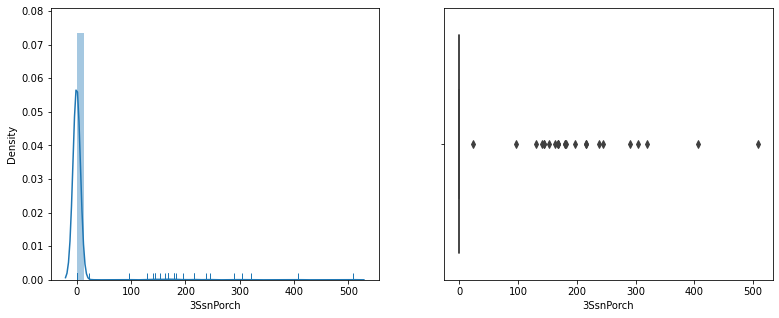

                                                    Variable :  ScreenPorch
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean   std  min  25%  50%  75%    max
ScreenPorch  1456.0  15.0  56.0  0.0  0.0  0.0  0.0  480.0
----------------------------------------------------------------------------------------------------------------


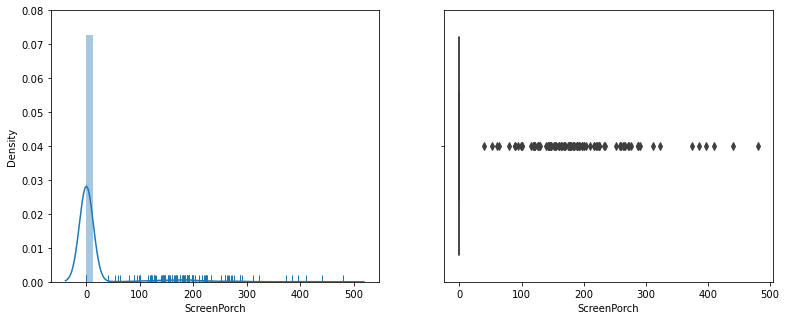

                                                    Variable :  PoolArea
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean   std  min  25%  50%  75%    max
PoolArea  1456.0   2.0  35.0  0.0  0.0  0.0  0.0  738.0
----------------------------------------------------------------------------------------------------------------


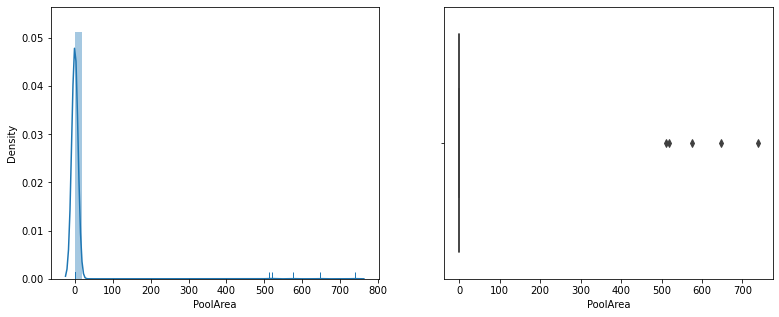

                                                    Variable :  PoolQC
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
         count  mean  std  min  25%  50%  75%  max
PoolQC  1456.0   0.0  0.0  0.0  0.0  0.0  0.0  4.0
----------------------------------------------------------------------------------------------------------------


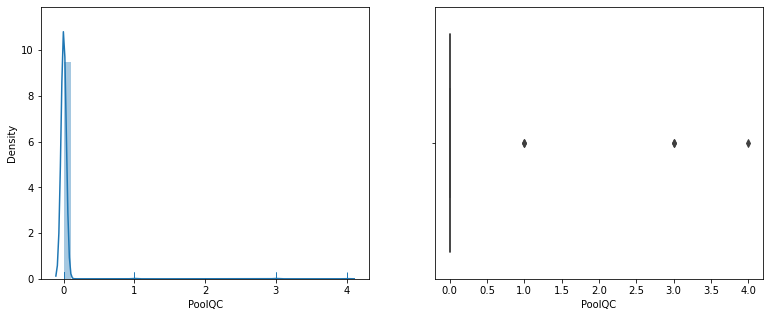

                                                    Variable :  MiscVal
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
          count  mean    std  min  25%  50%  75%      max
MiscVal  1456.0  44.0  497.0  0.0  0.0  0.0  0.0  15500.0
----------------------------------------------------------------------------------------------------------------


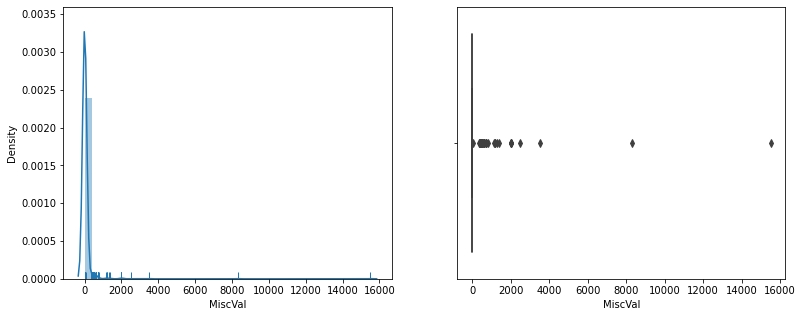

                                                    Variable :  YrSold
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
         count    mean  std     min     25%     50%     75%     max
YrSold  1456.0  2008.0  1.0  2006.0  2007.0  2008.0  2009.0  2010.0
----------------------------------------------------------------------------------------------------------------


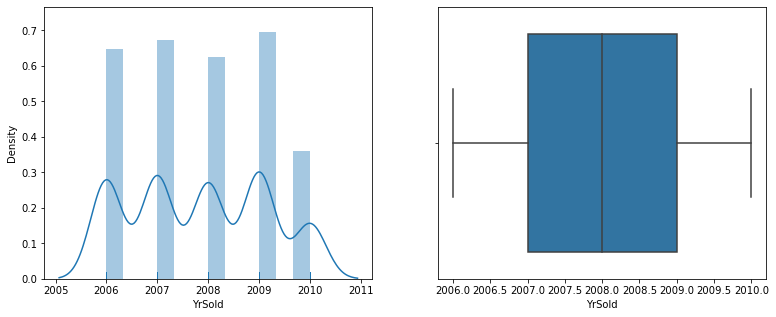

                                                    Variable :  SalePrice
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count      mean      std      min       25%       50%       75%  \
SalePrice  1456.0  180151.0  76697.0  34900.0  129900.0  163000.0  214000.0   

                max  
SalePrice  625000.0  
----------------------------------------------------------------------------------------------------------------


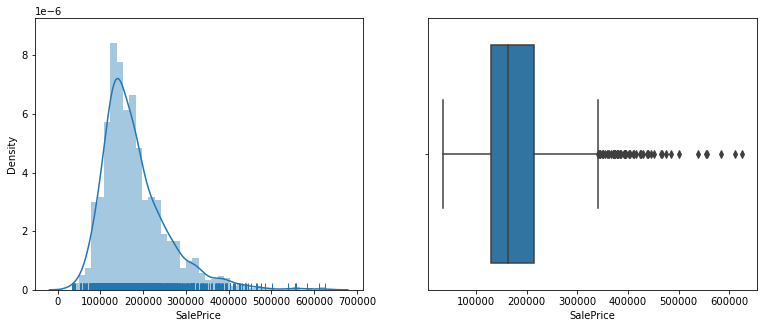

                                                    Variable :  FeatureGarageCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                    count  mean  std  min  25%  50%  75%  max
FeatureGarageCond  1456.0   1.0  0.0  0.0  1.0  1.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


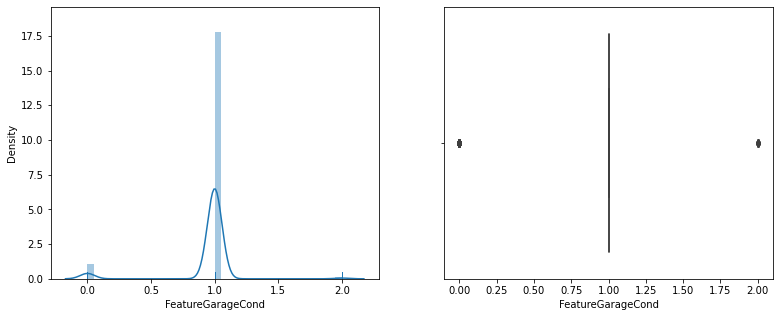

                                                    Variable :  FeatureGarageQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                    count  mean  std  min  25%  50%  75%  max
FeatureGarageQual  1456.0   1.0  0.0  0.0  1.0  1.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


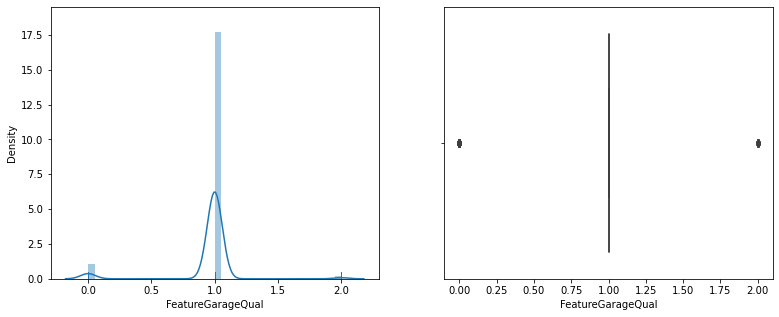

                                                    Variable :  FeatureFireplaceQu
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                     count  mean  std  min  25%  50%  75%  max
FeatureFireplaceQu  1456.0   1.0  1.0  0.0  0.0  1.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


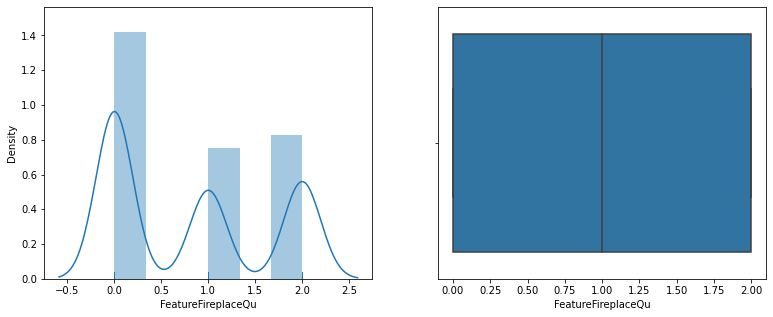

                                                    Variable :  FeatureOverallQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                     count  mean  std  min  25%  50%  75%  max
FeatureOverallQual  1456.0   2.0  1.0  1.0  2.0  2.0  3.0  3.0
----------------------------------------------------------------------------------------------------------------


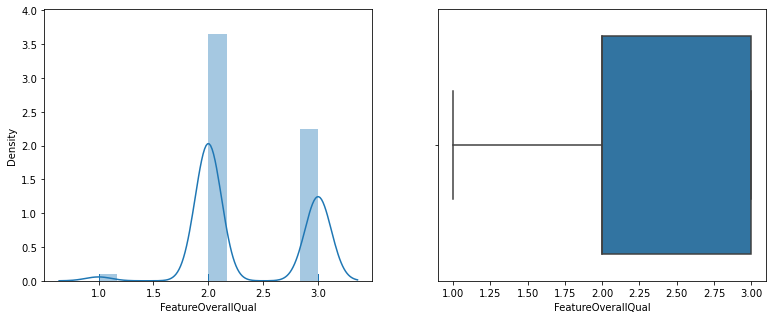

                                                    Variable :  FeatureOverallCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                     count  mean  std  min  25%  50%  75%  max
FeatureOverallCond  1456.0   2.0  0.0  1.0  2.0  2.0  2.0  3.0
----------------------------------------------------------------------------------------------------------------


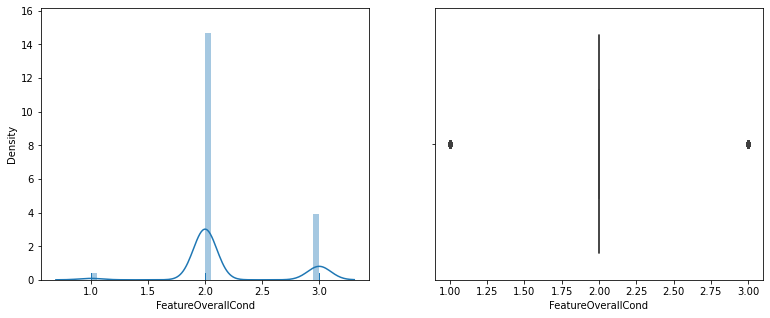

                                                    Variable :  FeaturePoolQC
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count  mean  std  min  25%  50%  75%  max
FeaturePoolQC  1456.0   0.0  0.0  0.0  0.0  0.0  0.0  2.0
----------------------------------------------------------------------------------------------------------------


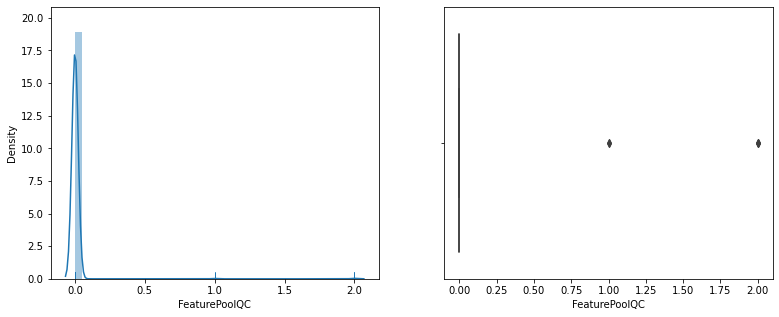

                                                    Variable :  FeatureFunctional
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                    count  mean  std  min  25%  50%  75%  max
FeatureFunctional  1456.0   4.0  0.0  1.0  4.0  4.0  4.0  4.0
----------------------------------------------------------------------------------------------------------------


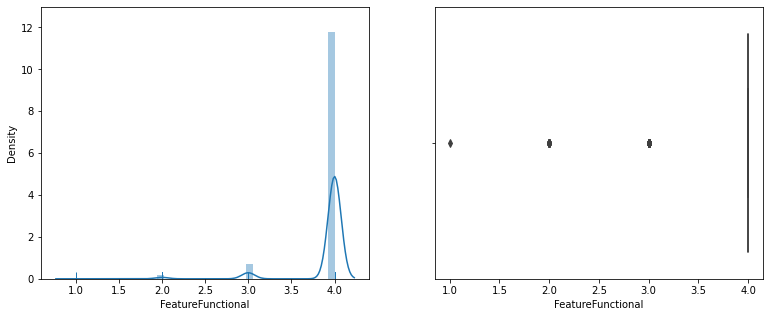

                                                    Variable :  FeatureKitchenQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                     count  mean  std  min  25%  50%  75%  max
FeatureKitchenQual  1456.0   1.0  0.0  1.0  1.0  1.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


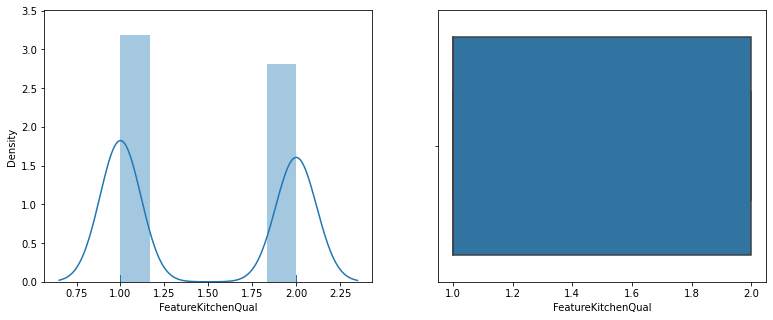

                                                    Variable :  FeatureHeatingQC
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                   count  mean  std  min  25%  50%  75%  max
FeatureHeatingQC  1456.0   2.0  0.0  1.0  1.0  2.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


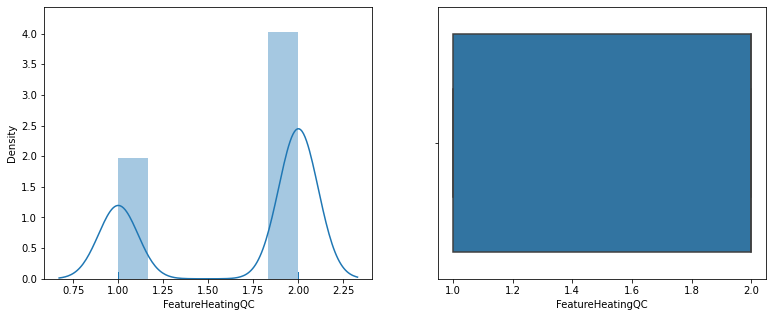

                                                    Variable :  FeatureBsmtFinType1
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                      count  mean  std  min  25%  50%  75%  max
FeatureBsmtFinType1  1456.0   2.0  1.0  0.0  1.0  2.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


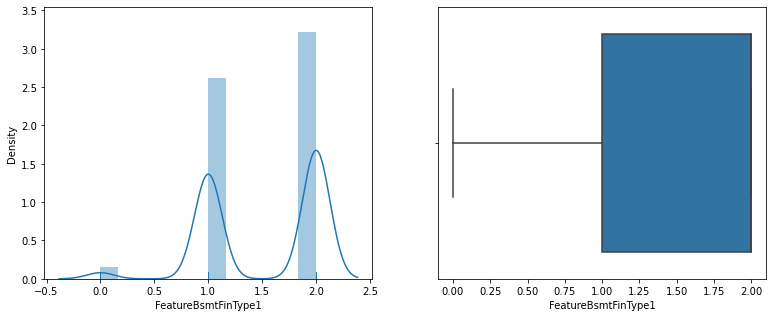

                                                    Variable :  FeatureExterCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                   count  mean  std  min  25%  50%  75%  max
FeatureExterCond  1456.0   1.0  0.0  1.0  1.0  1.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


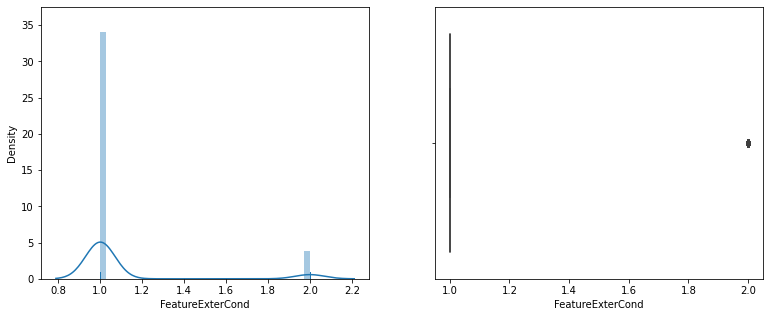

                                                    Variable :  FeatureExterQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                   count  mean  std  min  25%  50%  75%  max
FeatureExterQual  1456.0   1.0  0.0  1.0  1.0  1.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


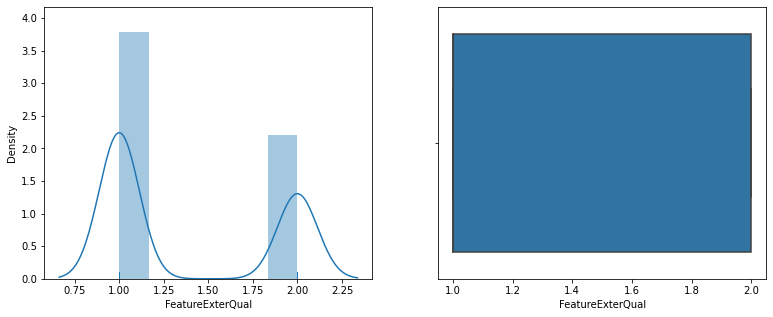

                                                    Variable :  FeatureBsmtFinType2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                      count  mean  std  min  25%  50%  75%  max
FeatureBsmtFinType2  1456.0   1.0  0.0  0.0  1.0  1.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


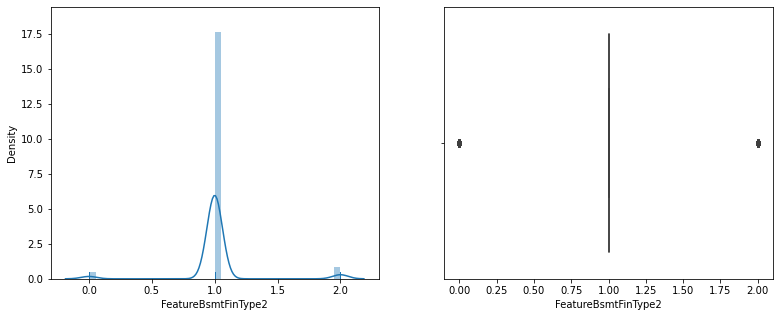

                                                    Variable :  FeatureBsmtCond
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                  count  mean  std  min  25%  50%  75%  max
FeatureBsmtCond  1456.0   1.0  0.0  0.0  1.0  1.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


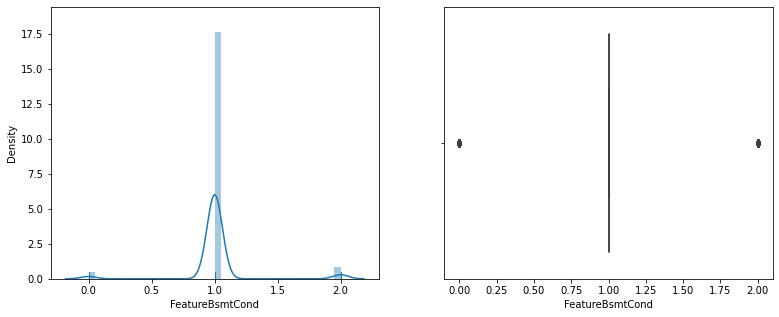

                                                    Variable :  FeatureBsmtQual
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                  count  mean  std  min  25%  50%  75%  max
FeatureBsmtQual  1456.0   1.0  0.0  0.0  1.0  1.0  1.0  2.0
----------------------------------------------------------------------------------------------------------------


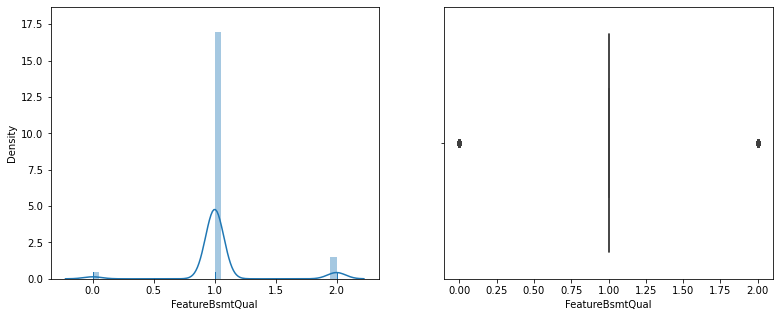

                                                    Variable :  ExterGrade
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean  std  min  25%  50%   75%   max
ExterGrade  1456.0  10.0  2.0  3.0  9.0  9.0  12.0  25.0
----------------------------------------------------------------------------------------------------------------


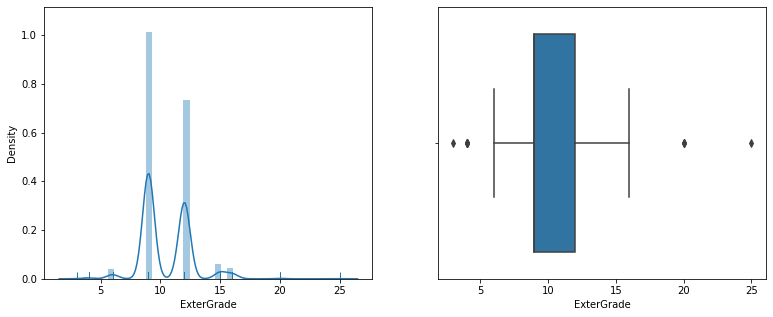

                                                    Variable :  KitchenScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
KitchenScore  1456.0   4.0  1.0  0.0  3.0  4.0  4.0  9.0
----------------------------------------------------------------------------------------------------------------


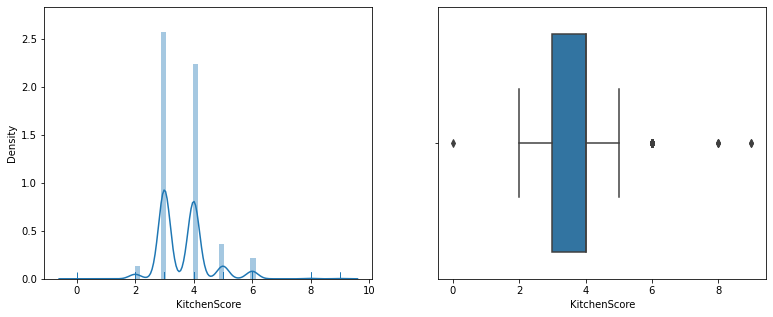

                                                    Variable :  FireplaceScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count  mean  std  min  25%  50%  75%   max
FireplaceScore  1456.0   2.0  2.0  0.0  0.0  2.0  4.0  15.0
----------------------------------------------------------------------------------------------------------------


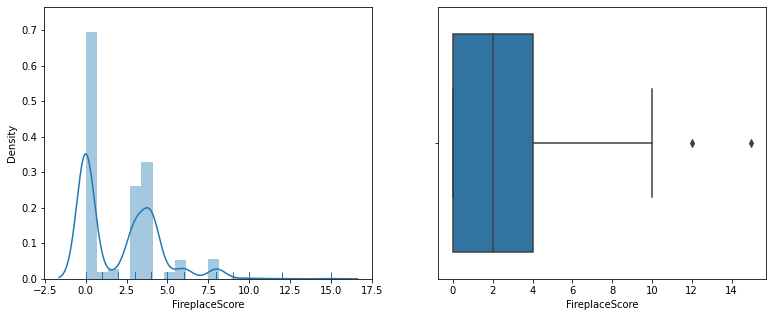

                                                    Variable :  OverallGrade
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min   25%   50%   75%   max
OverallGrade  1456.0  34.0  9.0  1.0  30.0  35.0  40.0  90.0
----------------------------------------------------------------------------------------------------------------


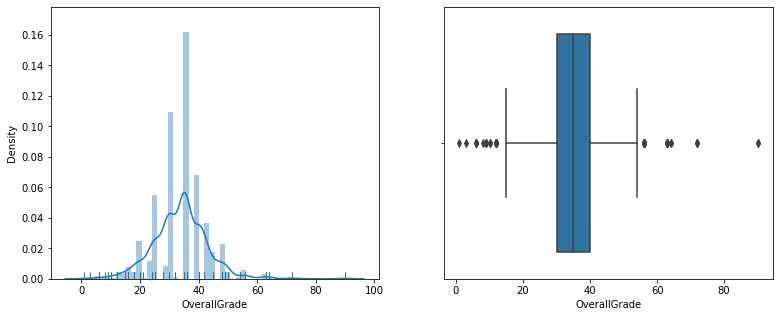

                                                    Variable :  GarageGrade
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%  75%   max
GarageGrade  1456.0   8.0  2.0  0.0  9.0  9.0  9.0  25.0
----------------------------------------------------------------------------------------------------------------


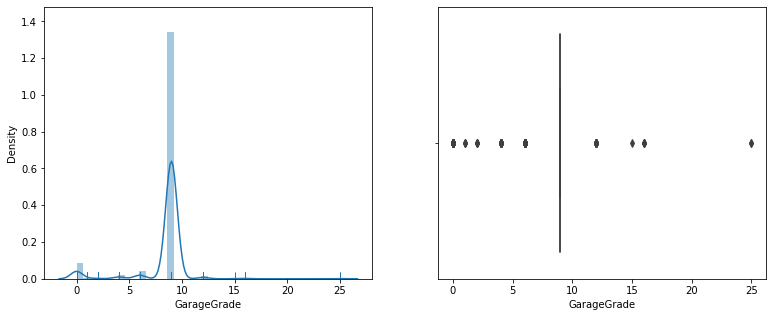

                                                    Variable :  GarageScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count    mean    std  min    25%     50%     75%     max
GarageScore  1456.0  1411.0  659.0  0.0  936.0  1434.0  1728.0  4620.0
----------------------------------------------------------------------------------------------------------------


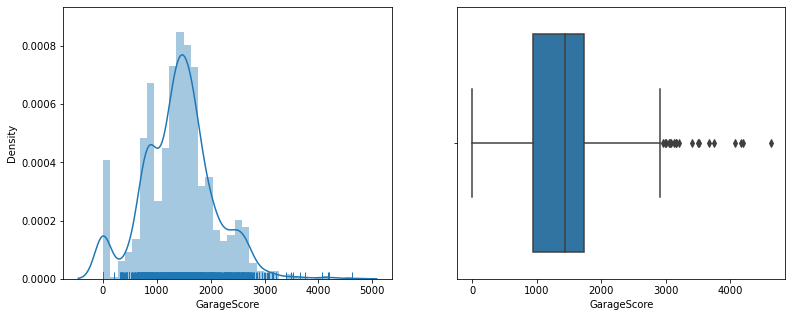

                                                    Variable :  AllSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
        count    mean    std    min     25%     50%     75%     max
AllSF  1456.0  2557.0  761.0  334.0  2014.0  2475.0  3004.0  6428.0
----------------------------------------------------------------------------------------------------------------


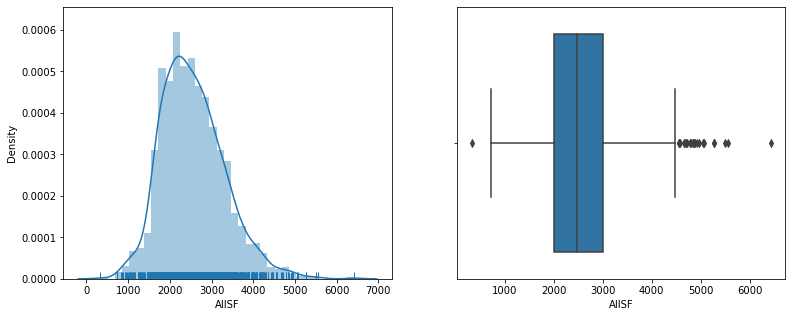

                                                    Variable :  AllFlrsSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count    mean    std    min     25%     50%     75%     max
AllFlrsSF  1456.0  1501.0  492.0  334.0  1123.0  1456.0  1772.0  3627.0
----------------------------------------------------------------------------------------------------------------


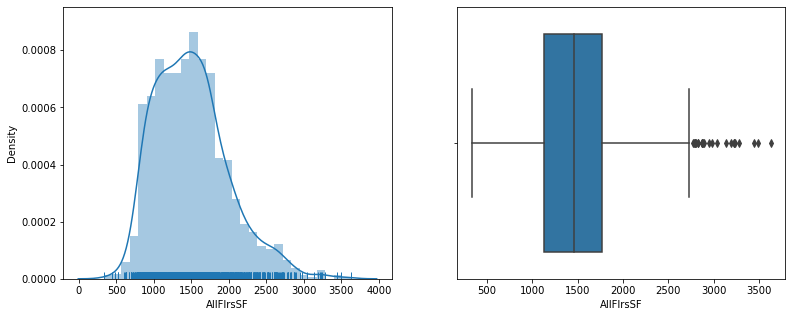

                                                    Variable :  AllPorchSF
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
             count  mean    std  min  25%   50%    75%     max
AllPorchSF  1456.0  87.0  105.0  0.0  0.0  48.0  136.0  1027.0
----------------------------------------------------------------------------------------------------------------


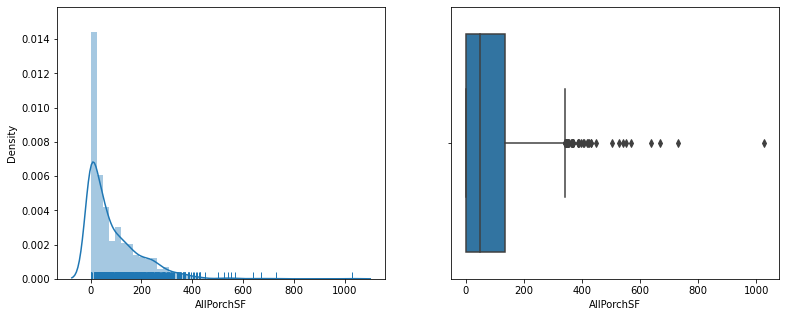

                                                    Variable :  HasMasVnr
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
HasMasVnr  1456.0   0.0  0.0  0.0  0.0  0.0  1.0  1.0
----------------------------------------------------------------------------------------------------------------


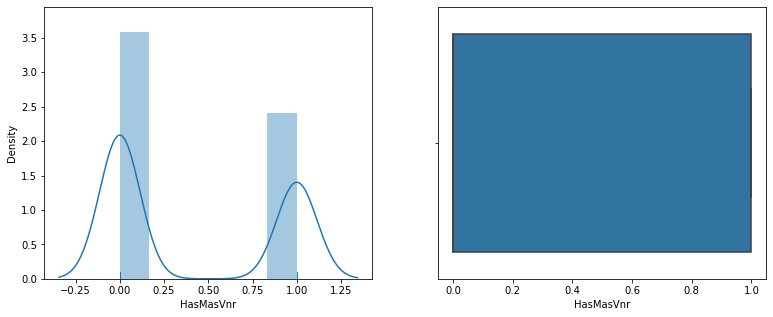

                                                    Variable :  BoughtOffPlan
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count  mean  std  min  25%  50%  75%  max
BoughtOffPlan  1456.0   0.0  0.0  0.0  0.0  0.0  0.0  1.0
----------------------------------------------------------------------------------------------------------------


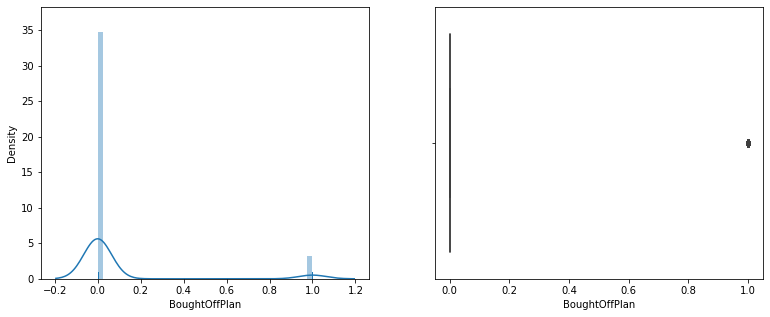

                                                    Variable :  PoolScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean   std  min  25%  50%  75%     max
PoolScore  1456.0   5.0  94.0  0.0  0.0  0.0  0.0  2214.0
----------------------------------------------------------------------------------------------------------------


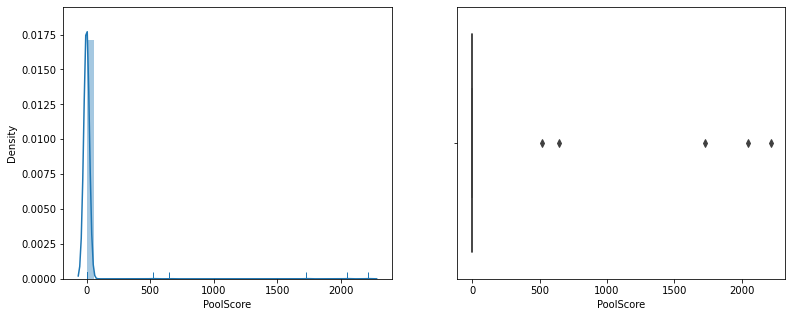

                                                    Variable :  FeatureOverallGrade
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                      count  mean  std  min  25%  50%  75%  max
FeatureOverallGrade  1456.0   5.0  1.0  1.0  4.0  6.0  6.0  9.0
----------------------------------------------------------------------------------------------------------------


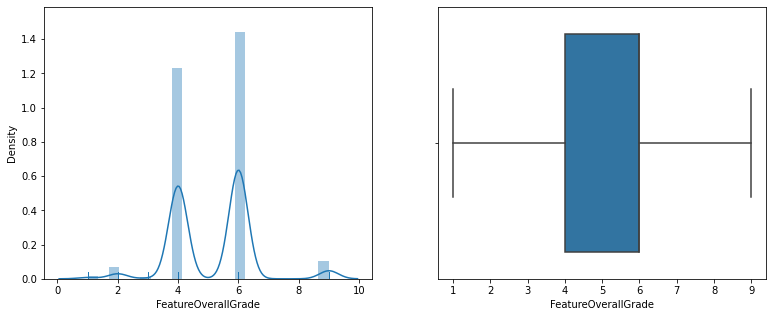

                                                    Variable :  FeatureKitchenScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                      count  mean  std  min  25%  50%  75%  max
FeatureKitchenScore  1456.0   2.0  1.0  0.0  1.0  2.0  2.0  4.0
----------------------------------------------------------------------------------------------------------------


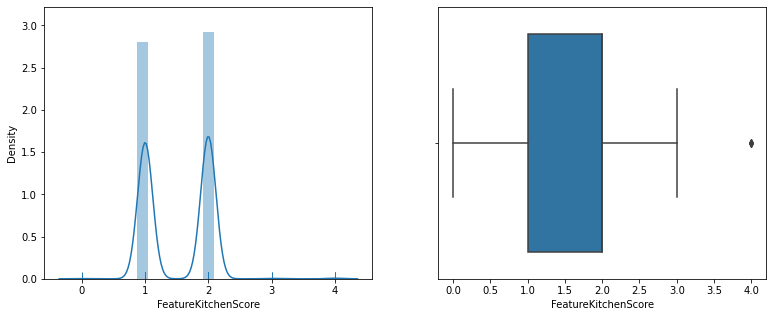

                                                    Variable :  TotalBath
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
            count  mean  std  min  25%  50%  75%  max
TotalBath  1456.0   2.0  1.0  1.0  2.0  2.0  2.0  6.0
----------------------------------------------------------------------------------------------------------------


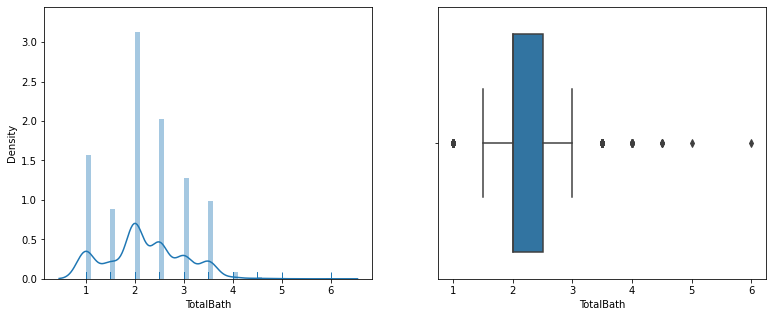

                                                    Variable :  FeatureExterGrade
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                    count  mean  std  min  25%  50%  75%  max
FeatureExterGrade  1456.0   1.0  1.0  1.0  1.0  1.0  2.0  4.0
----------------------------------------------------------------------------------------------------------------


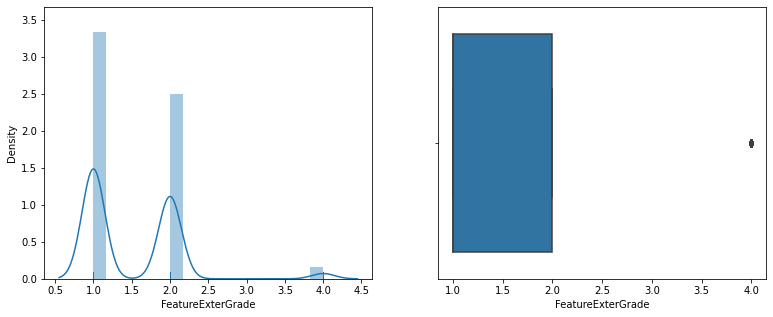

                                                    Variable :  FeaturePoolScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                   count  mean   std  min  25%  50%  75%     max
FeaturePoolScore  1456.0   3.0  60.0  0.0  0.0  0.0  0.0  1476.0
----------------------------------------------------------------------------------------------------------------


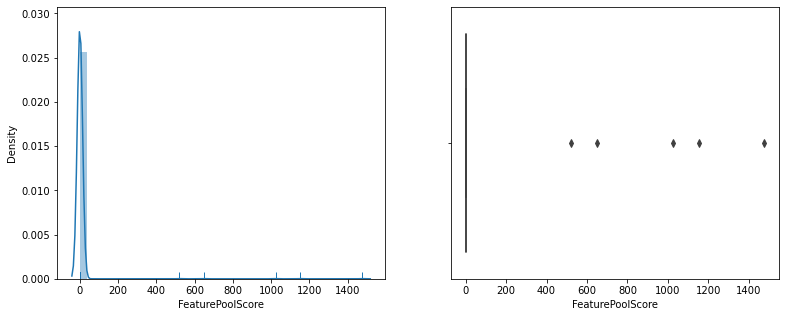

                                                    Variable :  FeatureGarageScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                     count   mean    std  min    25%    50%    75%     max
FeatureGarageScore  1456.0  478.0  227.0  0.0  336.0  480.0  576.0  1848.0
----------------------------------------------------------------------------------------------------------------


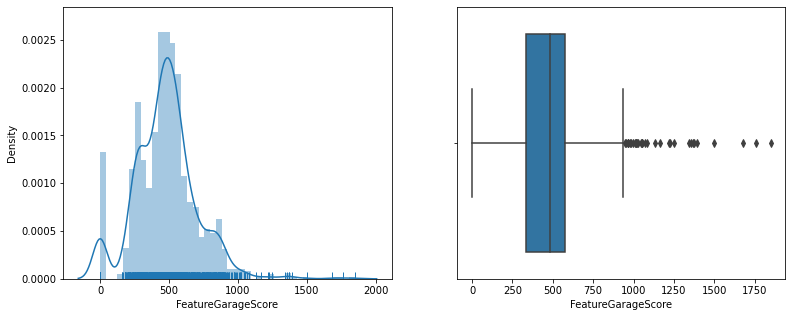

                                                    Variable :  FeatureFireplaceScore
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                        count  mean  std  min  25%  50%  75%  max
FeatureFireplaceScore  1456.0   1.0  1.0  0.0  0.0  1.0  2.0  6.0
----------------------------------------------------------------------------------------------------------------


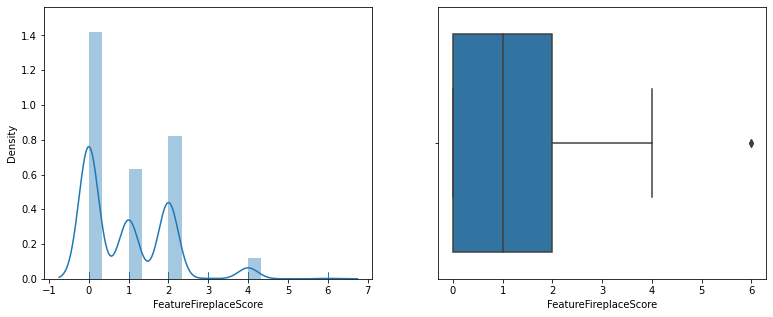

                                                    Variable :  OverallQual-s2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count  mean   std  min   25%   50%   75%    max
OverallQual-s2  1456.0  39.0  17.0  1.0  25.0  36.0  49.0  100.0
----------------------------------------------------------------------------------------------------------------


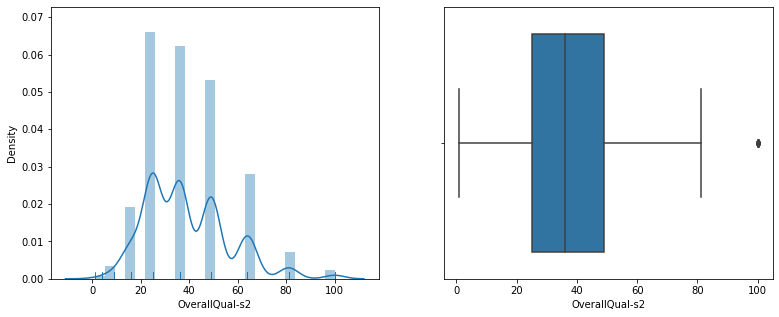

                                                    Variable :  OverallQual-s3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count   mean    std  min    25%    50%    75%     max
OverallQual-s3  1456.0  260.0  174.0  1.0  125.0  216.0  343.0  1000.0
----------------------------------------------------------------------------------------------------------------


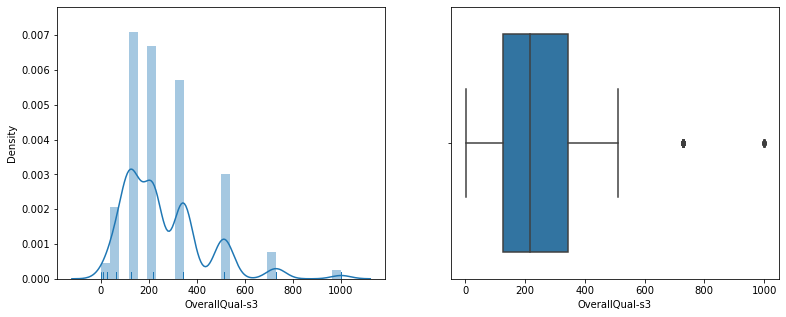

                                                    Variable :  OverallQual-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count  mean  std  min  25%  50%  75%  max
OverallQual-Sq  1456.0   2.0  0.0  1.0  2.0  2.0  3.0  3.0
----------------------------------------------------------------------------------------------------------------


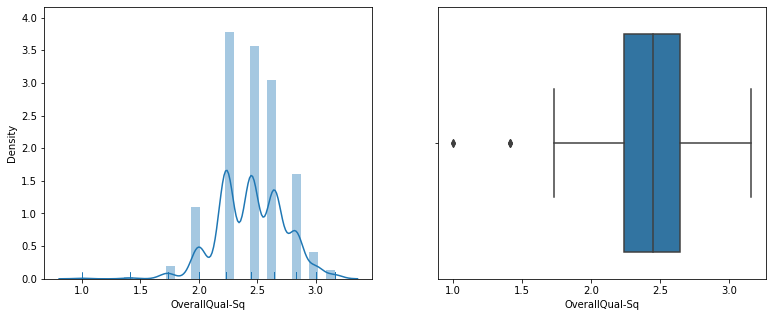

                                                    Variable :  AllSF-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
          count       mean        std       min        25%        50%  \
AllSF-2  1456.0  7117066.0  4361558.0  111556.0  4054183.0  6125625.0   

               75%         max  
AllSF-2  9024016.0  41319184.0  
----------------------------------------------------------------------------------------------------------------


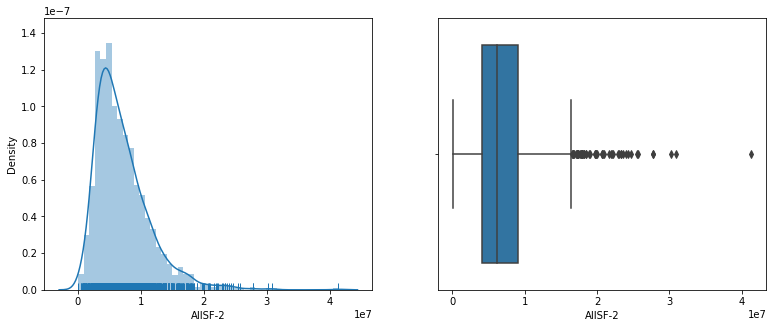

                                                    Variable :  AllSF-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
          count          mean           std         min           25%  \
AllSF-3  1456.0  2.144177e+10  2.124279e+10  37259704.0  8.163100e+09   

                  50%           75%           max  
AllSF-3  1.516092e+10  2.710814e+10  2.655997e+11  
----------------------------------------------------------------------------------------------------------------


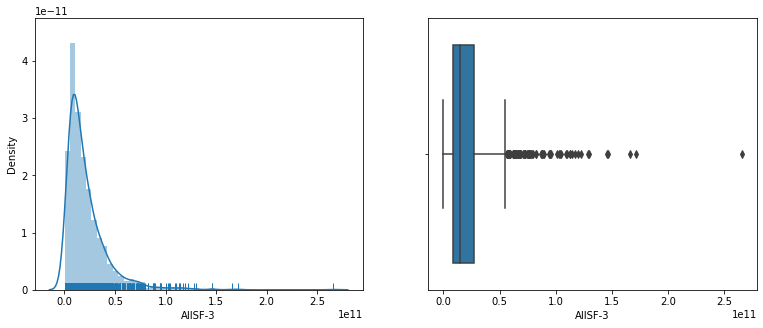

                                                    Variable :  AllSF-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
           count  mean  std   min   25%   50%   75%   max
AllSF-Sq  1456.0  50.0  7.0  18.0  45.0  50.0  55.0  80.0
----------------------------------------------------------------------------------------------------------------


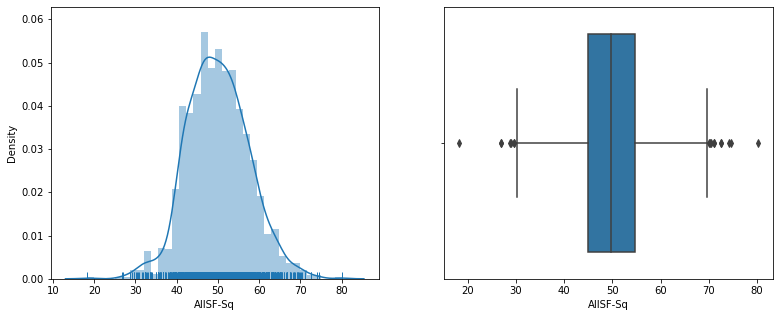

                                                    Variable :  AllFlrsSF-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count       mean        std       min        25%        50%  \
AllFlrsSF-2  1456.0  2493948.0  1700583.0  111556.0  1260568.0  2119936.0   

                   75%         max  
AllFlrsSF-2  3141757.0  13155129.0  
----------------------------------------------------------------------------------------------------------------


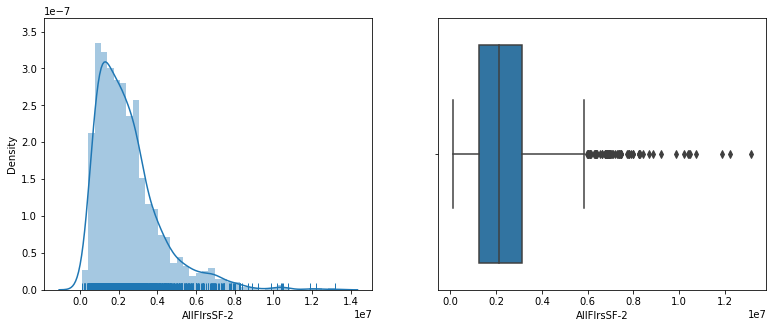

                                                    Variable :  AllFlrsSF-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count          mean           std         min           25%  \
AllFlrsSF-3  1456.0  4.560507e+09  5.012068e+09  37259704.0  1.415303e+09   

                      50%           75%           max  
AllFlrsSF-3  3.086627e+09  5.568767e+09  4.771365e+10  
----------------------------------------------------------------------------------------------------------------


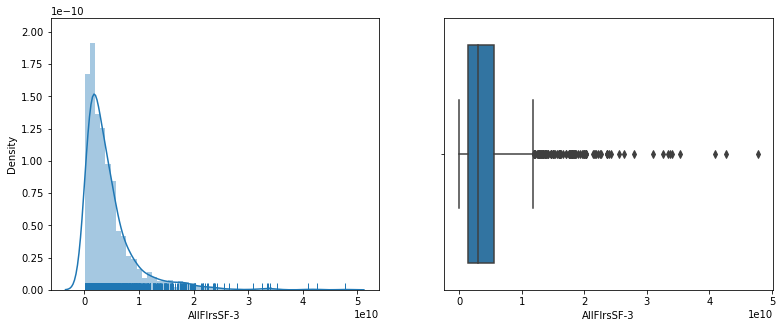

                                                    Variable :  AllFlrsSF-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std   min   25%   50%   75%   max
AllFlrsSF-Sq  1456.0  38.0  6.0  18.0  34.0  38.0  42.0  60.0
----------------------------------------------------------------------------------------------------------------


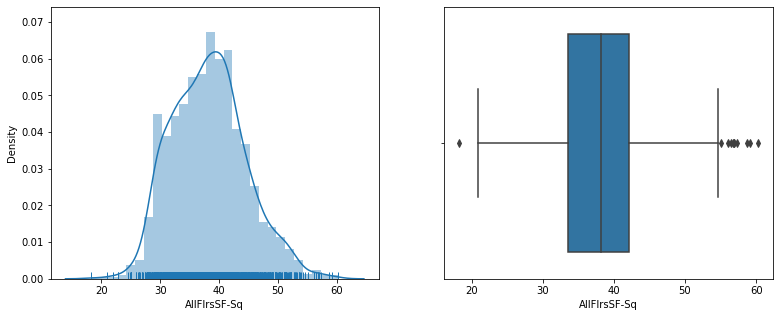

                                                    Variable :  GrLivArea-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count       mean        std       min        25%        50%  \
GrLivArea-2  1456.0  2516204.0  1743102.0  111556.0  1272384.0  2127222.0   

                   75%         max  
GrLivArea-2  3151513.0  13155129.0  
----------------------------------------------------------------------------------------------------------------


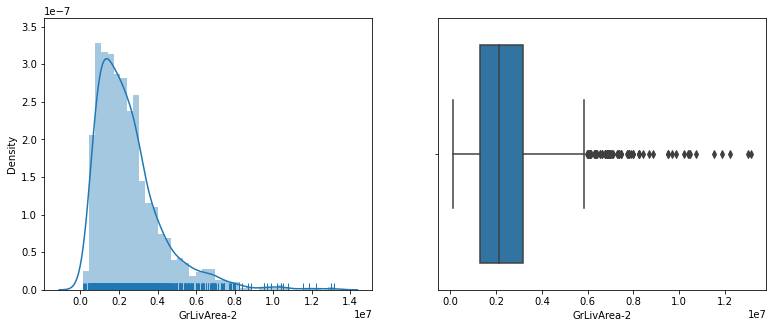

                                                    Variable :  GrLivArea-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count          mean           std         min           25%  \
GrLivArea-3  1456.0  4.636049e+09  5.247511e+09  37259704.0  1.435249e+09   

                      50%           75%           max  
GrLivArea-3  3.102555e+09  5.594724e+09  4.771365e+10  
----------------------------------------------------------------------------------------------------------------


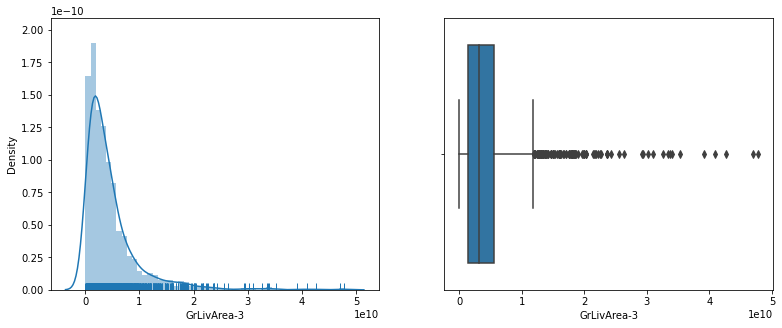

                                                    Variable :  GrLivArea-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std   min   25%   50%   75%   max
GrLivArea-Sq  1456.0  38.0  6.0  18.0  34.0  38.0  42.0  60.0
----------------------------------------------------------------------------------------------------------------


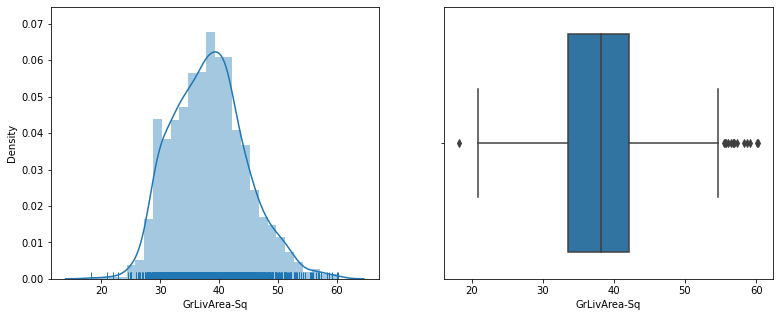

                                                    Variable :  ExterQual-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%   75%   max
ExterQual-2  1456.0  12.0  4.0  4.0  9.0  9.0  16.0  25.0
----------------------------------------------------------------------------------------------------------------


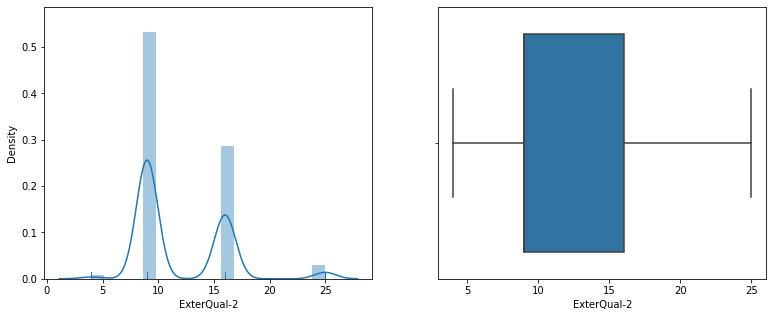

                                                    Variable :  ExterQual-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean   std  min   25%   50%   75%    max
ExterQual-3  1456.0  42.0  23.0  8.0  27.0  27.0  64.0  125.0
----------------------------------------------------------------------------------------------------------------


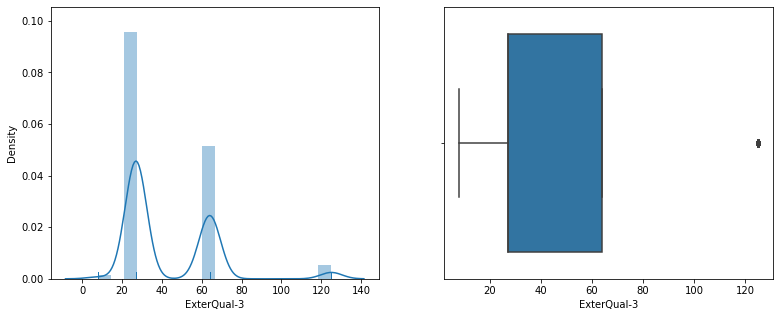

                                                    Variable :  ExterQual-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
ExterQual-Sq  1456.0   2.0  0.0  1.0  2.0  2.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


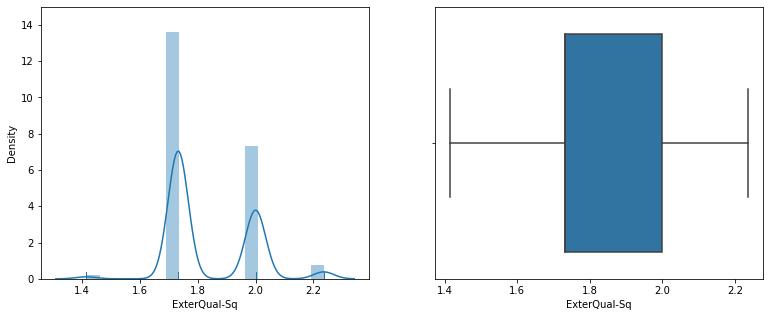

                                                    Variable :  FeatureOverallQual-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                       count  mean  std  min  25%  50%  75%  max
FeatureOverallQual-2  1456.0   6.0  2.0  1.0  4.0  4.0  9.0  9.0
----------------------------------------------------------------------------------------------------------------


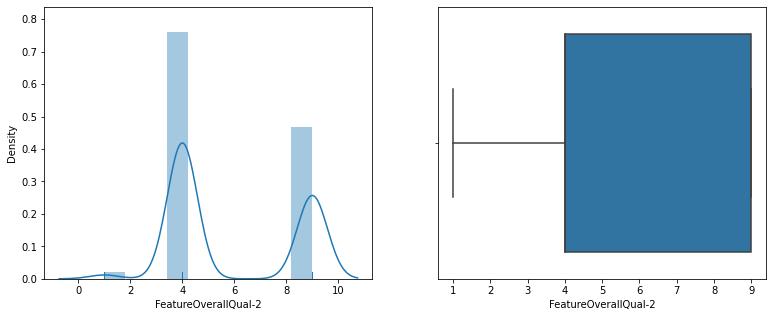

                                                    Variable :  FeatureOverallQual-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                       count  mean  std  min  25%  50%   75%   max
FeatureOverallQual-3  1456.0  15.0  9.0  1.0  8.0  8.0  27.0  27.0
----------------------------------------------------------------------------------------------------------------


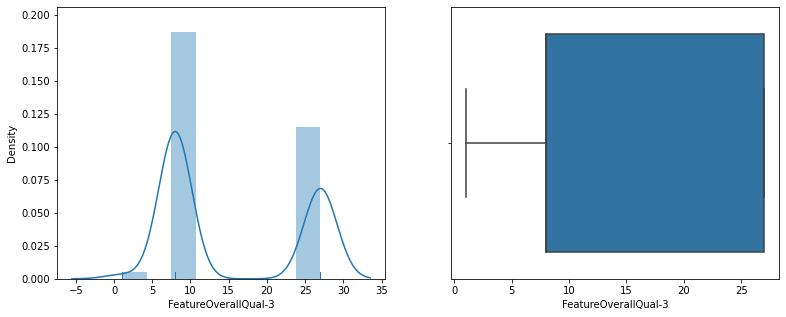

                                                    Variable :  FeatureOverallQual-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                        count  mean  std  min  25%  50%  75%  max
FeatureOverallQual-Sq  1456.0   2.0  0.0  1.0  1.0  1.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


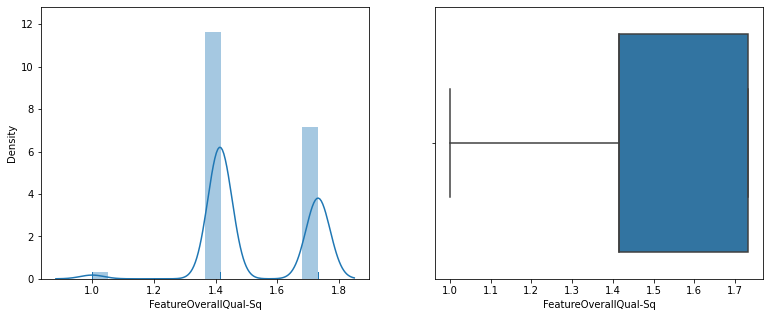

                                                    Variable :  KitchenQual-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count  mean  std  min  25%  50%   75%   max
KitchenQual-2  1456.0  13.0  5.0  4.0  9.0  9.0  16.0  25.0
----------------------------------------------------------------------------------------------------------------


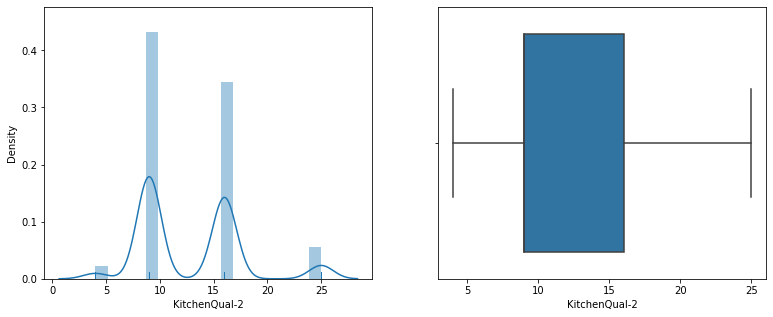

                                                    Variable :  KitchenQual-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count  mean   std  min   25%   50%   75%    max
KitchenQual-3  1456.0  48.0  28.0  8.0  27.0  27.0  64.0  125.0
----------------------------------------------------------------------------------------------------------------


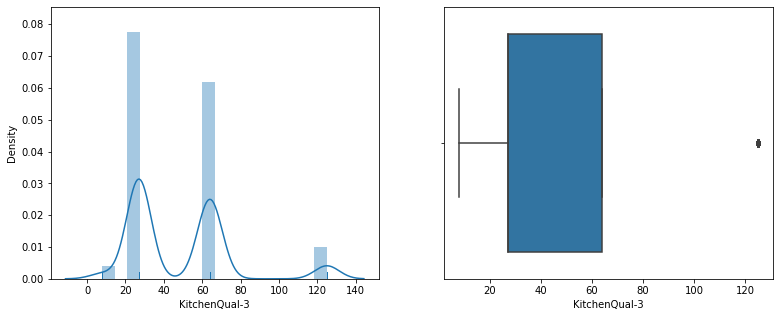

                                                    Variable :  KitchenQual-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count  mean  std  min  25%  50%  75%  max
KitchenQual-Sq  1456.0   2.0  0.0  1.0  2.0  2.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


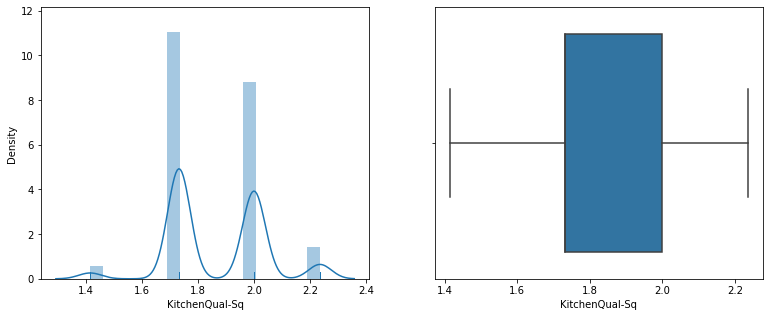

                                                    Variable :  TotalBath-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean  std  min  25%  50%  75%   max
TotalBath-2  1456.0   5.0  4.0  1.0  4.0  4.0  6.0  36.0
----------------------------------------------------------------------------------------------------------------


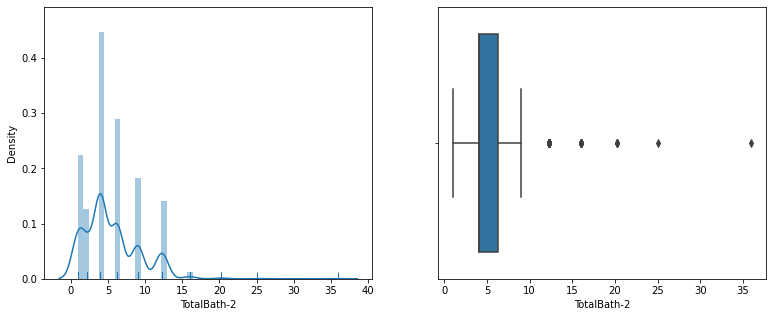

                                                    Variable :  TotalBath-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
              count  mean   std  min  25%  50%   75%    max
TotalBath-3  1456.0  15.0  15.0  1.0  8.0  8.0  16.0  216.0
----------------------------------------------------------------------------------------------------------------


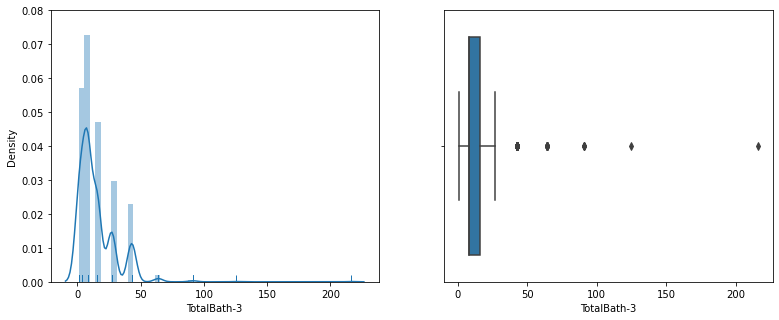

                                                    Variable :  TotalBath-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
               count  mean  std  min  25%  50%  75%  max
TotalBath-Sq  1456.0   1.0  0.0  1.0  1.0  1.0  2.0  2.0
----------------------------------------------------------------------------------------------------------------


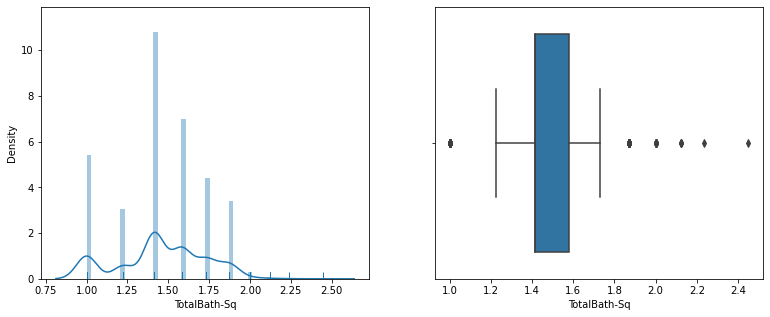

                                                    Variable :  GarageScore-2
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count       mean        std  min       25%        50%  \
GarageScore-2  1456.0  2425465.0  2107336.0  0.0  876096.0  2056356.0   

                     75%         max  
GarageScore-2  2985984.0  21344400.0  
----------------------------------------------------------------------------------------------------------------


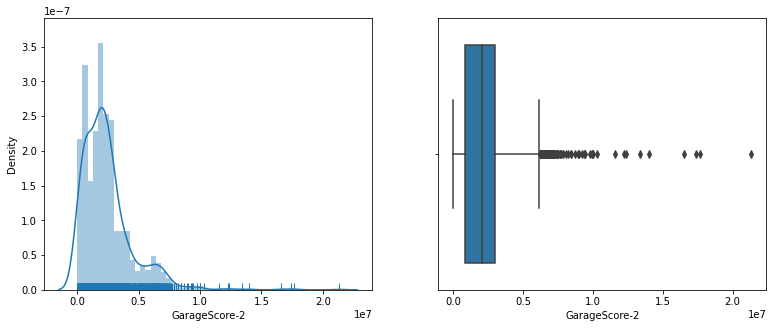

                                                    Variable :  GarageScore-3
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                count          mean           std  min          25%  \
GarageScore-3  1456.0  4.719135e+09  6.840270e+09  0.0  820025856.0   

                        50%           75%           max  
GarageScore-3  2.948815e+09  5.159780e+09  9.861113e+10  
----------------------------------------------------------------------------------------------------------------


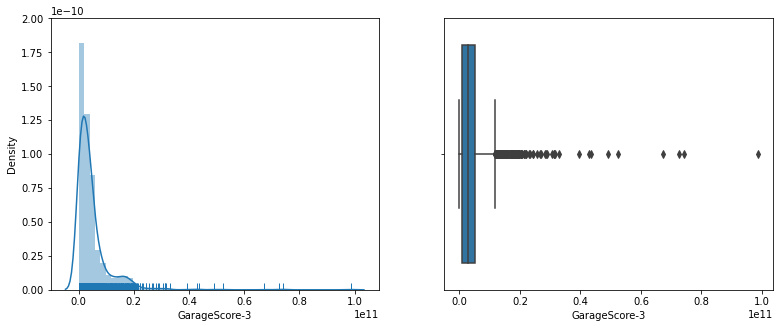

                                                    Variable :  GarageScore-Sq
----------------------------------------------------------------------------------------------------------------
Descriptive statistics : 
----------------------------
                 count  mean   std  min   25%   50%   75%   max
GarageScore-Sq  1456.0  36.0  11.0  0.0  31.0  38.0  42.0  68.0
----------------------------------------------------------------------------------------------------------------


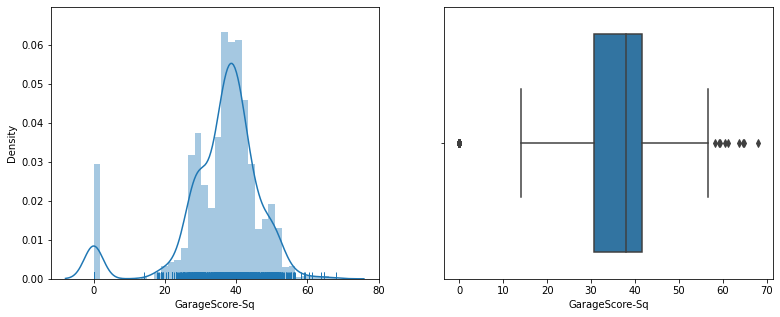

In [28]:
for i in df_numeric.columns:
    print("                                                    Variable : ",i)
    print("----------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    p1 = sns.distplot(df[i], rug=True)
    plt.subplot(1,3,2)
    p2 =sns.boxplot(df[i], orient="V")
    print("Descriptive statistics : ")
    print("----------------------------")
    print(round(pd.DataFrame(df[i].describe()).T))
    print("----------------------------------------------------------------------------------------------------------------")
    plt.show()
    print("================================================================================================================")

#### Observations
- Most of the variables have outliers and skewness in the data

In [29]:
# for i in df_numeric.columns:
#     q3 = df[i].quantile(.75)
#     q1 = df[i].quantile(.25)
#     q10 = df[i].quantile(.1)
#     q90 = df[i].quantile(.9)
#     iqr = q3-q1
#     upper_limit = q3+(1.5*iqr)
#     lower_limit = q1-(1.5*iqr)
#     df[i]  = np.where(df[i]>upper_limit ,q90, np.where(df[i]<lower_limit, q10, df[i]))

### Variable Transformation

Variable :  SalePrice
----------------------------------------------------------------------------------------------------------------


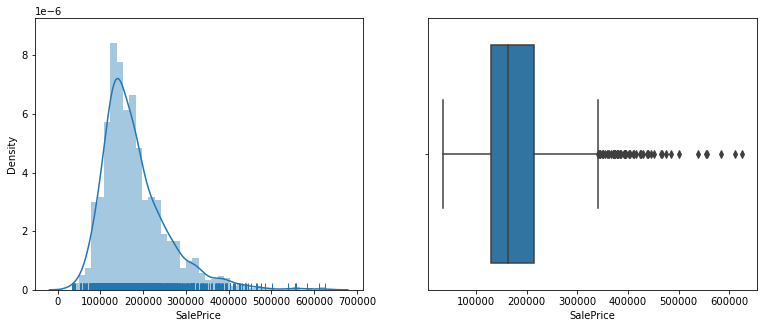

In [30]:
# Dependent Variable - SalePrice
print("Variable : ","SalePrice")
print("----------------------------------------------------------------------------------------------------------------")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
p1 = sns.distplot(df["SalePrice"], rug=True)
plt.subplot(1,3,2)
p2 =sns.boxplot(df["SalePrice"], orient="V")
plt.show()
print("================================================================================================================")

Variable :  Log of SalePrice
----------------------------------------------------------------------------------------------------------------


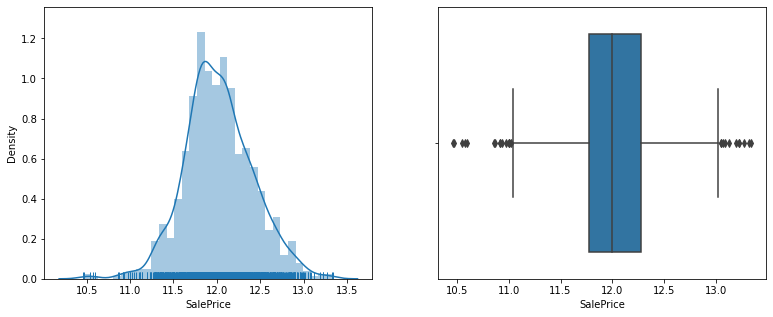

In [31]:
# Dependent Variable - SalePrice
print("Variable : ","Log of SalePrice")
print("----------------------------------------------------------------------------------------------------------------")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
p1 = sns.distplot(np.log1p(df["SalePrice"]), rug=True)
plt.subplot(1,3,2)
p2 =sns.boxplot(np.log1p(df["SalePrice"]), orient="V")
plt.show()
print("================================================================================================================")

- After log transformation the SalePrice comes to normal distribution range

In [32]:
# In general, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_numeric.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical variables to log transform")
skewed_features = skewness.index
df_numeric[skewed_features] = np.log1p(df_numeric[skewed_features])

86 skewed numerical variables to log transform


### Dummy variable Creation

In [33]:
df_categorical = pd.get_dummies(df_categorical, drop_first=True)
print("Shape of the data post dummy variable creation:",df_categorical.shape)

Shape of the data post dummy variable creation: (1456, 174)


### Train-Test Split

In [34]:
df_modified = pd.concat([df_categorical, df_numeric], axis=1)
print("Shape of the final data :",df_modified.shape)

Shape of the final data : (1456, 290)


In [35]:
np.random.seed(111)
df_train, df_test = train_test_split(df_modified, test_size=0.3, random_state=111)
print("Shape of the training dataset:",df_train.shape)
print("Shape of the testing dataset:",df_test.shape)

Shape of the training dataset: (1019, 290)
Shape of the testing dataset: (437, 290)


### Standardizing the data using - StandardScaler()

In [36]:
scaler = StandardScaler()
var_to_scale = list(df_numeric.columns)
# Training Data
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])
y_train = df_train['SalePrice']
X_train = df_train.drop("SalePrice", axis=1)

#Testing Data
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])
y_test = df_test['SalePrice']
X_test = df_test.drop("SalePrice", axis=1)

print("Shape of the training dataset:",df_train.shape)
print("Shape of the testing dataset:",df_test.shape)

Shape of the training dataset: (1019, 290)
Shape of the testing dataset: (437, 290)


### Error Metrics:

In [37]:
def metrics_cv_train(model):
    mae = round(np.mean(-cross_val_score(model, X_train, y_train, scoring = make_scorer(mean_absolute_error, greater_is_better = False), cv = 3)),4)
    mse = round(np.mean(-cross_val_score(model, X_train, y_train, scoring = make_scorer(mean_squared_error, greater_is_better = False), cv = 3)),4)
    rmse= round(np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = make_scorer(mean_squared_error, greater_is_better = False), cv = 3))),4)
    accuracy= str(round(np.mean(cross_val_score(model, X_train, y_train, scoring = make_scorer(r2_score, greater_is_better = True), cv = 3))*100,2))+"%"
    
    return(mae, mse, rmse, accuracy)

def metrics_cv_test(model):
    mae = round(np.mean(-cross_val_score(model, X_test, y_test, scoring = make_scorer(mean_absolute_error, greater_is_better = False), cv = 3)),4)
    mse = round(np.mean(-cross_val_score(model, X_test, y_test, scoring = make_scorer(mean_squared_error, greater_is_better = False), cv = 3)),4)
    rmse= round(np.mean(np.sqrt(-cross_val_score(model, X_test, y_test, scoring = make_scorer(mean_squared_error, greater_is_better = False), cv = 3))),4)
    accuracy= str(round(np.mean(cross_val_score(model, X_test, y_test, scoring = make_scorer(r2_score, greater_is_better = True), cv = 3))*100,2))+"%"
    
    return(mae, mse, rmse, accuracy)

## 1. Linear Regression without Regularization

In [38]:
lr_obj = LinearRegression()
lr_obj.fit(X_train, y_train)

# Look at predictions on training and validation set
train_metrics_linear = metrics_cv_train(lr_obj)
test_metrics_linear = metrics_cv_test(lr_obj)

print(color.BOLD+"Trining Evaluation Metrics"+color.END)
print("MAE :", train_metrics_linear[0], "MSE :", train_metrics_linear[1],  "RMSE :", train_metrics_linear[2], "R2_Score :", train_metrics_linear[3])
print("\n"+color.BOLD+"Testing Evaluation Metrics"+color.END)
print("MAE :", test_metrics_linear[0], "MSE :", test_metrics_linear[1],  "RMSE :", test_metrics_linear[2], "R2_Score :", test_metrics_linear[3])

y_train_pred = lr_obj.predict(X_train)
y_test_pred = lr_obj.predict(X_test)


Trining Evaluation Metrics
MAE : 0.403 MSE : 4.6031 RMSE : 1.8917 R2_Score : -345.77%

Testing Evaluation Metrics
MAE : 7.1633 MSE : 1684.6579 RMSE : 30.7235 R2_Score : -162243.84%


#### Observation - Linear Regression:
- Very large difference between train and test RMSE score
- Model is suffering from overfitting
- Let's try regularization

## 2. Linear Regression with Ridge regularization-L2 penalty

In [39]:
ridge_obj = RidgeCV(alphas = [0.01, 0.05, 0.1, 0.3, 0.6, 1, 2,3,5, 6, 10, 20, 50])
ridge_obj.fit(X_train, y_train)
alpha = ridge_obj.alpha_
print("Best alpha value:", alpha)

print("Trying with different alpha to get the optimum result " + str(alpha))
ridge_obj = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 5)
ridge_obj.fit(X_train, y_train)
alpha = ridge_obj.alpha_
print("Best alpha value:", alpha)

train_metrics_ridge = metrics_cv_train(ridge_obj)
test_metrics_ridge = metrics_cv_test(ridge_obj)

print("\n"+color.BOLD+"Trining Evaluation Metrics"+color.END)
print("MAE :", train_metrics_ridge[0], "MSE :", train_metrics_ridge[1],  "RMSE :", train_metrics_ridge[2], "R2_Score :", train_metrics_ridge[3])
print("\n"+color.BOLD+"Testing Evaluation Metrics"+color.END)
print("MAE :", test_metrics_ridge[0], "MSE :", test_metrics_ridge[1],  "RMSE :", test_metrics_ridge[2], "R2_Score :", test_metrics_ridge[3])


y_train_rdg_predict = ridge_obj.predict(X_train)
y_test_rdg_predict  = ridge_obj.predict(X_test)


Best alpha value: 20.0
Trying with different alpha to get the optimum result 20.0
Best alpha value: 22.0

Trining Evaluation Metrics
MAE : 0.2012 MSE : 0.0832 RMSE : 0.2882 R2_Score : 91.63%

Testing Evaluation Metrics
MAE : 0.2222 MSE : 0.1003 RMSE : 0.3156 R2_Score : 89.9%


### Feature Importance - Ridge regularization

Ridge picked 282 variables and eliminated the other 7 variables


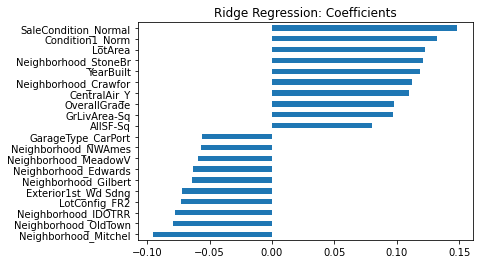

In [40]:
coefs = pd.Series(ridge_obj.coef_, index = X_train.columns)
print(color.BOLD+"Ridge picked " + str(sum(coefs != 0)) + " variables and eliminated the other " +  str(sum(coefs == 0)) + " variables"+color.END)
imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Ridge Regression: Coefficients")
plt.show()

#### Observation - Ridge regularization:
- RMSE between train and test much closer and low
- Ridge regression used most of all the variables, eliminated only 7 variables

## 3. Linear Regression with Lasso regularization-L1 penalty

In [41]:
lasso_obj = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 500, cv = 5)
lasso_obj.fit(X_train, y_train)
alpha = lasso_obj.alpha_
print("Best alpha value:", alpha)

print("Trying with different alpha to get the optimum result " + str(alpha))
lasso_obj = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 3000, cv = 5)
lasso_obj.fit(X_train, y_train)
alpha = lasso_obj.alpha_
print("Best alpha value:", alpha)

train_metrics_lasso = metrics_cv_train(lasso_obj)
test_metrics_lasso = metrics_cv_test(lasso_obj)

print("\n"+color.BOLD+"Trining Evaluation Metrics"+color.END)
print("MAE :", train_metrics_lasso[0], "MSE :", train_metrics_lasso[1],  "RMSE :", train_metrics_lasso[2], "R2_Score :", train_metrics_lasso[3])
print("\n"+color.BOLD+"Testing Evaluation Metrics"+color.END)
print("MAE :", test_metrics_lasso[0], "MSE :", test_metrics_lasso[1],  "RMSE :", test_metrics_lasso[2], "R2_Score :", test_metrics_lasso[3])

y_train_las_predict = lasso_obj.predict(X_train)
y_test_las_predict = lasso_obj.predict(X_test)


Best alpha value: 0.003
Trying with different alpha to get the optimum result 0.003
Best alpha value: 0.0021

Trining Evaluation Metrics
MAE : 0.1992 MSE : 0.0821 RMSE : 0.2861 R2_Score : 91.76%

Testing Evaluation Metrics
MAE : 0.2168 MSE : 0.099 RMSE : 0.3136 R2_Score : 90.03%


### Feature Importance - Lasso Regularization

Lasso picked 96 variables and eliminated the other 193 variables


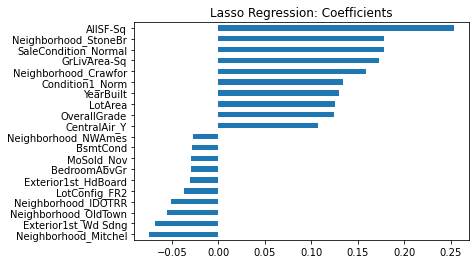

In [42]:
coefs = pd.Series(lasso_obj.coef_, index = X_train.columns)
print(color.BOLD+"Lasso picked " + str(sum(coefs != 0)) + " variables and eliminated the other " +  str(sum(coefs == 0)) + " variables"+color.END)
imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Lasso Regression: Coefficients")
plt.show()

#### Observation - Lasso Regularization:
- RMSE between train and test very close and low
- Ridge regression used only __96__ variables and eliminated __193__
- __Its prefer to use the model with the less features and good accuracy__
- __Let's freeze Lasso for our analysis__

## Error Metrics - Lasso Regression
- #### 1. Actual v/s Predictions

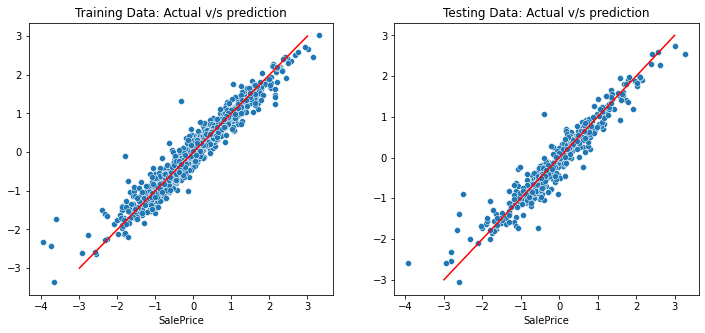

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Training Data: Actual v/s prediction")
sns.scatterplot(y_train, y_train_las_predict)
plt.plot([-3,3], [-3,3], c = "red")
plt.subplot(1,2,2)
plt.title("Testing Data: Actual v/s prediction")
sns.scatterplot(y_test, y_test_las_predict)
plt.plot([-3,3], [-3,3], c = "red")
plt.show()

- #### 2. Residual Plots

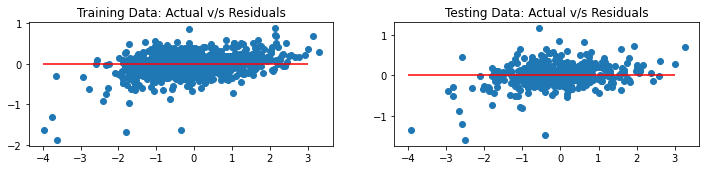

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,3)
residual_train = y_train-y_train_las_predict
plt.title("Training Data: Actual v/s Residuals")
plt.scatter(y_train, residual_train);
plt.hlines(y = 0, xmin = -4, xmax = 3, color = "red")
plt.subplot(2,2,4)
residual_test = y_test-y_test_las_predict
plt.title("Testing Data: Actual v/s Residuals")
plt.scatter(y_test, residual_test);
plt.hlines(y = 0, xmin = -4, xmax = 3, color = "red")
plt.show()

#### Trining Evaluation Metrics
------------------------------------------
__MAE :__ 0.1992 __MSE :__ 0.0821 __RMSE :__ 0.2861 __R2_Score :__ 91.76%

#### Testing Evaluation Metrics
-------------------------------------------
__MAE :__ 0.2168 __MSE :__ 0.099 __RMSE :__ 0.3136 __R2_Score :__ 90.03%

#### Observation - Error Metrics:
- Very good accuracy between train and test data
- Residual plot indicates some sort of outliers in the data, we would have impove the accuracy by further handling these
- Very strong correlation between predicted and actual SalePrice

# Final Take aways:
- Lasso Regression helps in feature elimination, with Lass we are getting pritty good results with less number of features
  compred to Redge Regression 
-  __Variable Significance:__
    - __1. AllSF-Sq:__ Square root of sum of GrLivArea and TotalBsmtSF
            - Total SF including basement be the positive impact on the housing sales price (0.25)
    - __2. YearBuilt:__ Original construction date.
            - Construction date i.e. age of the house matters a lot on house price
    - __3. Neighborhood:__ Physical locations within Ames city limits.
            - Couple of segments in the Neighborhood variables are also having positive impact (Stone Brook and Crawford)
            - NWAmes, IDOTRR, and Old Town location having negative impact on sales price
    - __4. Condition1:__ Proximity to various conditions
            - Normal proximity have higher house price        
    - __5. LotArea:__ Lot size in square feet
            - Larger teh lot area higher the house price 
            
    - __6. Negative impacting features :__ Basement condition, Bedrooms, Lot configuration with frontage with 2 side etc
        
##### Similarly we have lot more variables, which can be seen from Feature Importance chart

## Top 10 positive and negative impacting features to sales price of the house

In [45]:
pd.DataFrame(imp_coefs.sort_values(ascending=False)).rename(columns={0:"Co-eff"})

Co-eff
AllSF-Sq              0.253433
Neighborhood_StoneBr  0.178569
SaleCondition_Normal  0.177843
GrLivArea-Sq          0.172981
Neighborhood_Crawfor  0.158930
Condition1_Norm       0.133726
YearBuilt             0.129914
LotArea               0.125921
OverallGrade          0.124183
CentralAir_Y          0.106922
Neighborhood_NWAmes  -0.026652
BsmtCond             -0.028048
MoSold_Nov           -0.028885
BedroomAbvGr         -0.029075
Exterior1st_HdBoard  -0.030251
LotConfig_FR2        -0.037293
Neighborhood_IDOTRR  -0.050701
Neighborhood_OldTown -0.054839
Exterior1st_Wd Sdng  -0.067827
Neighborhood_Mitchel -0.074080